In [ ]:
#Importer les modules:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
import colorama
from colorama import Fore
from colorama import Style
import os, sys
import matplotlib
from matplotlib import cm
from matplotlib.patches import Circle, Wedge, Rectangle

import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
print(pd.__version__)

1.3.4


In [ ]:
#A. IMPORTER LES DONNÉES (qui résultent suite au nettoyage des données).

In [3]:
cd Desktop\Data Science candidature\Projets\Projet 3\Data\

C:\Users\'titite\Desktop\Data Science candidature\Projets\Projet 3\Data


In [4]:
ls

 Le volume dans le lecteur C s'appelle OS
 Le num‚ro de s‚rie du volume est 609B-8774

 R‚pertoire de C:\Users\'titite\Desktop\Data Science candidature\Projets\Projet 3\Data

07/03/2022  10:19    <DIR>          .
07/03/2022  10:19    <DIR>          ..
10/03/2022  11:32        30ÿ828ÿ847 Data_clean.csv
15/02/2022  12:03     5ÿ389ÿ887ÿ170 en.openfoodfacts.org.products.csv
21/04/2017  10:54       847ÿ427ÿ235 fr.openfoodfacts.org.products.csv
               3 fichier(s)    6ÿ268ÿ143ÿ252 octets
               2 R‚p(s)  249ÿ699ÿ504ÿ128 octets libres


In [5]:
df=pd.read_csv('Data_clean.csv', sep=',', low_memory=False)

In [ ]:
##Vérification:
##Display des 5 premières lignes.

In [ ]:
#df.head(5)

In [ ]:
##Vérification d'absense de 'NaN'.

In [6]:
df.isna().sum()

code                         0
product_name              2366
countries_en                 0
main_category_en             0
Final-carbon-footprint       0
nutriscore_grade_Total       0
additives_Total              0
dtype: int64

In [ ]:
#Il y a des 'NaN' uniquement dans les "product_name" ce qui n'est pas important.

In [ ]:
##Fin Vérification.

In [7]:
pd.set_option('display.max_rows', None)
df.dtypes

code                       object
product_name               object
countries_en               object
main_category_en           object
Final-carbon-footprint    float64
nutriscore_grade_Total     object
additives_Total           float64
dtype: object

In [ ]:
#--------------------------------------------------------------------------------------------------------------------------

In [ ]:
#Le 'code' n'est utilisé que pour identifier le produit dans la base de données.
#Le 'product_name' n'est pas vraiment important c'est juste pour la présentation finale.
#'countries_en' reste toujours le même : 'France'.
#La 'main-category_en' pourrait être une variable intéressante, mais pas dans le domaine de notre projet: on veut  
#évaluer un produit par rapport à son impact écologique et son apport nutritionnel et proposer au consommateur une 
#meilleure option en ce sens lorsque le produit n'est pas le mieux classé de sa catégorie. Ainsi, 'main_catégory_en' 
#sera uniquement utilisée pour le classement final du produits parmi ses semblables.

#Pour faire notre 'score' on a donc 3 variables: 
    # Une qualitative:  'nutriscore_grade_Total';
    # Deux quantitatives: 'Final-carbon-footprint' et 'additives_Total'.
    

In [ ]:
#B. ANALYSE UNIVARIÉE (Forme de la distribution et identification des potentielles valeurs "aberrantes" (OUTLIERS).

#On doit vérifier si les varibles quantitatives ('Final-carbon-footprint' et 'additives_Total') ont des valeurs 
#aberrantes ('outliers') et si c'est le cas les supprimer afin de ne pas biaiser les résultats. En fait, les coefficient
#de corrélation de Pearson et de Kendall, les boîtes à moustache (analye univariée) et le K-means (analyse multivariée) 
#sont sensibles aux outliers.

In [ ]:
#B.1 Identification d'outliers et vérification de std non nulle pour les variables quantitatives:

#Note: Les outliers ne sont pas traités dans la partie de nettoyage, car les 'NaN' furent remplis par des règles 
#établies par une expertise métier, et donc enlever les outliers dès le début pouvait biaiser l'application de ces
#règles. Il est donc préférable de les traiter dans la partie "exploration" car leur impact et importance dépendra selon
#les cas suite au remplissage des 'NaN' par les différentes règle établies.

In [ ]:
#B.1.1 'Final-carbon-footprint':

In [8]:
df['Final-carbon-footprint'].describe()

count    408073.000000
mean         27.606874
std        1045.966761
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      656299.000000
Name: Final-carbon-footprint, dtype: float64

In [ ]:
#La std est non nulle.

#Le maximum du 'Final-carbon-footprint' paraît aberrant, mais suite à effectuer des vérification comme il s'agit de 
#saucisses (cf. en bas) il ne l'ai pas forcément. On verra en traçant la courbe si il convient de le garder ou pas pour 
#l'analyse univariée.

In [9]:
df_1=df.loc[df['Final-carbon-footprint']==656299]
df_1

code      product_name countries_en main_category_en  \
165308  3273230262952  Saucisses fumées       France  Smoked sausages   

        Final-carbon-footprint nutriscore_grade_Total  additives_Total  
165308                656299.0                      e              0.0

In [ ]:
#Courbe descriptive pour identification des outliers:

[]

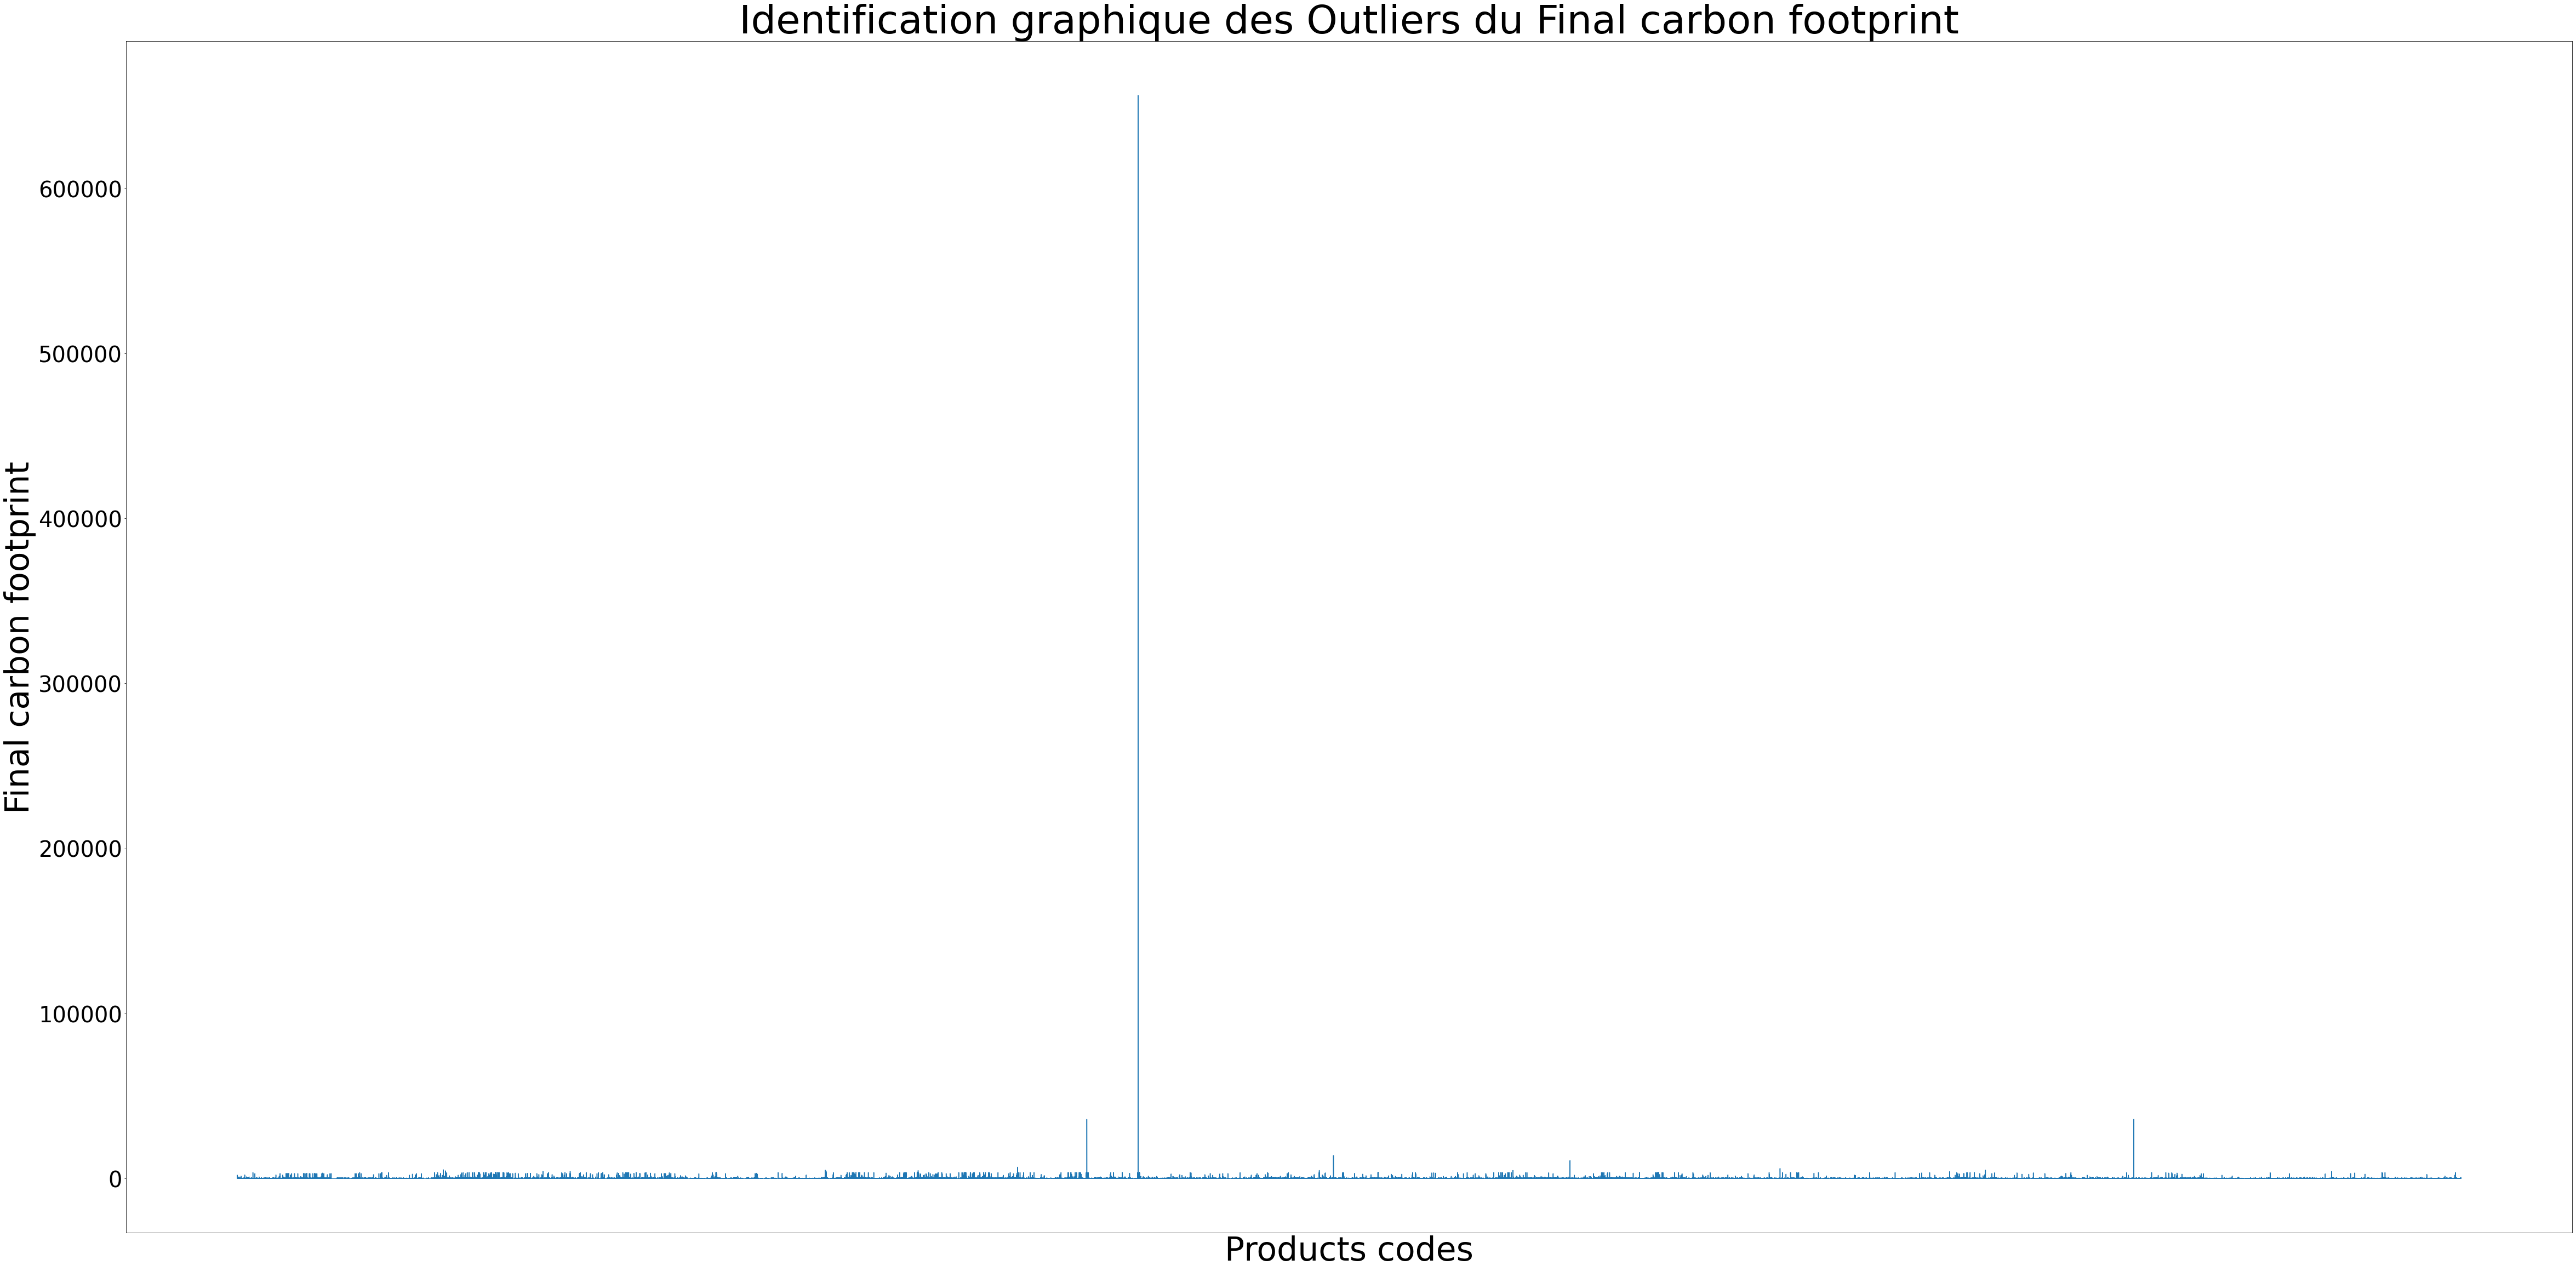

In [10]:
plt.rcParams.update({'font.size': 60})
df.plot(x='code', y='Final-carbon-footprint', kind='line', figsize=(80,40), fontsize=40, title='Identification graphique des Outliers du Final carbon footprint', ylabel='Final carbon footprint', xlabel='Products codes', legend=False)
ax = plt.gca()
ax.axes.xaxis.set_ticks([])

In [ ]:
#À première vue il semble bien que la valeur maximale du 'Final-carbon-footprint' est une valeur aberrante. 
#Il faudra la supprimer lors du calcul du coefficient de corrélation.

In [ ]:
#B.1.2 'addtives_Total':

In [11]:
df['additives_Total'].describe()

count    408073.000000
mean          1.338356
std           2.066170
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: additives_Total, dtype: float64

In [ ]:
#La std est non nulle.

In [ ]:
#Courbe descriptive pour identification des outliers:

[]

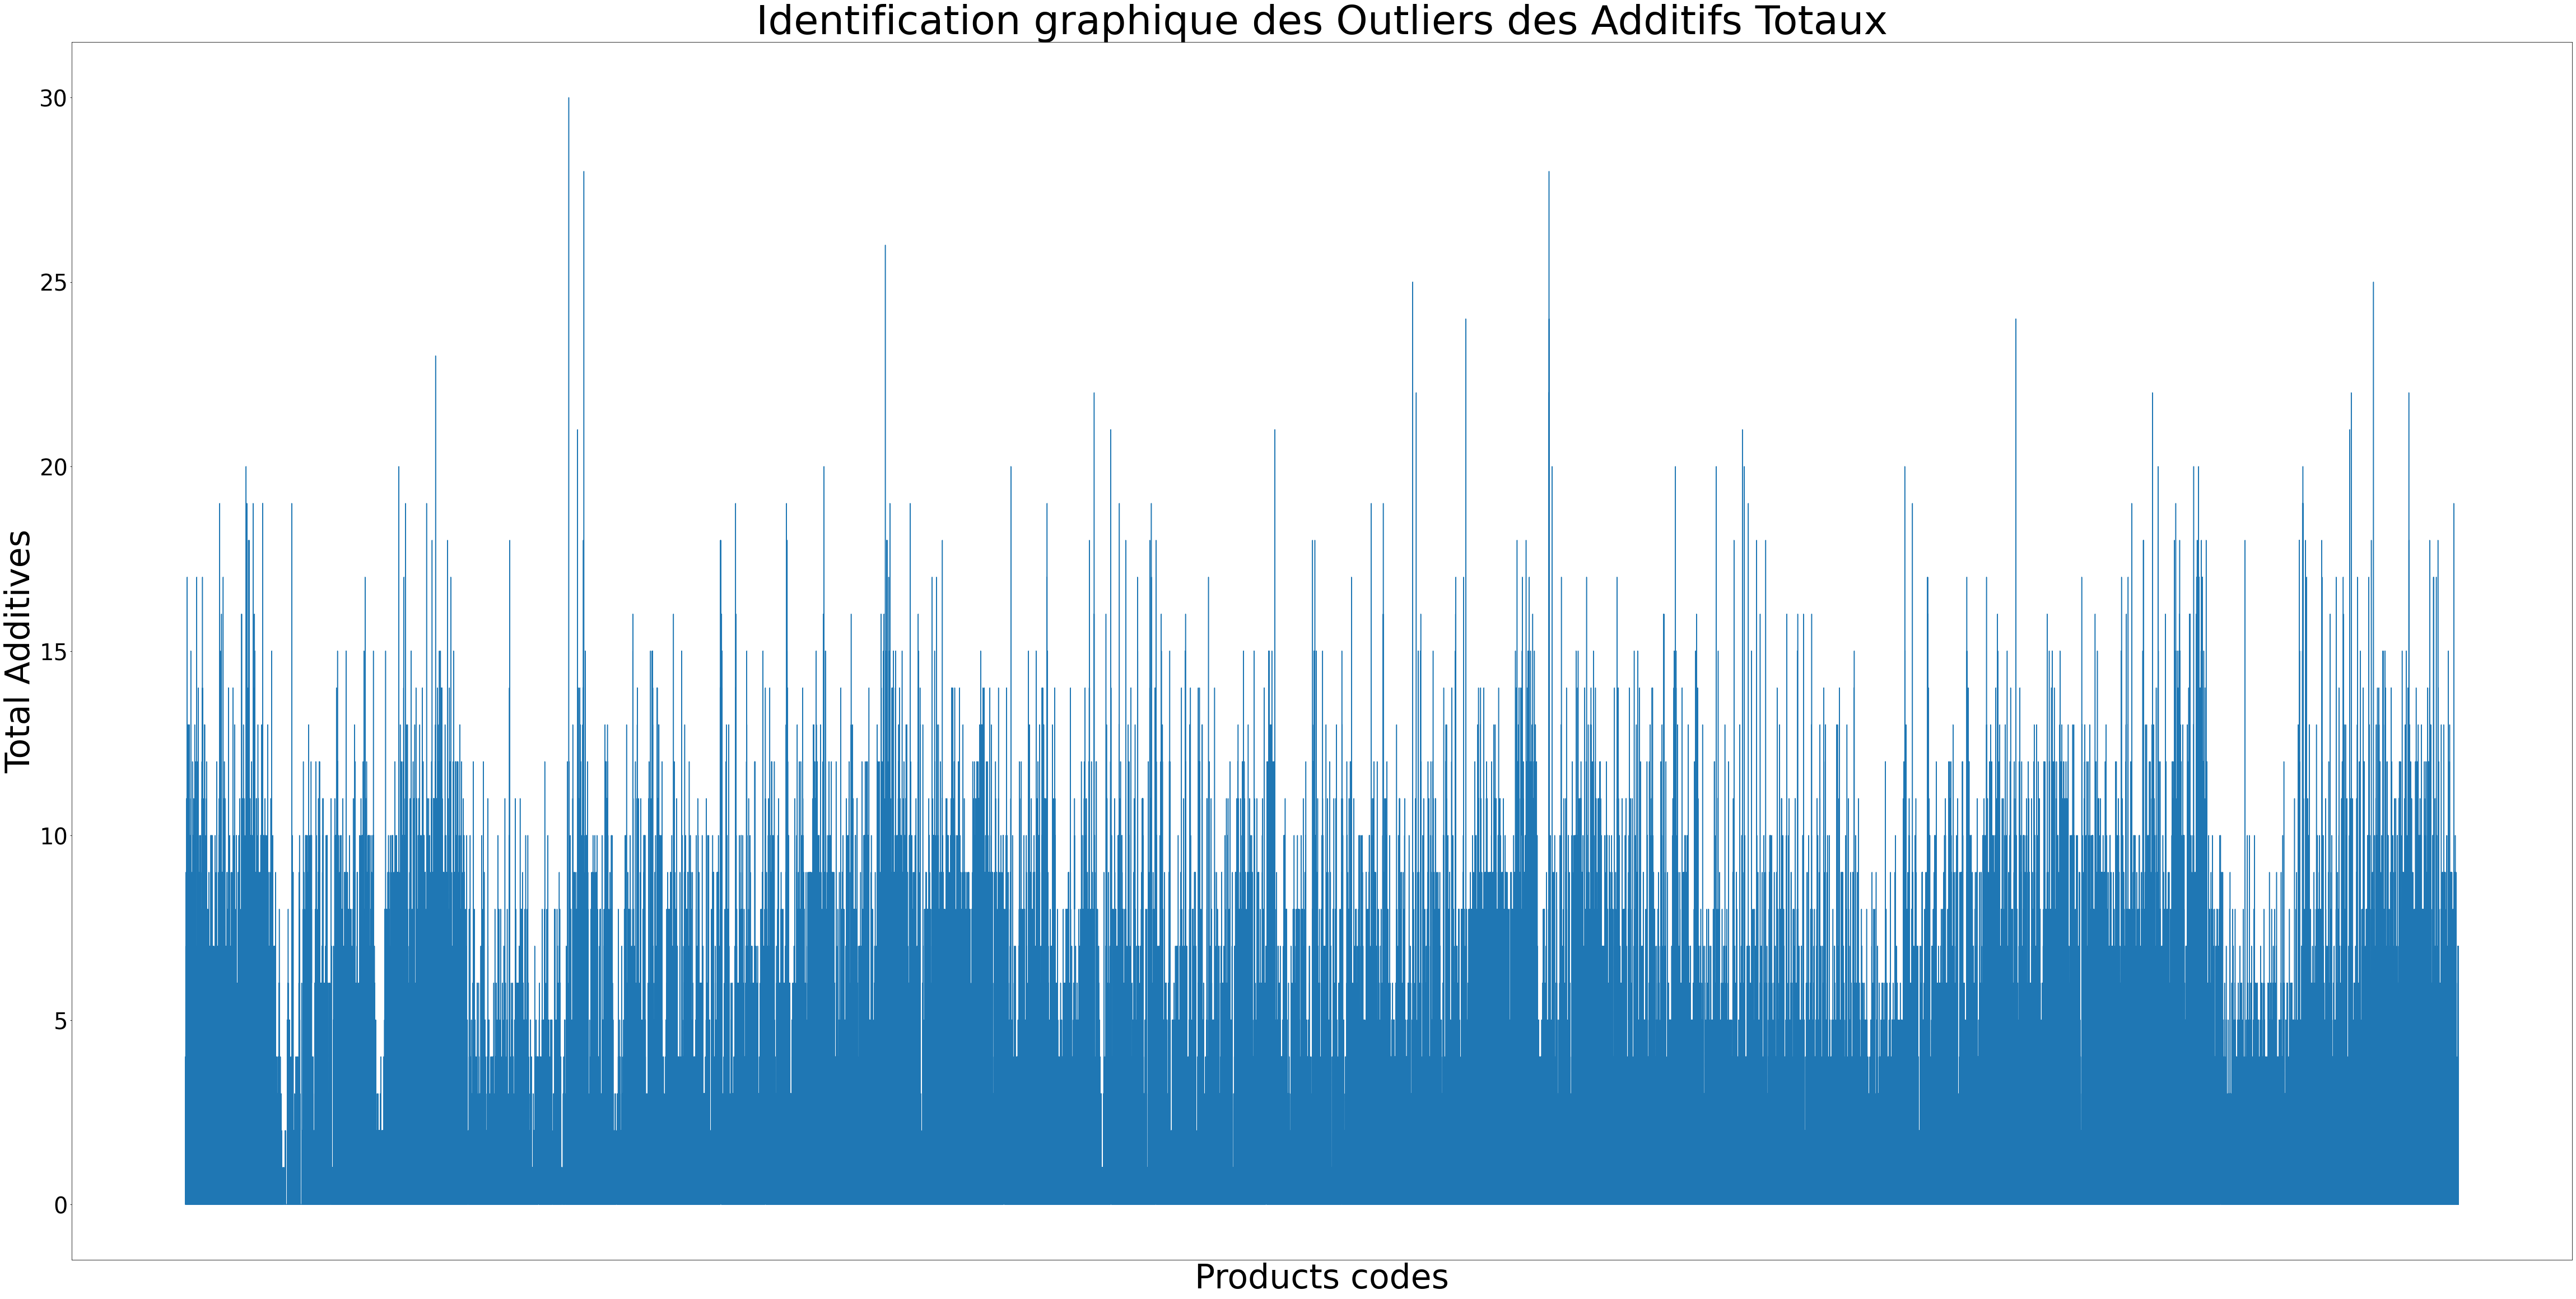

In [12]:
plt.rcParams.update({'font.size': 60})
df.plot(x='code', y='additives_Total', kind='line', figsize=(80,40), fontsize=40, title='Identification graphique des Outliers des Additifs Totaux', ylabel='Total Additives', xlabel='Products codes', legend=False)
ax = plt.gca()
ax.axes.xaxis.set_ticks([])

In [ ]:
#A simple vue les valeurs aberrantes pour 'additives_Total', ne sont pas évidentes mais il faudra vérifier avec l'étude 
#des 1er et 99ème quantiles.

In [ ]:
#-------

In [ ]:
#B.2 Élimination des outliers:

In [ ]:
#B.2.1 Calcul des 1er et 99ème percentiles pour identification des valeur extrêmes:

#On éliminera les outliers qui sont au delà de ces percentiles.

In [14]:
df1=df.loc[:,['Final-carbon-footprint','additives_Total']]

In [15]:
quant_df1=df1.quantile([0.1, 0.99])
quant_df1

Final-carbon-footprint  additives_Total
0.10                     0.0              0.0
0.99                   559.0              9.0

In [ ]:
#B.2.2 Élimination des valeurs aberrantes:

In [16]:
df1_1=df1.apply(lambda x: x[(x>quant_df1.loc[0.1,x.name]) & (x < quant_df1.loc[0.99,x.name])], axis=0)

In [17]:
df1_1.describe()

Final-carbon-footprint  additives_Total
count            48273.000000    193921.000000
mean               104.685207         2.494841
std                112.993086         1.695061
min                  1.000000         1.000000
25%                 45.000000         1.000000
50%                 45.000000         2.000000
75%                 92.000000         3.000000
max                558.000000         8.000000

In [ ]:
#Notez que la std après avoir enlever les outliers reste non nulle et donc le coefficient de corrélation de Pearson
#peut être calculé.

#-------

In [ ]:
#B.3 Analyse des variables quantitatives:

#B.3.1 Distribution de la variable 'Final-carbon-footprint':

In [18]:
df1_n=df1_1
df1_n["nb"] = 1
df1_num = df1_n[["Final-carbon-footprint","nb"]].groupby("Final-carbon-footprint", as_index=False).sum().sort_values("Final-carbon-footprint",ascending=True)

df1_num.describe()

Final-carbon-footprint            nb
count              544.000000    544.000000
mean               274.827206     88.737132
std                160.284047   1122.258857
min                  1.000000      1.000000
25%                136.750000      4.000000
50%                272.500000     12.000000
75%                411.250000     28.000000
max                558.000000  25490.000000

In [19]:
df1_num.head(5)

Final-carbon-footprint  nb
0                     1.0  52
1                     2.0  13
2                     3.0  34
3                     4.0   7
4                     5.0  14

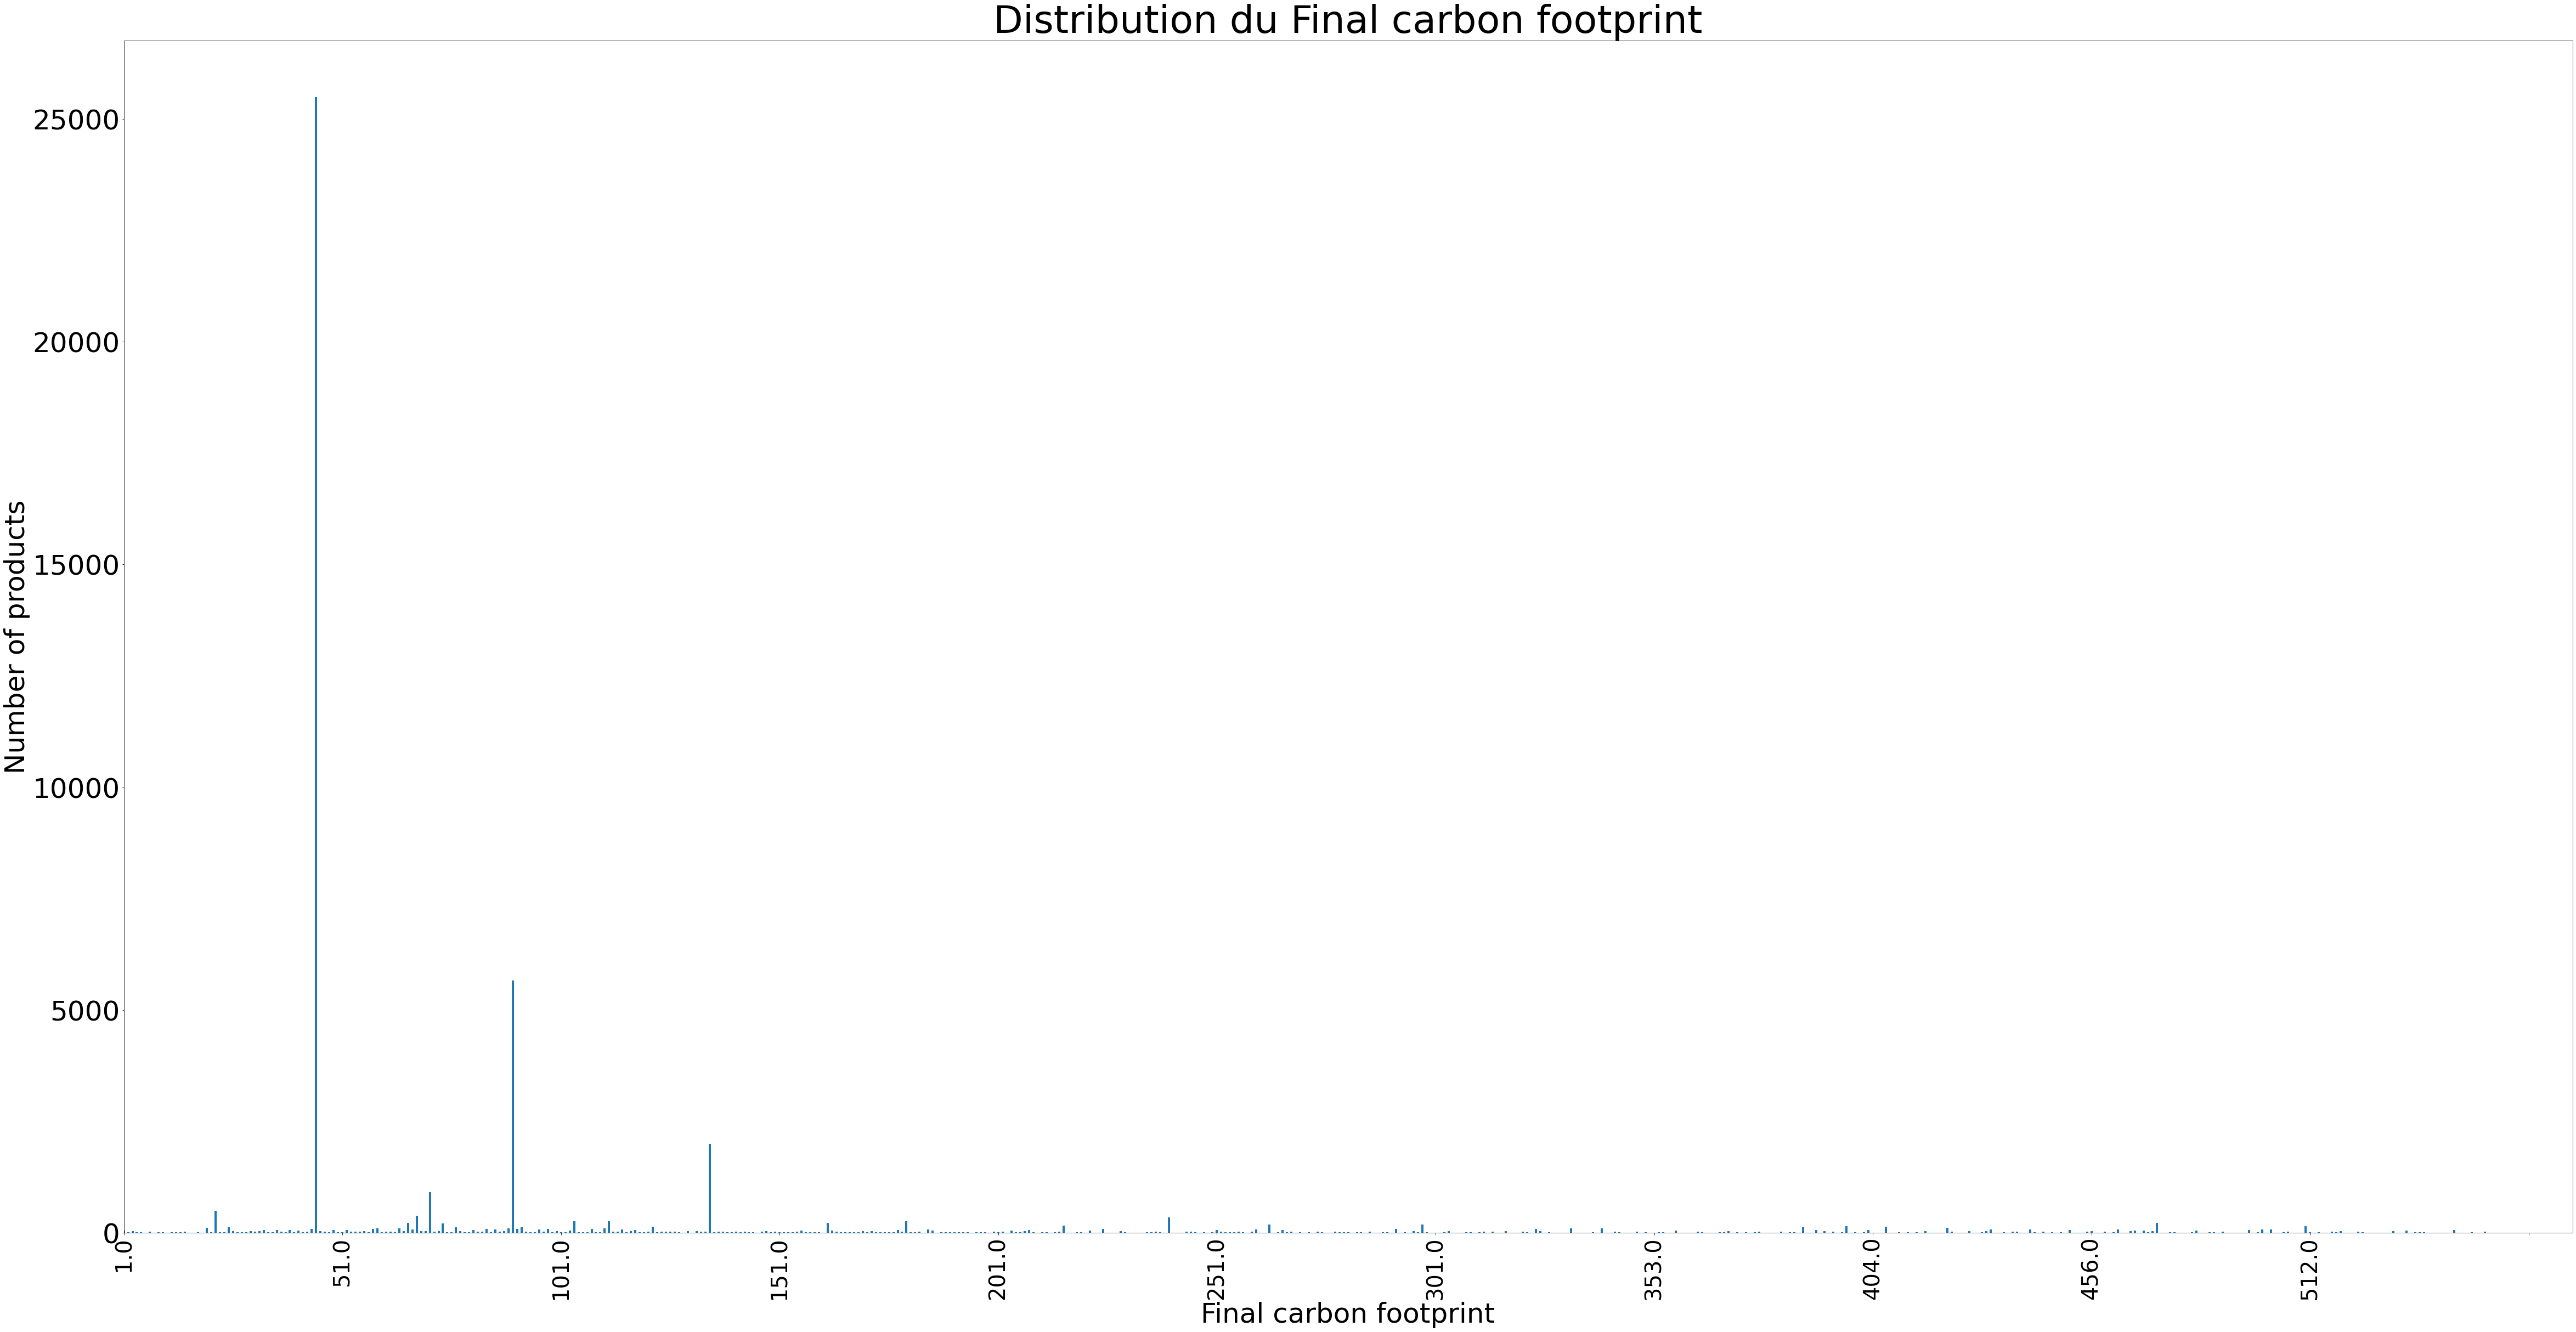

In [20]:
values=[0,50,100,150,200,250,300,350,400,450,500,550,600]

plt.rcParams.update({'font.size': 60})
df1_num.plot( x='Final-carbon-footprint', y='nb', kind = 'bar', figsize=(80,40), fontsize=40, legend=False)
plt.title('Distribution du Final carbon footprint',size=70)
plt.ylabel('Number of products', size=50)
plt.xlabel('Final carbon footprint',size=50)
plt.yticks(size=50)
plt.xticks(size=40)
plt.xticks(ticks=values)
plt.xlim(0, 560)
plt.show()

In [ ]:
#On voit que la distribution (ie. distribution des 'fréquences') de la variables 'Final-carbon-footprint' ne suit
#pas une distribution de loi normale, mais plutôt une distribution assez désordonnée. 

In [ ]:
#B.3.2 Distribution de la variable 'additives_Total':

In [21]:
df1_n2=df1_1
df1_n2["nb"] = 1
df1_num2 = df1_n2[["additives_Total","nb"]].groupby("additives_Total", as_index=False).sum().sort_values("additives_Total",ascending=True)

df1_num2.describe()

additives_Total            nb
count          8.00000      8.000000
mean           4.50000  24240.125000
std            2.44949  24631.514178
min            1.00000   2924.000000
25%            2.75000   6939.500000
50%            4.50000  15024.500000
75%            6.25000  33860.000000
max            8.00000  73028.000000

In [22]:
df1_num2.head(5)

additives_Total     nb
0              1.0  73028
1              2.0  46472
2              3.0  29656
3              4.0  19336
4              5.0  10713

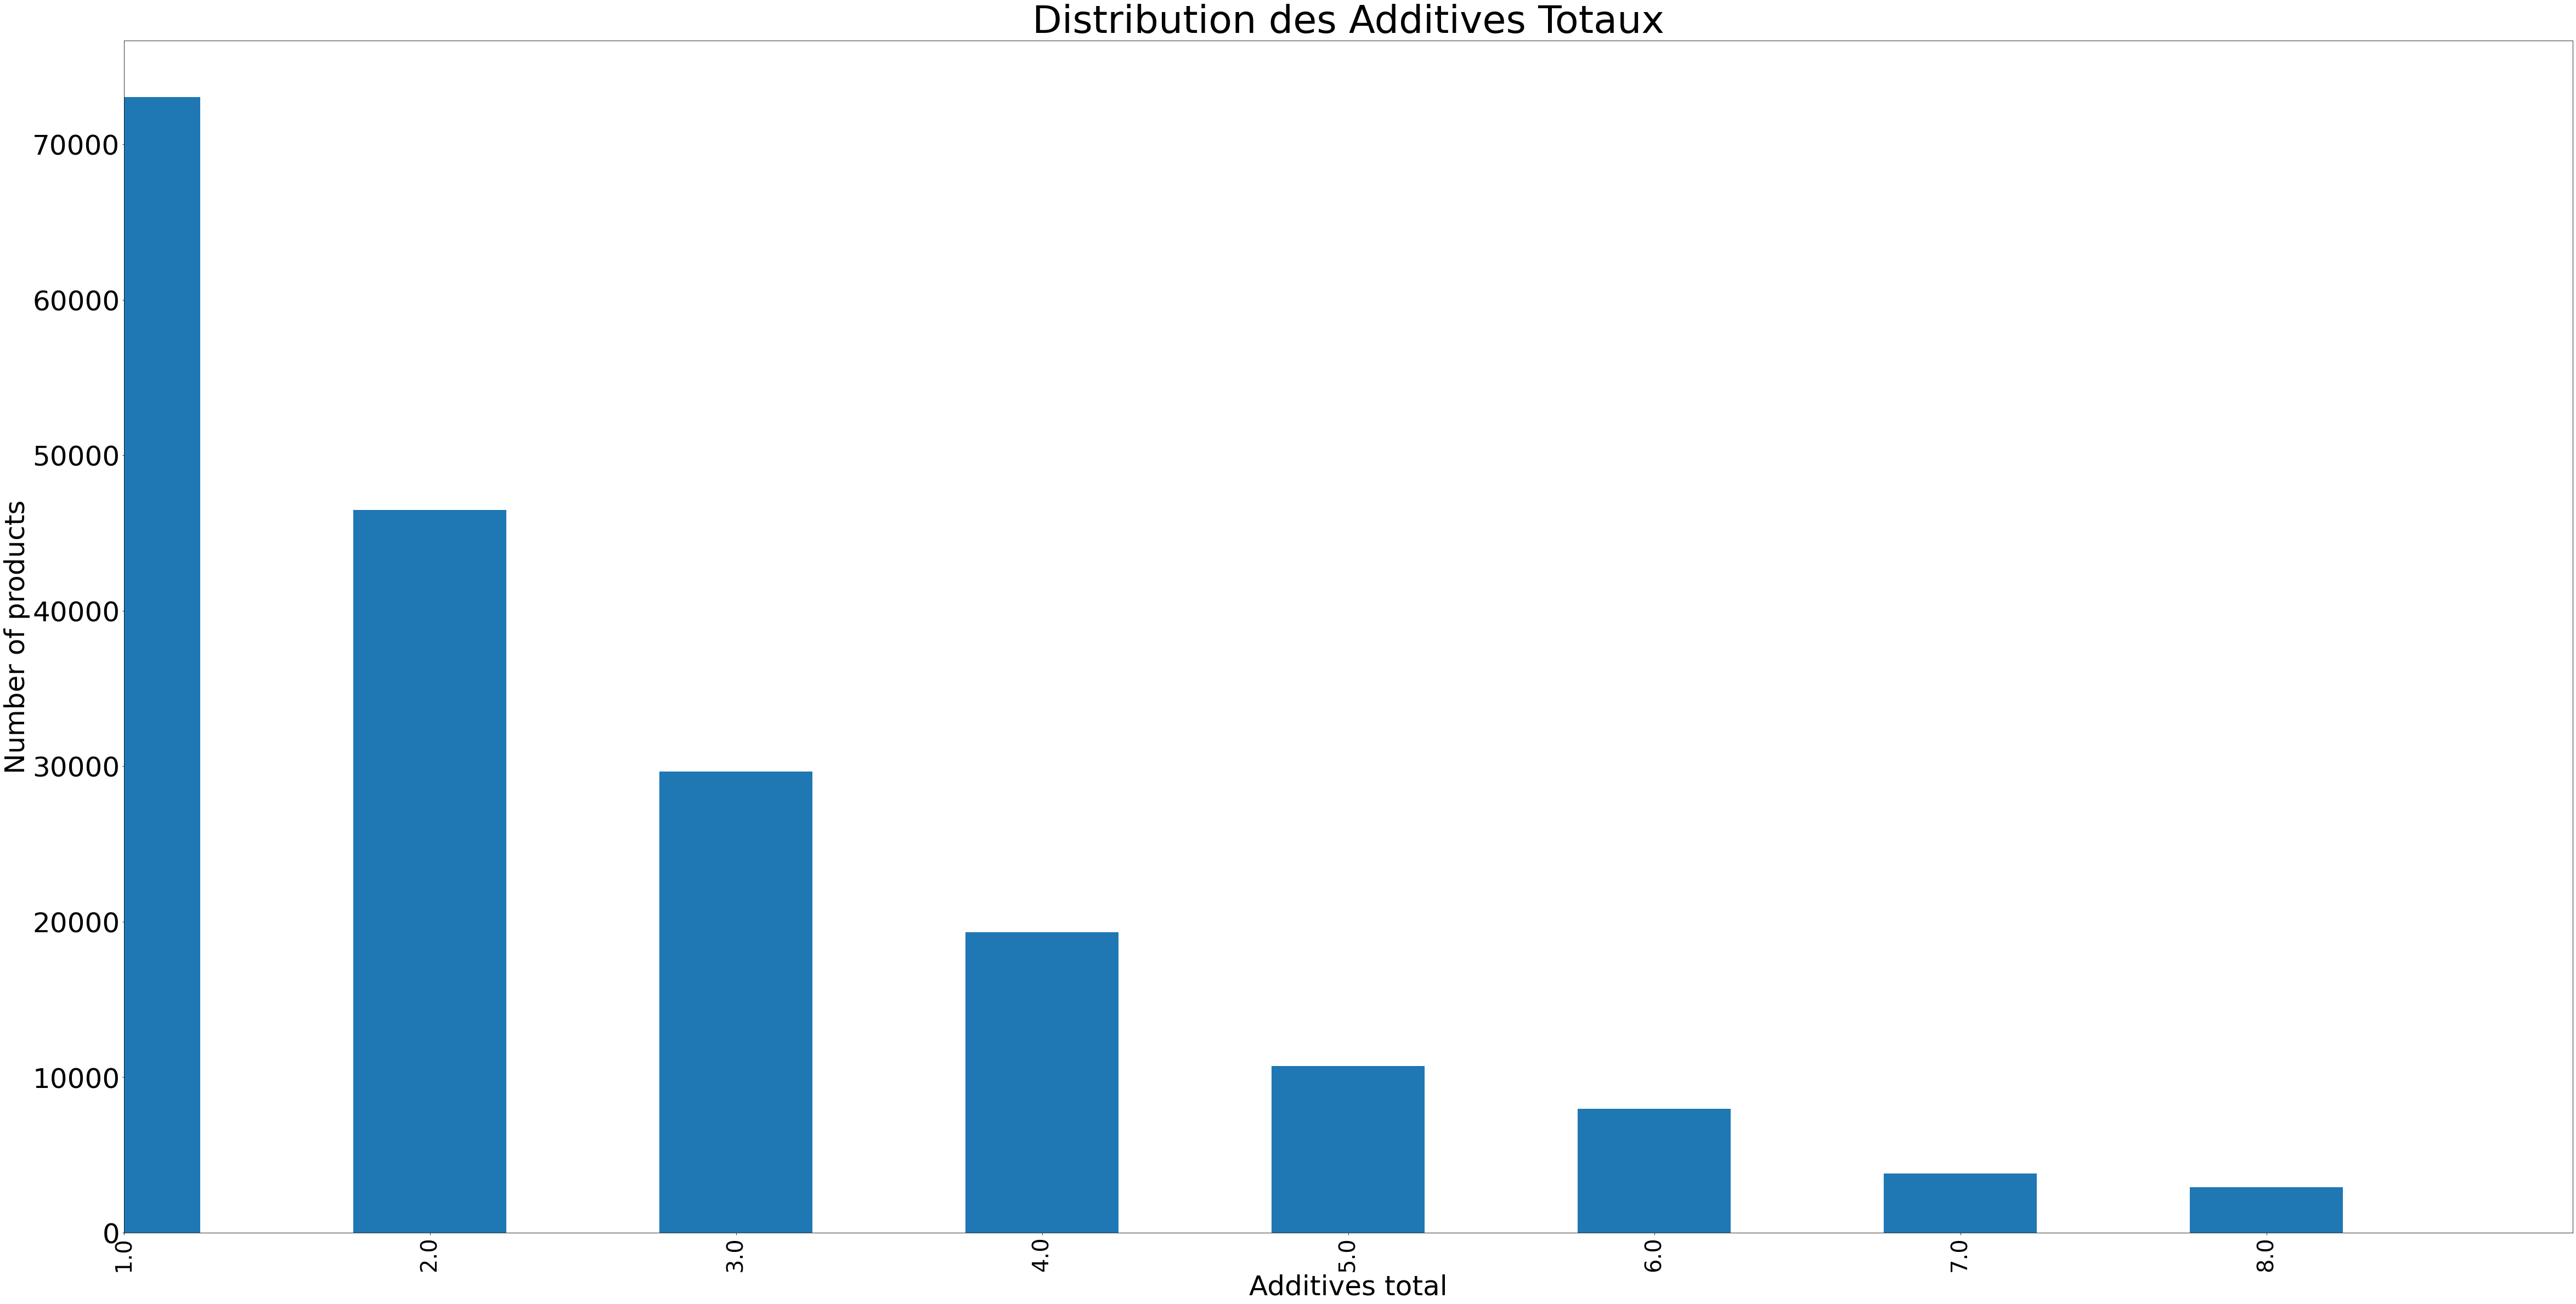

In [23]:
plt.rcParams.update({'font.size': 60})
df1_num2.plot( x='additives_Total', y='nb', kind = 'bar', figsize=(80,40), fontsize=40, legend=False)
plt.title('Distribution des Additives Totaux',size=70)
plt.ylabel('Number of products', size=50)
plt.xlabel('Additives total',size=50)
plt.yticks(size=50)
plt.xticks(size=40)
plt.xlim(0, 8)
plt.show()

In [ ]:
#On voit que la distribution (ie. distribution des 'fréquences') de la variables 'additives_Total' ne suit pas une 
#distribution de loi normale (cf. additives_Total=[6,7,8]).

In [ ]:
#Note: Comme aucune des deux variables quantitatives ne présente une distribution normale, même si leur std est non
#nulle dans les deux cas, on préférera calcules le coefficient de corrélation de Kendall (plus adapté aux variables à distribution non normale)
#au lieu de celui de Pearson (lui plus adapté dans le cas de distributions normales).


#-------

In [ ]:
#B.4  Analyse de la variable qualitatitve 'nutriscore_grade_Total':

#Note: pour analyser la variable qualitative de façon individuelle on tient compte des outliers, pour bien voir son 
#comportement indépendant de variables quantitatives.

In [24]:
a=df['nutriscore_grade_Total'].isin(['a']).sum()

In [25]:
b=df['nutriscore_grade_Total'].isin(['b']).sum()

In [26]:
c=df['nutriscore_grade_Total'].isin(['c']).sum()

In [27]:
d=df['nutriscore_grade_Total'].isin(['d']).sum()

In [28]:
e=df['nutriscore_grade_Total'].isin(['e']).sum()

In [ ]:
#B.4.1 Diagramme en barres:

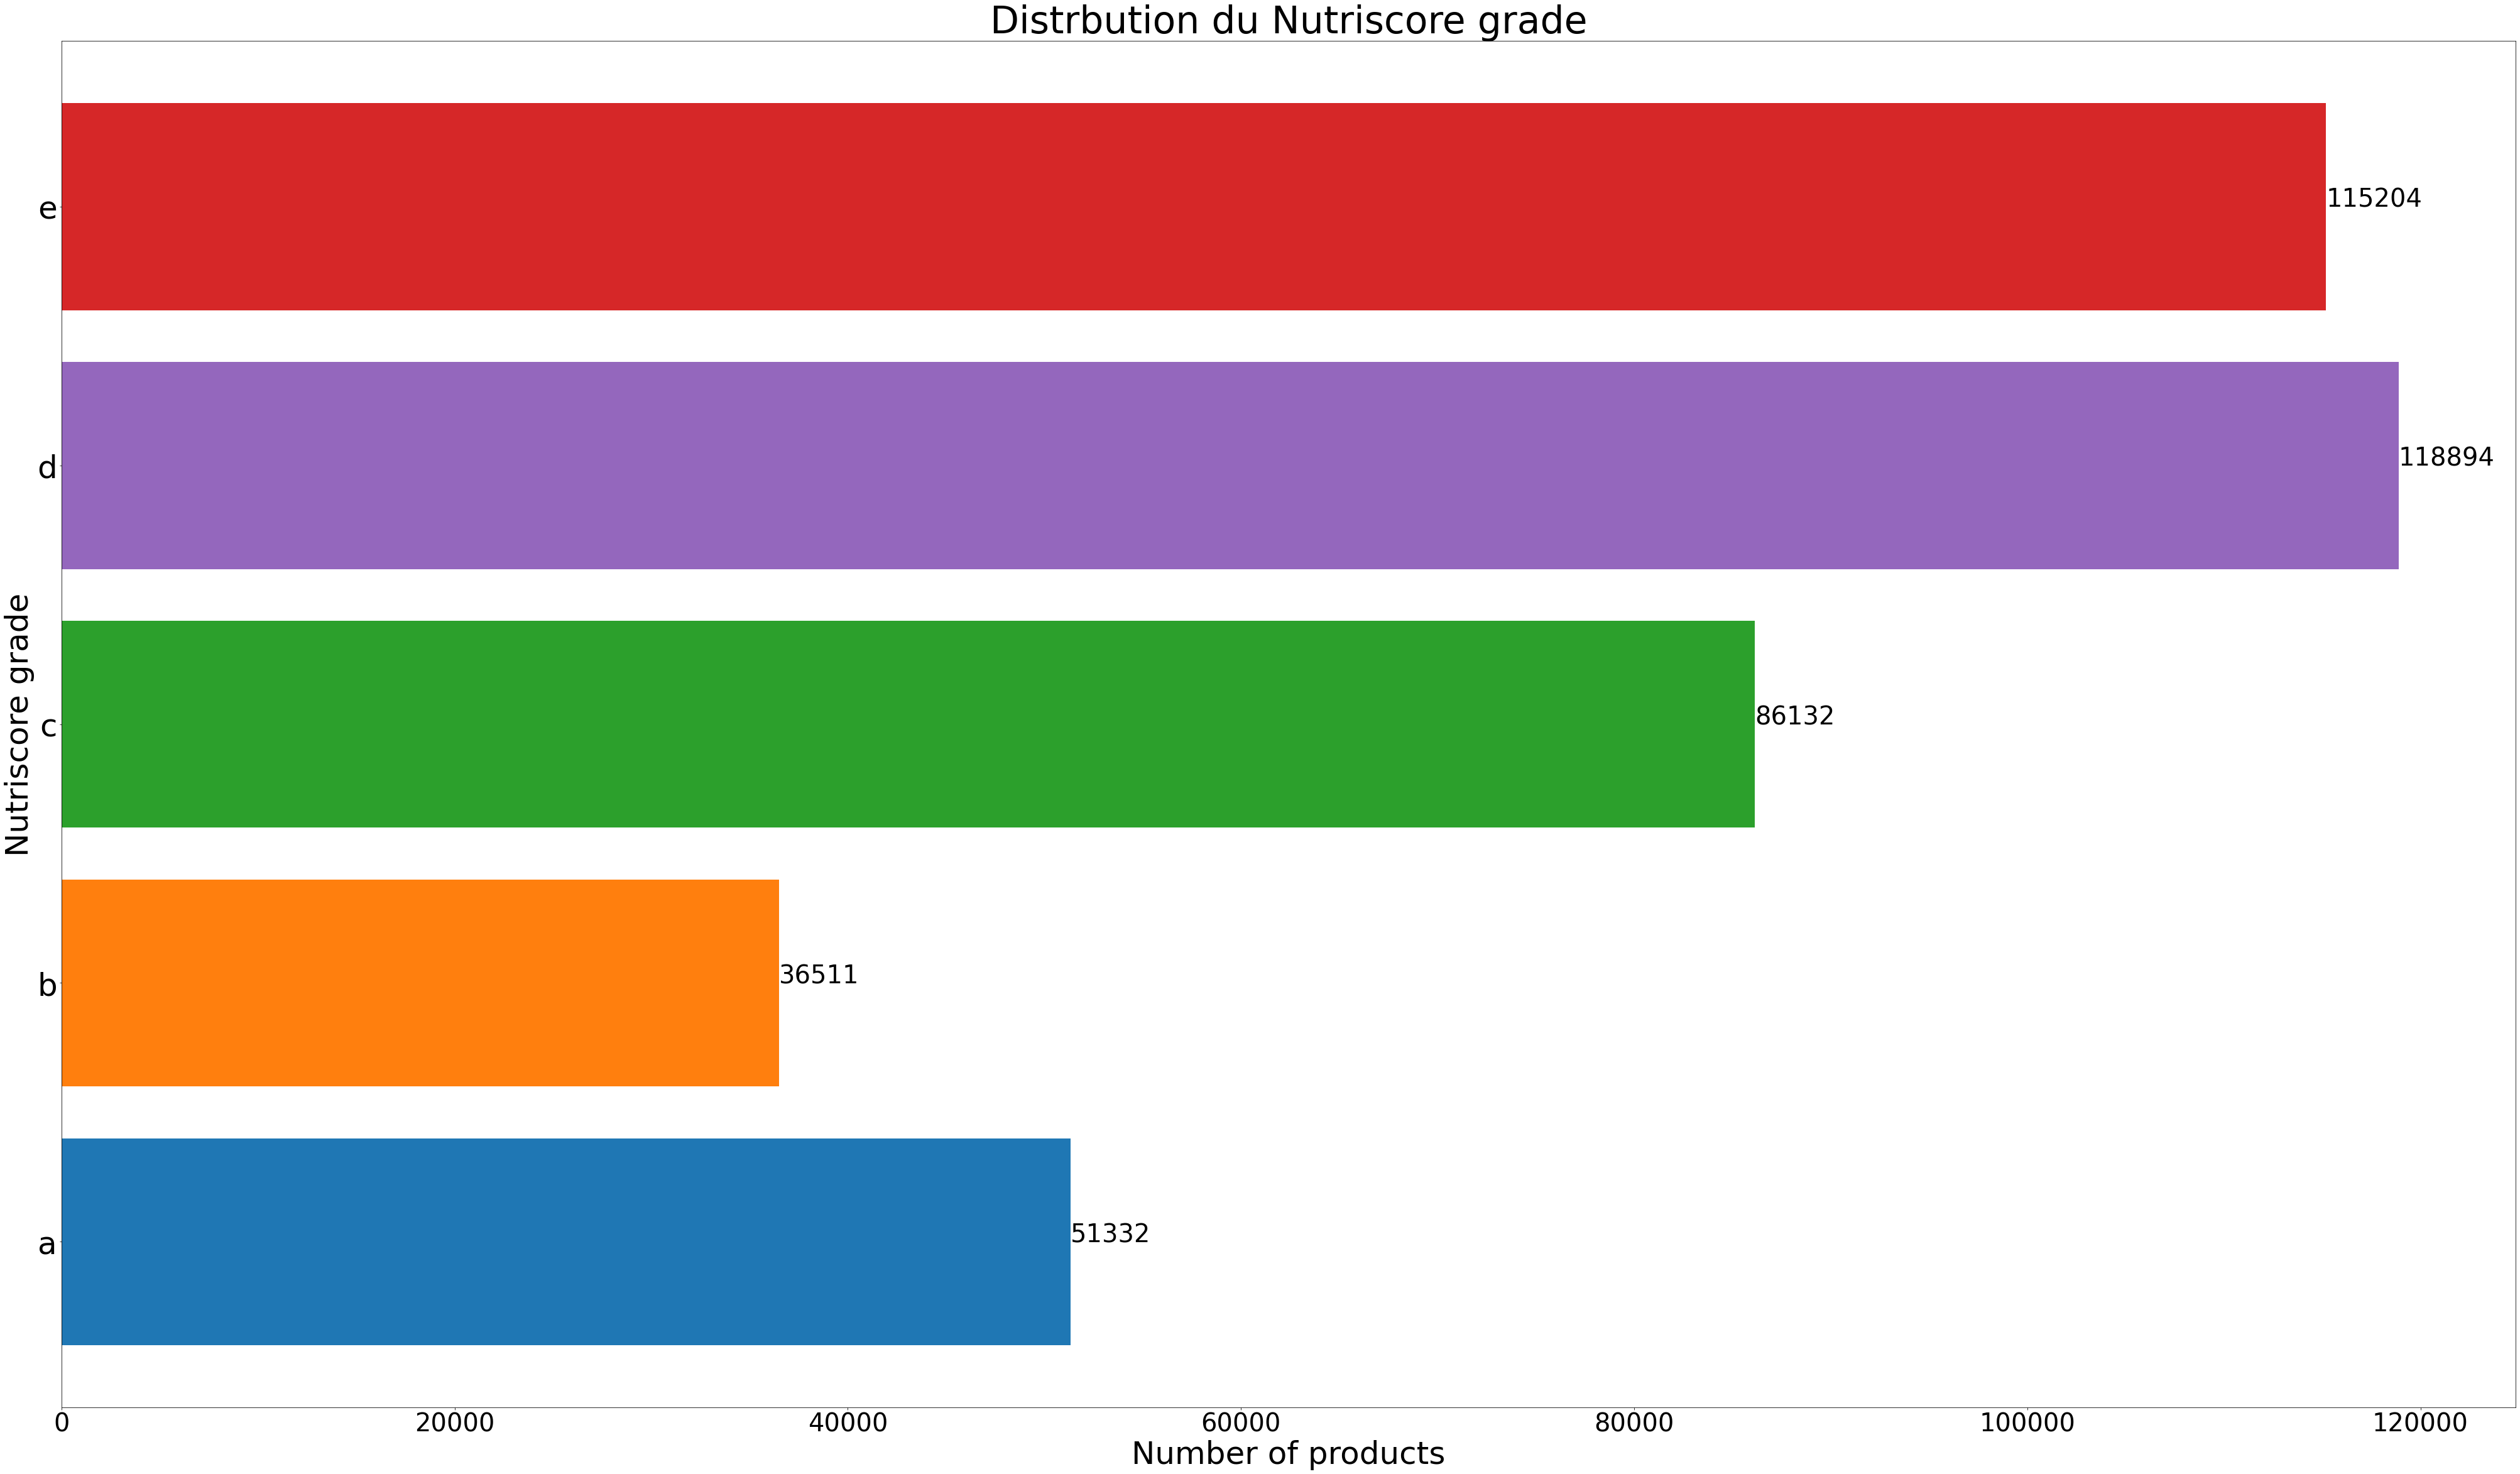

In [29]:
plt.figure(figsize=(70,40))
y=[a,b,c,d,e]

plt.barh(['a','b','c','d','e'], [a,b,c,d,e], color=['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:red'])
for index, value in enumerate(y): 
    plt.text(value, index, str(value), size=40) 

plt.title('Distrbution du Nutriscore grade', size=60)
plt.ylabel('Nutriscore grade', size=50)
plt.xlabel('Number of products', size=50)
plt.yticks(size=50)
plt.xticks(size=40)
plt.show()

In [ ]:
#B.4.2 Diagramme camembert:

Text(0, 0.5, 'Number of products')

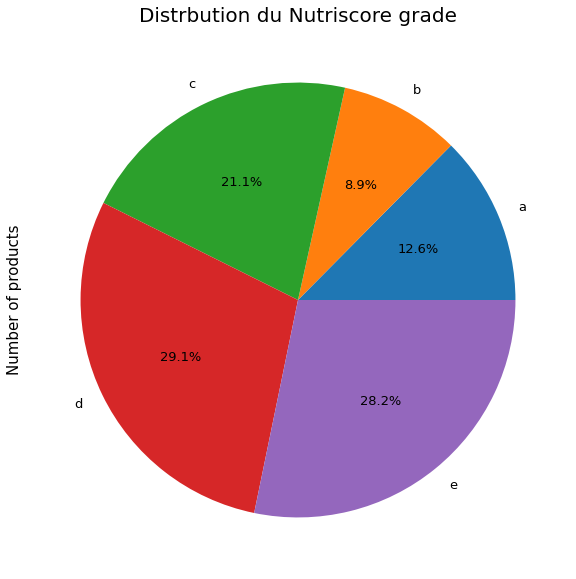

In [30]:
camembert=pd.DataFrame({'number': [a,b,c,d,e]}, index=['a', 'b', 'c', 'd', 'e'])

camembert.plot([a,b,c,d,e], kind='pie', subplots=True, legend=False, figsize=(10,10),  fontsize=13, autopct='%1.1f%%', textprops={'color':"black"})
plt.title('Distrbution du Nutriscore grade', size=20)
plt.ylabel('Number of products', size=15)

In [ ]:
#les différent 'Nutriscore grade' ne contiennent pas un nombre homogène (équitable) de produits. En fait nous avons des 
#données déséquilibrées, puisque la taille des différents Nutriscores est inégale.

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------

In [ ]:
#C. ANALYSE BIVARIÉE (Mesures de liaison entre 2 variables).

#C.1 Entre les 2 variables quantitatives ('Final-carbon-footprint' et 'additives_Total'): 

#[Coefficient de corrélation de Kendall --> Car les distributions de nos variables ne suivent pas une distribution 
#normale (si elles la suivaient on utiliserait le coefficient de corrélation de Pearson)].

In [31]:
df1_1.corr(method='kendall')

Final-carbon-footprint  additives_Total   nb
Final-carbon-footprint                1.000000         0.125752  NaN
additives_Total                       0.125752         1.000000  NaN
nb                                         NaN              NaN  1.0

In [ ]:
#Le coefficient de corrélation de Kendall est une mesure corrélation de rang: on trie les notes de la première variable 
#et lui affecter un numéro d’ordre croissant appelé rang, puis on fait de même sur la seconde variable. Le but est de 
#savoir s’il existe une liaison entre ces 2 rangs, mais la forme de cette lisaison, linéaire ou pas ne peut pas être 
#connue. 

#Dans notre cas, les variables ne présentent pas de corrélation de rang car le coefficient de Kendall<0.8.

#ATTENTION:
#Par contre, il faut savoir qu'un coefficient de Pearson ou de Kendall de valeur nulle ne signifie pas obligatoirement 
#une indépendance absolue des deux variables aléatoires ! En effet, d’autres tests de corrélation peuvent se révéler 
#plus probants. Il faut donc approfondir toujours un peu plus avec un test ANOVA par exemple.

In [ ]:
#-------

In [ ]:
#C.2 Entre la variables qualitative et les variables quantitatives:

#'nutriscore_grade_Total' possède 5 'modalités': a, b, c, d, et e. On va a analyser le comportement des variables 
#'Final-carbon-footprint' et 'additives_Total' pour chaque modalité ('boîtes à moustaches' ou 'boxplot').


#C.2.1 Suppression des outliers:

#Pour commencer il faut supprimer les outliers (ie. les percentiles 1% et 99% ). Comme on l'a déjà fait sur df pour 
#obtenir df1_1, on va juste faire une concaténation pour rajouter la colonne 'nutriscore_grade_Total'. 
#De cette façon les lignes 'outliers' présenteront 'NaN' dans les deux colonnes 'Fnal-carbon-footprnt' et 
#'additives_Total', et par définition boxplot de seaborn ne prends pas en compte les 'NaN' du coup les outliers ne 
#seront pas considérés.

In [32]:
df2=pd.concat([df.loc[:,['code','nutriscore_grade_Total']], df1_1], axis=1)

In [ ]:
#Vérification de la concaténation.

In [33]:
df2.describe()

Final-carbon-footprint  additives_Total        nb
count            48273.000000    193921.000000  202137.0
mean               104.685207         2.494841       1.0
std                112.993086         1.695061       0.0
min                  1.000000         1.000000       1.0
25%                 45.000000         1.000000       1.0
50%                 45.000000         2.000000       1.0
75%                 92.000000         3.000000       1.0
max                558.000000         8.000000       1.0

In [34]:
df2_1=df.loc[:,['code','nutriscore_grade_Total','Final-carbon-footprint','additives_Total']]

In [35]:
df2.head(5)

code nutriscore_grade_Total  Final-carbon-footprint  \
0  0000000000100                      d                     NaN   
1   000000000088                      d                     NaN   
2  0000000000949                      b                     NaN   
3  0000000001885                      a                     NaN   
4  0000000002103                      a                     NaN   

   additives_Total   nb  
0              NaN  NaN  
1              4.0  1.0  
2              2.0  1.0  
3              1.0  1.0  
4              NaN  NaN

In [ ]:
#Note: Les lignes qui correspondent au "valeurs aberrantes" des variables 'Final-carbon-footprint' et 'additives_Total' 
#après concaténation apparaissent avec des "NaN" dans les colonnes correspondantes. En fait, de cette façon quand on fait
#les diagrammes à moustache ce lignes là ne seront pas considérées.

In [36]:
df2_1.head(5)

code nutriscore_grade_Total  Final-carbon-footprint  \
0  0000000000100                      d                     0.0   
1   000000000088                      d                     0.0   
2  0000000000949                      b                     0.0   
3  0000000001885                      a                     0.0   
4  0000000002103                      a                     0.0   

   additives_Total  
0              0.0  
1              4.0  
2              2.0  
3              1.0  
4              0.0

In [ ]:
##Fin de la vérification.

In [ ]:
#C.2.2 'nutriscore_grade_Total' vs 'Final-carbon-footprint':

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


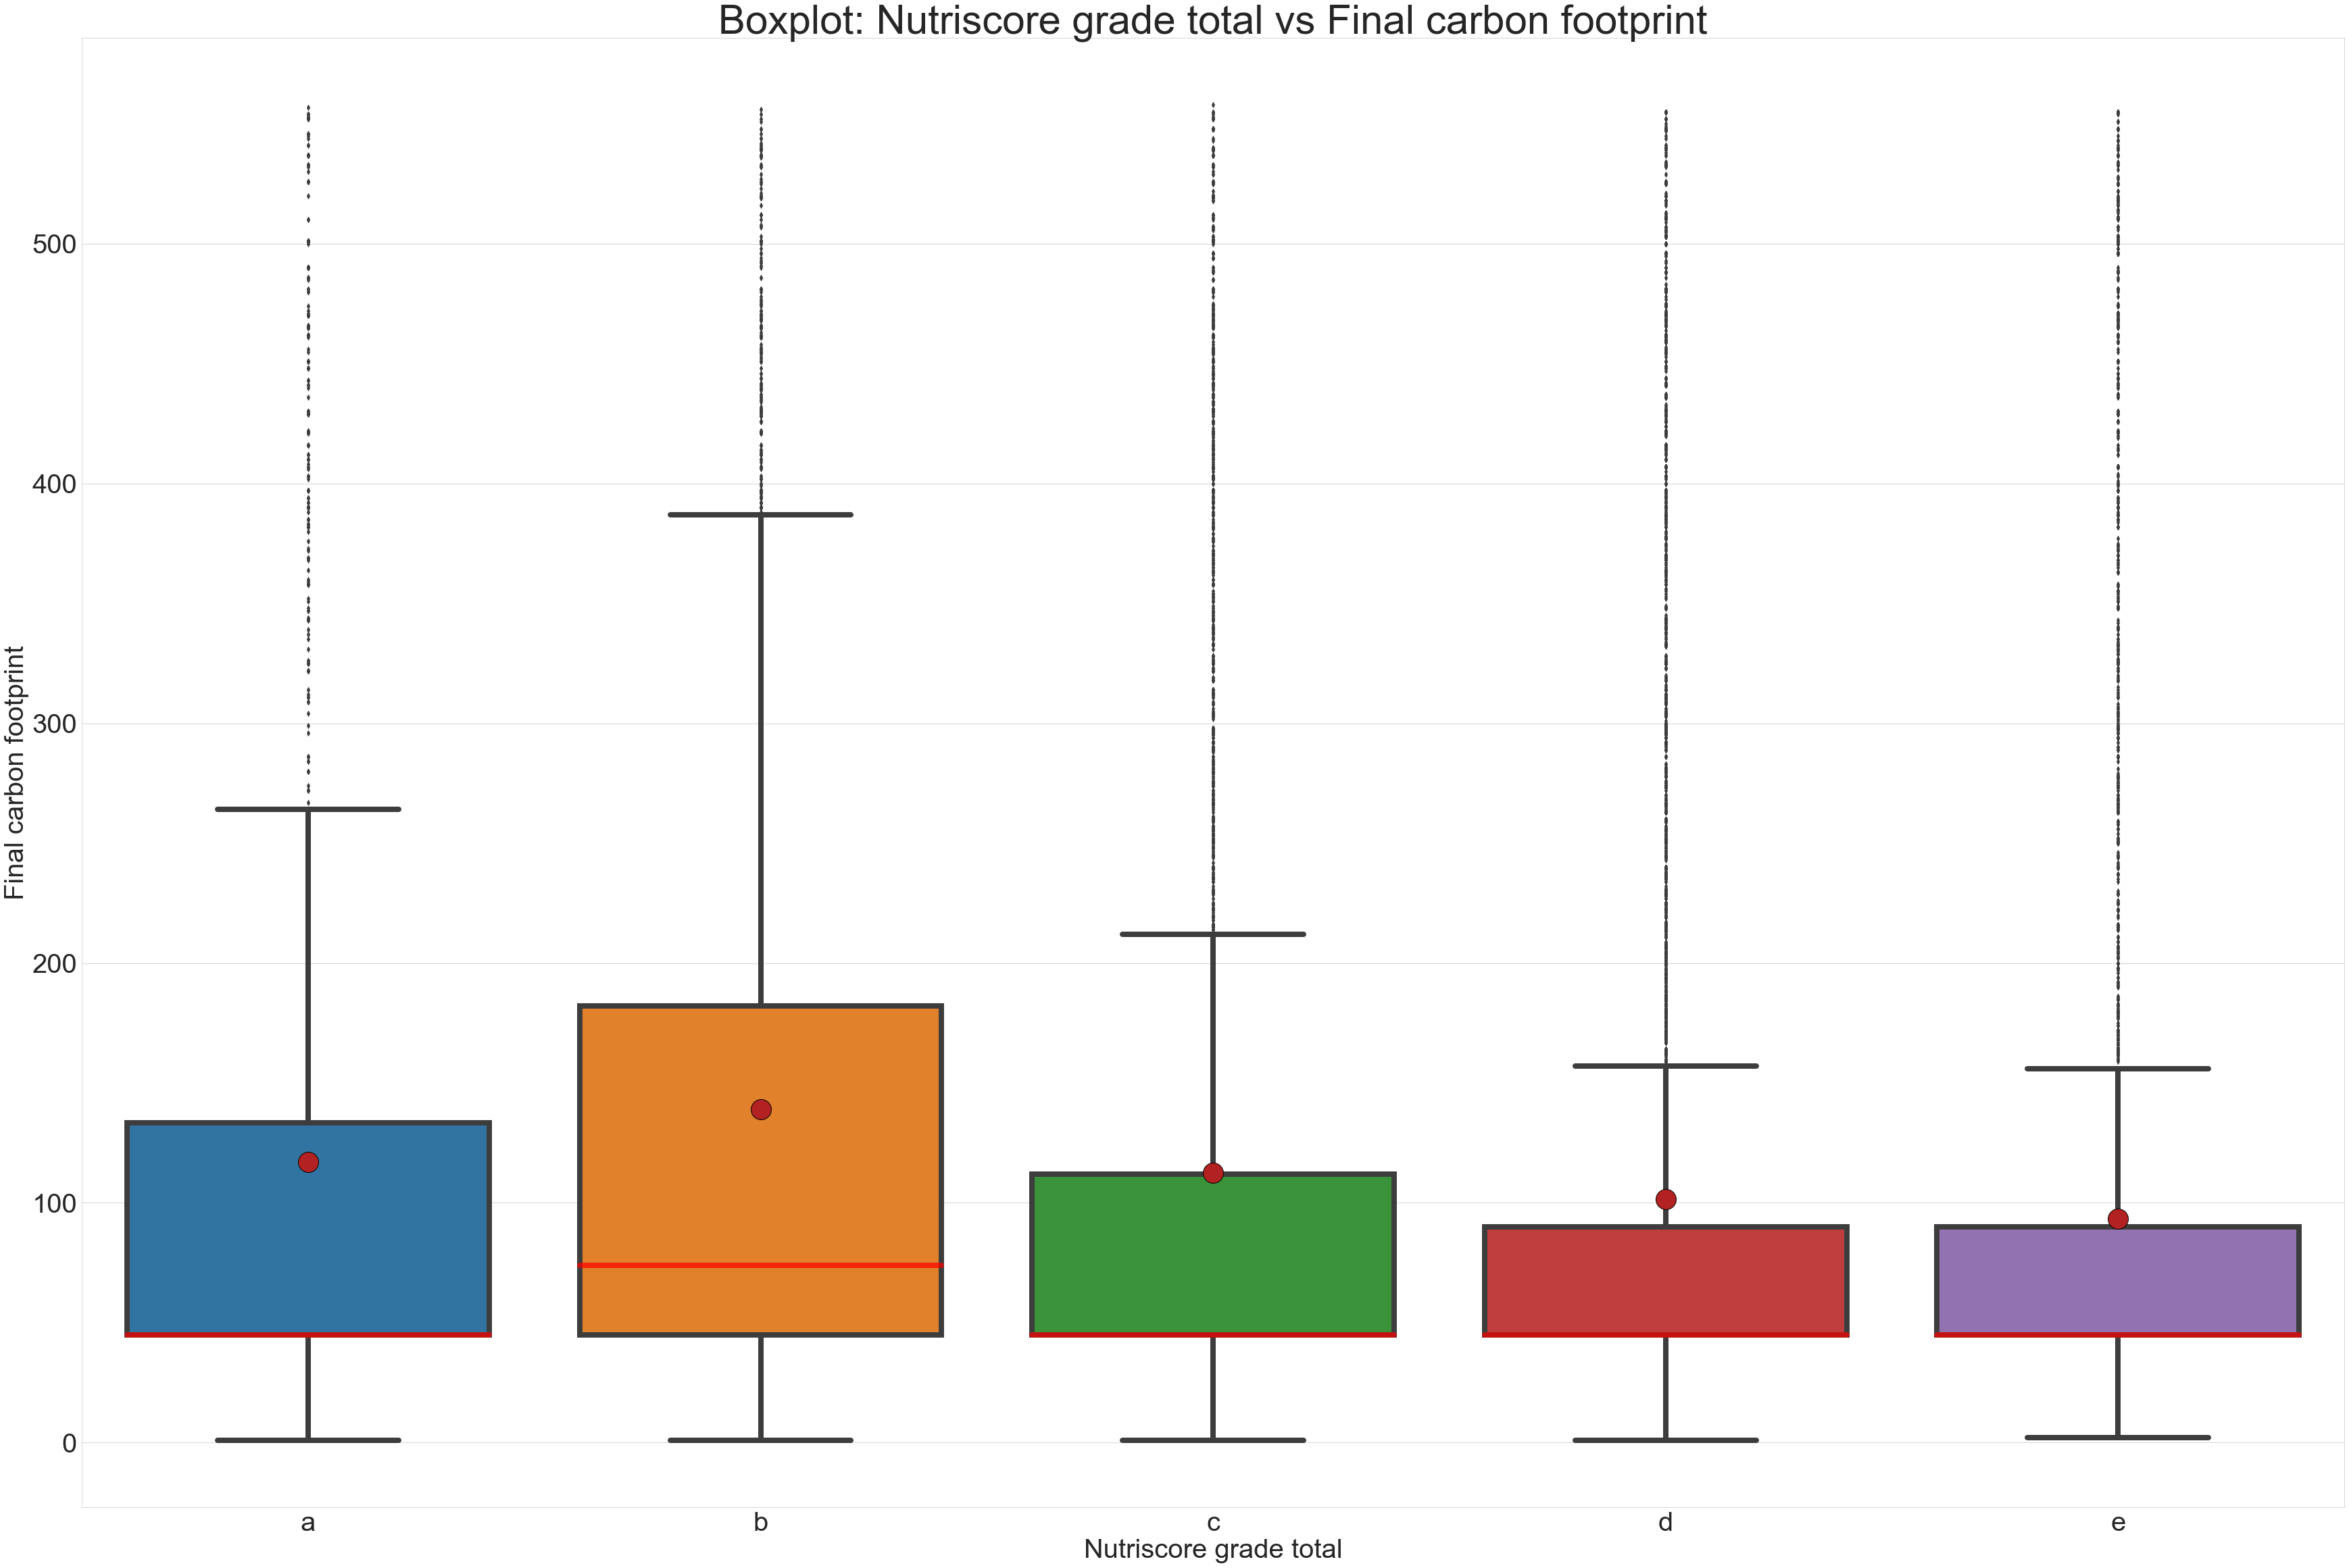

In [37]:
plt.figure(figsize=(60,40))
sns.set_style("whitegrid")
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick','markersize':'30'}
sns.boxplot('nutriscore_grade_Total','Final-carbon-footprint', order=['a','b','c','d','e'], data=df2, showmeans=True, meanprops=meanprops, medianprops=dict(color='red', alpha=0.7), linewidth=8)
plt.ylabel('Final carbon footprint', size=40)
plt.xlabel('Nutriscore grade total', size=40)
plt.yticks(size=40)
plt.xticks(size=40)
plt.title('Boxplot: Nutriscore grade total vs Final carbon footprint', size=60)
plt.show()

In [ ]:
#la répartition du 'Final carbon footprint' au sein des 6 groupes du "nutriscore_grade_Total" ne se fait pas 
#complètement de la même façon:
# Si bien les 'nutriscores' d et e se ressemblent beaucoup, il y a des différences avec les 'nutriscores' a, b et c
#(surtout avec le c).

#Ainsi, on peut dire que le 'Final carbon footprint' diffère d'un 'Nutriscore grade total' à un autre. 
#Il y a donc une dépendance ou de liaison apparente entre les variables 'Final-carbon-footprint' et
#'nutriscore_grade_Total'.

In [ ]:
#C.2.3 'nutriscore_grade_Total' vs 'additives_Total':

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


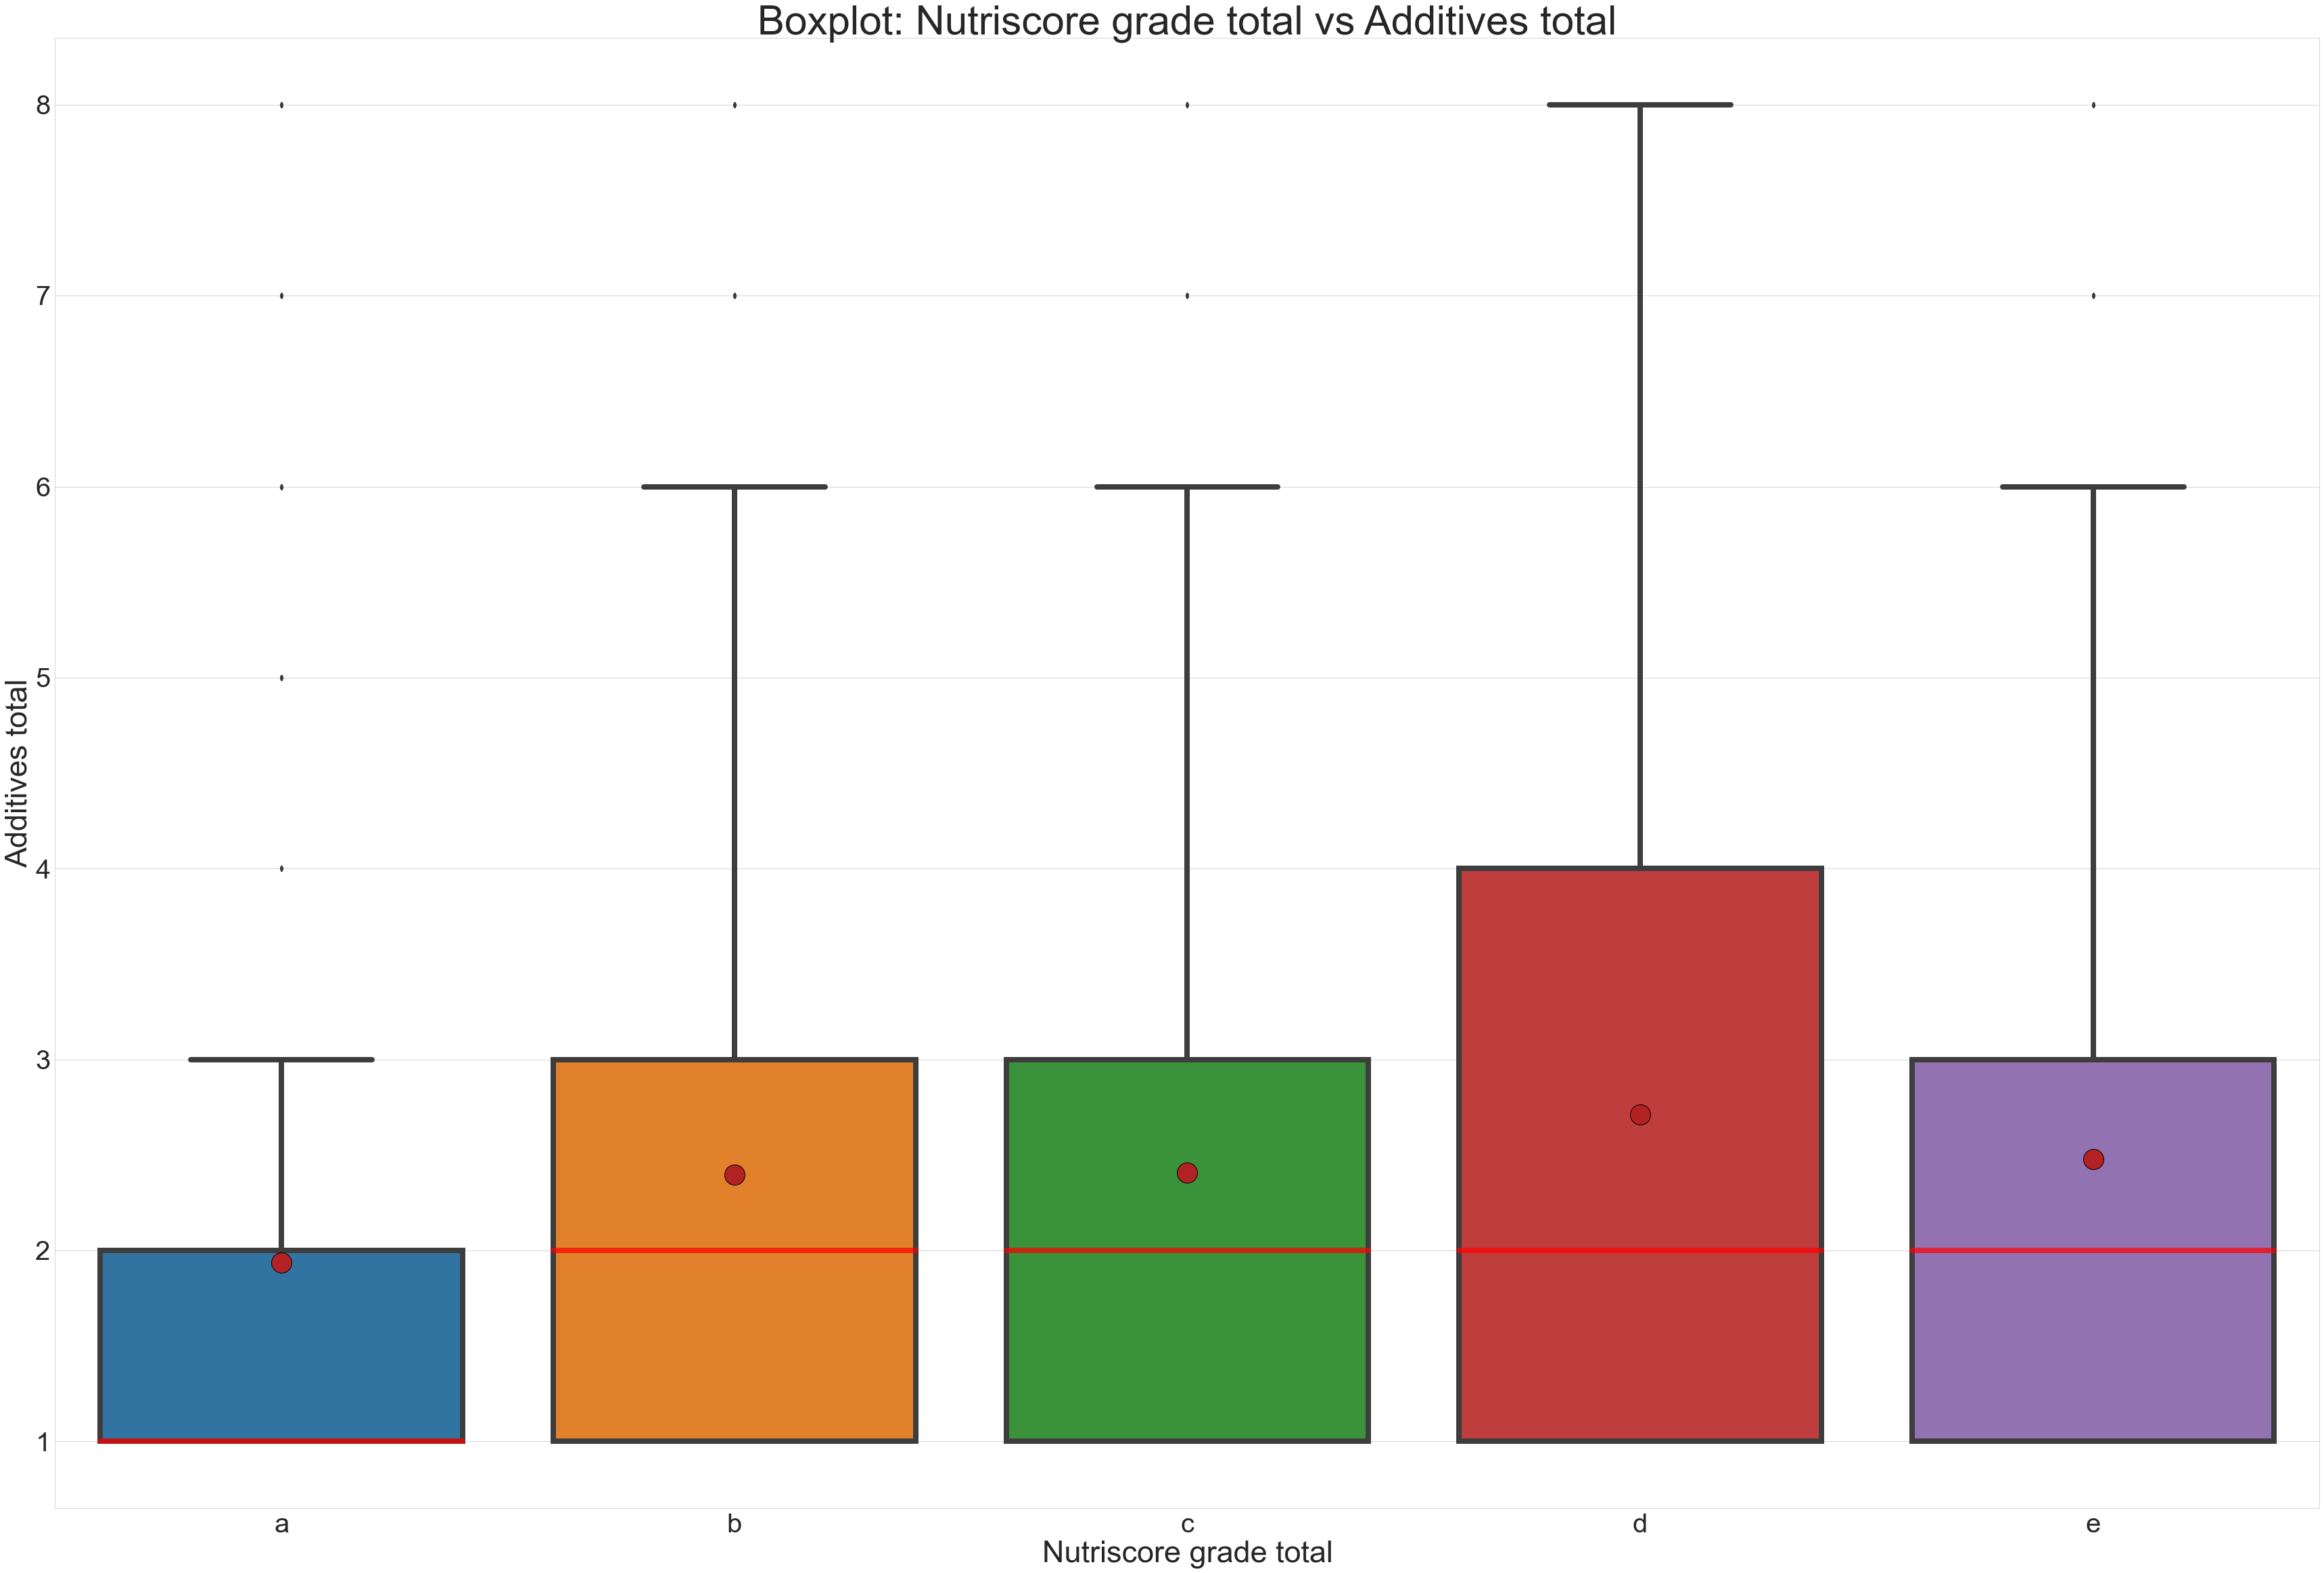

In [38]:
plt.figure(figsize=(60,40))
sns.set_style("whitegrid")
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick','markersize':'30'}
sns.boxplot('nutriscore_grade_Total','additives_Total', order=['a','b','c','d','e'], data=df2, showmeans=True, meanprops=meanprops, medianprops=dict(color='red', alpha=0.7), linewidth=8)
plt.ylabel('Additives total', size=45)
plt.xlabel('Nutriscore grade total', size=45)
plt.yticks(size=40)
plt.xticks(size=40)
plt.title('Boxplot: Nutriscore grade total vs Additives total', size=60)
plt.show()

In [ ]:
#la répartition des 'additives_Total' au sein des 6 groupes du "nutriscore_grade_Total" ne se fait pas 
#complétement de la même façon:
# Si bien les 'nutriscores' b, c et e se ressemblent beaucoup, il y a des différences avec les 'nutriscores' a et d.

#Ainsi, on peut dire que les 'additives_Total' diffèrent d'un 'Nutriscore grade total' à un autre. 
#Il y a donc une dépendance ou de liaison apparente entre les variables 'additives_Total' et 'nutriscore_grade_Total'.

In [ ]:
#C.2.4 ANOVA (One-Way ANOVA car on a 3 variables) pour étudier les relations entre nos 3 variables:

#Le test ANOVA permet de mesurer la dépendance d'une variable quantitative à une (ou deux) variable(s) qualitative(s)
#(appelée(s) facteur(s)).
#Il s'agit de montrer si la dépendance étudiée est ou non significative pour la (ou les) variable(s) qualitative(s) 
#(ie. pour le ou les facteur(s)) considérée(s).
#Pour ce faire on étudie si la moyenne de la variable quantitative étudiée est ou non homogène sur l'ensemble des 
#modalités de la variable qualitative. (Notez que au fond c'est ce que l'on a fait graphiquement lorsque l'on a tracé 
#les diagrammes à moustache).
#Si les moyennes ne sont pas homogènes, ce que l'ANOVA constante en analysant la variance, alors la dépendance est 
#significative.
#L'ANOVA utilise un test de Fisher (ou test F), avec l'hypothèse nulle H0 d'égalité des moyennes (ie. moyennes homogènes).
#Ainsi, si F>>1 (et donc la p-value<<0.05) H0 est rejetée, on a donc des moyennes NON homogènes ce qui implique une 
#dépendance des variables.

#Dans notre cas on peut utiliser l'ANOVA (même si on a an unbalanced data set) pour vérifier la dépendance entre:
#-Notre variable quantitative: 'Final-carbon-footprint' et notre variable qualitative: 'nutriscore_grade_Total' et,
#-Notre variable quantitative: 'additives_Total'  et notre variable qualitative: 'nutriscore_grade_Total'

In [ ]:
# ANOVA entre 'Final-carbon-footprint' et 'nutriscore_grade_Total'

In [39]:
model = ols('additives_Total~ nutriscore_grade_Total', data=df2).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

df         sum_sq      mean_sq           F  \
nutriscore_grade_Total       4.0    7520.605255  1880.151314  663.307781   
Residual                193916.0  549656.482848     2.834508         NaN   

                        PR(>F)  
nutriscore_grade_Total     0.0  
Residual                   NaN

In [ ]:
#La p-value (PR) étant << 0.05, la dépendance des variables est vérifiée.
#On avait vu ceci avec les diagrammes à moustaches où pour certains 'nutriscore' le comportement était différent.

In [ ]:
#ANOVA entre 'additives_Total' et 'nutriscore_grade_Total'

In [40]:
df2_g=df2
df2_g=df2_g.rename(columns={'Final-carbon-footprint':'Final_carbon_footprint'})
df2_g.head(5)

code nutriscore_grade_Total  Final_carbon_footprint  \
0  0000000000100                      d                     NaN   
1   000000000088                      d                     NaN   
2  0000000000949                      b                     NaN   
3  0000000001885                      a                     NaN   
4  0000000002103                      a                     NaN   

   additives_Total   nb  
0              NaN  NaN  
1              4.0  1.0  
2              2.0  1.0  
3              1.0  1.0  
4              NaN  NaN

In [41]:
model = ols('Final_carbon_footprint~ nutriscore_grade_Total', data=df2_g).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

df        sum_sq       mean_sq           F  \
nutriscore_grade_Total      4.0  7.224141e+06  1.806035e+06  143.122269   
Residual                48268.0  6.090856e+08  1.261883e+04         NaN   

                               PR(>F)  
nutriscore_grade_Total  7.416030e-122  
Residual                          NaN

In [ ]:
#La p-value (PR) étant << 0.05, la dépendance des variables est vérifiée.
#On avait vu ceci avec les diagrammes à moustaches où pour certains 'nutriscore' le comportement était différent.

In [ ]:
#-------

In [ ]:
#C.3 Heatmaps des corrélations entre les variables:

In [ ]:
#C.3.1 Transformation de 'nutriscore_grade_Total' en variable numérique:

#Pour faire des clusters avec la méthode k-Means (avec la méthode elbow), il faut que nos trois variable soient 
#numériques. 
#On associe au 'nutriscore_grade_Total': 
#a-->1, b-->2, c-->3, d-->4, e-->5, n-->0.

#ATTENTION: il faut reprendre le data set sans outliers (ie. le dataframe df2), car les méthodes PCA et k-Means en sont 
#sensibles.

In [42]:
df3=df2

In [43]:
df3['nutriscore_grade_Total']=df3['nutriscore_grade_Total'].replace('a', 1)

In [44]:
df3['nutriscore_grade_Total']=df3['nutriscore_grade_Total'].replace('b', 2)

In [45]:
df3['nutriscore_grade_Total']=df3['nutriscore_grade_Total'].replace('c', 3)

In [46]:
df3['nutriscore_grade_Total']=df3['nutriscore_grade_Total'].replace('d', 4)

In [47]:
df3['nutriscore_grade_Total']=df3['nutriscore_grade_Total'].replace('e', 5)

In [48]:
df3['nutriscore_grade_Total']=df3['nutriscore_grade_Total'].replace('n', 0)

In [49]:
df3.head(5)

code  nutriscore_grade_Total  Final-carbon-footprint  \
0  0000000000100                       4                     NaN   
1   000000000088                       4                     NaN   
2  0000000000949                       2                     NaN   
3  0000000001885                       1                     NaN   
4  0000000002103                       1                     NaN   

   additives_Total   nb  
0              NaN  NaN  
1              4.0  1.0  
2              2.0  1.0  
3              1.0  1.0  
4              NaN  NaN

In [50]:
data=df3[['nutriscore_grade_Total', 'Final-carbon-footprint','additives_Total']]

In [ ]:
#ATTENTION: rappelons que pour construire df2 on a fait une concaténation, et donc que les lignes liées aux outliers des
#variables 'Final-carbon-footprint' et 'additives_total' présentent dans les colonnes respectives de 'NaN', il faut donc
#éliminer ces lignes avec des 'NaN' avant de lancer le PCA et le k-Means.

In [51]:
data.shape

(408073, 3)

In [52]:
data.describe()

nutriscore_grade_Total  Final-carbon-footprint  additives_Total
count           408073.000000            48273.000000    193921.000000
mean                 3.514925              104.685207         2.494841
std                  1.322156              112.993086         1.695061
min                  1.000000                1.000000         1.000000
25%                  3.000000               45.000000         1.000000
50%                  4.000000               45.000000         2.000000
75%                  5.000000               92.000000         3.000000
max                  5.000000              558.000000         8.000000

In [ ]:
#Même si la std est non nulle pour les 3 variables, comme nos deux variables quantitatives présentent une distribution
#non normale, on ne peut pas calculer le coefficient de corrélation de Pearson. Par contre on calculera le coefficient
#de corrélation de Kendall, lui étant adapté aux distributions non normales, et étudiant la corrélation de rang entre
#le variables.

In [ ]:
#On a 3 colonnes, car 3 variables, et donc 3 dimensions.

#-------

In [ ]:
#C.3.2 Heatmaps des corrélations entre variables:
#[Coefficient de corrélation de Kendall].

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


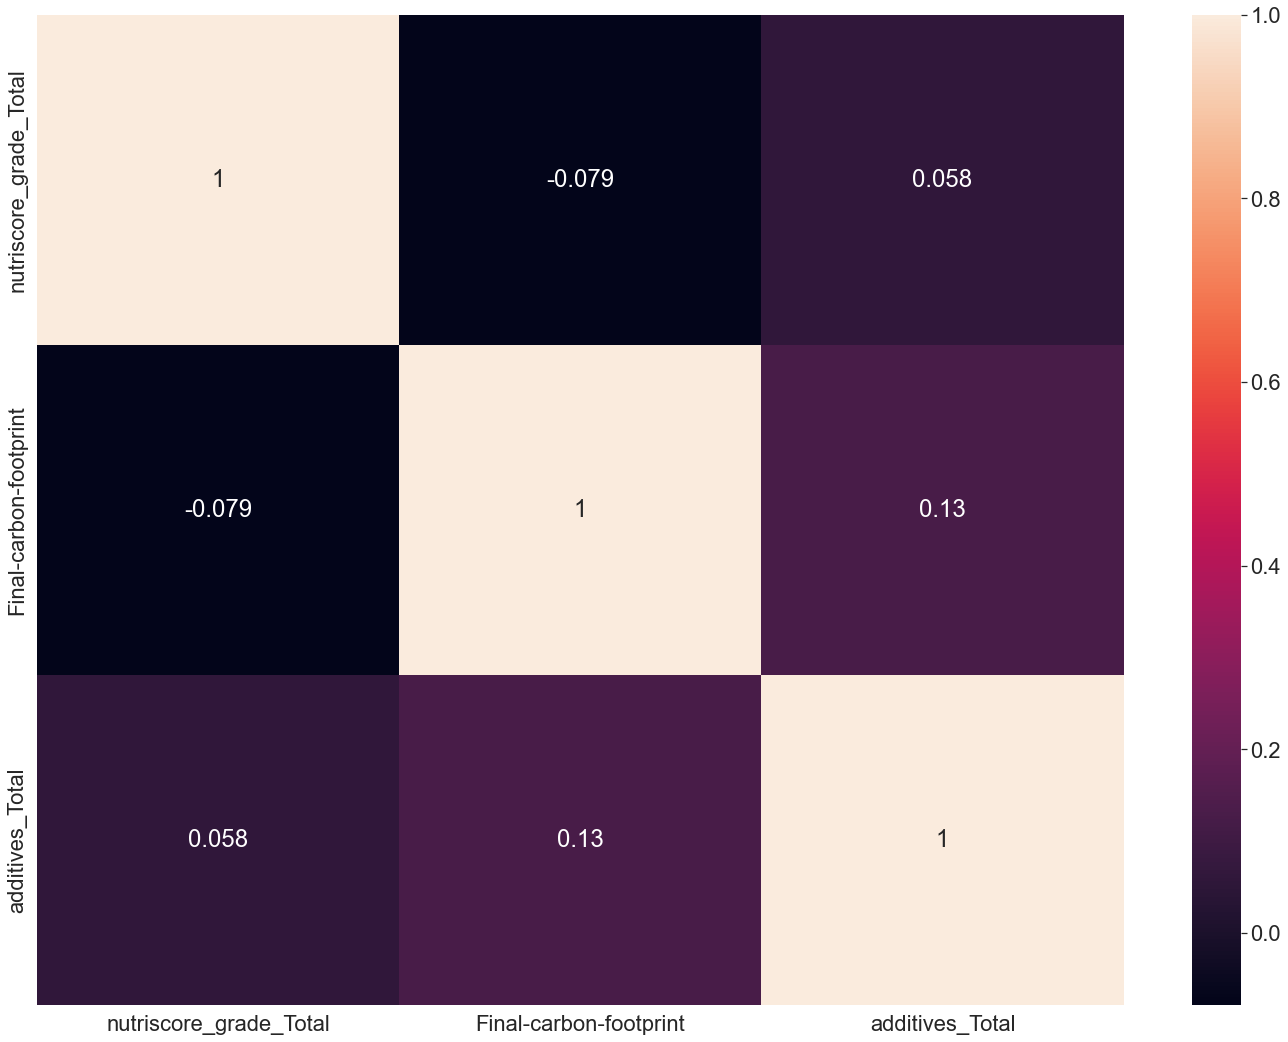

In [53]:
plt.figure(figsize=(20,15))
plt.rc('axes', labelsize=15)
sns.set(font_scale=2)
sns.heatmap(data.corr(method='kendall'), annot=True)
plt.tight_layout()
plt.show()

In [ ]:
#Le heatmap des coefficients de corrélation de Kendall entre nos 3 variables est <0.8, ce qui implique qu'elles ne 
#présentent pas de corrélation de rang entre elles.

#Par contre, il faut savoir qu'un coefficient de Pearson ou de Kendall de valeur nulle ne signifie pas obligatoirement 
#une indépendance absolue des deux variables aléatoires ! En effet, d’autres tests de corrélation peuvent se révéler 
#plus probants. Il faut donc approfondir toujours un peu plus avec un test ANOVA par exemple, tout comme on l'a fait 
#auparavant, qui finissent par mettre en évidences des dépendances plus subtiles.

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------

In [ ]:
#D. ANALYSE MULTVARIÉE.

In [ ]:
#D.2 Effacer les lignes avec les 'NaN' (ie. lignes d'outliers):

In [54]:
data_sn=data.dropna(subset=['Final-carbon-footprint', 'additives_Total'])

In [55]:
data_sn.head(5)

nutriscore_grade_Total  Final-carbon-footprint  additives_Total
11                       1                   402.0              3.0
35                       2                    90.0              4.0
49                       5                    45.0              3.0
64                       4                    90.0              5.0
65                       4                    90.0              6.0

In [ ]:
#-------

In [ ]:
#ATTENTION NO GO.

In [ ]:
#D.3 Réduction dimensionnelle (PCA):

#On utilise le PCA pour réduire le nombre de dimensions (nous en avons en fait 3, car nous avons 3 variables) à 2,
#(PCA(2)) afin de pouvoir visualiser les résultats à l'aide d'un nuage de points 2D.

In [56]:
pca = PCA(2)

In [57]:
data_sn2 = pca.fit_transform(data_sn)
data_sn2.shape

(40057, 2)

In [58]:
data_sn2=pd.DataFrame(data_sn2)

In [59]:
data_sn2.head(5)

0         1
0  300.359673 -0.772986
1  -11.640924  0.306937
2  -56.644117 -0.653178
3  -11.642678  1.326708
4  -11.642443  2.326659

In [ ]:
#On a suite au PCA 2 colonnes et donc 2 dimensions.

#-------

In [ ]:
#D.3 Obtention du 'k' (Elbow method):

#D.3.1 (APRÈS PCA):

In [60]:
sse_ap = []
K=range(1, 11)
for k in K:
 kmeans = KMeans(n_clusters=k)
 kmeans.fit(data_sn2)
 sse_ap.append(kmeans.inertia_)

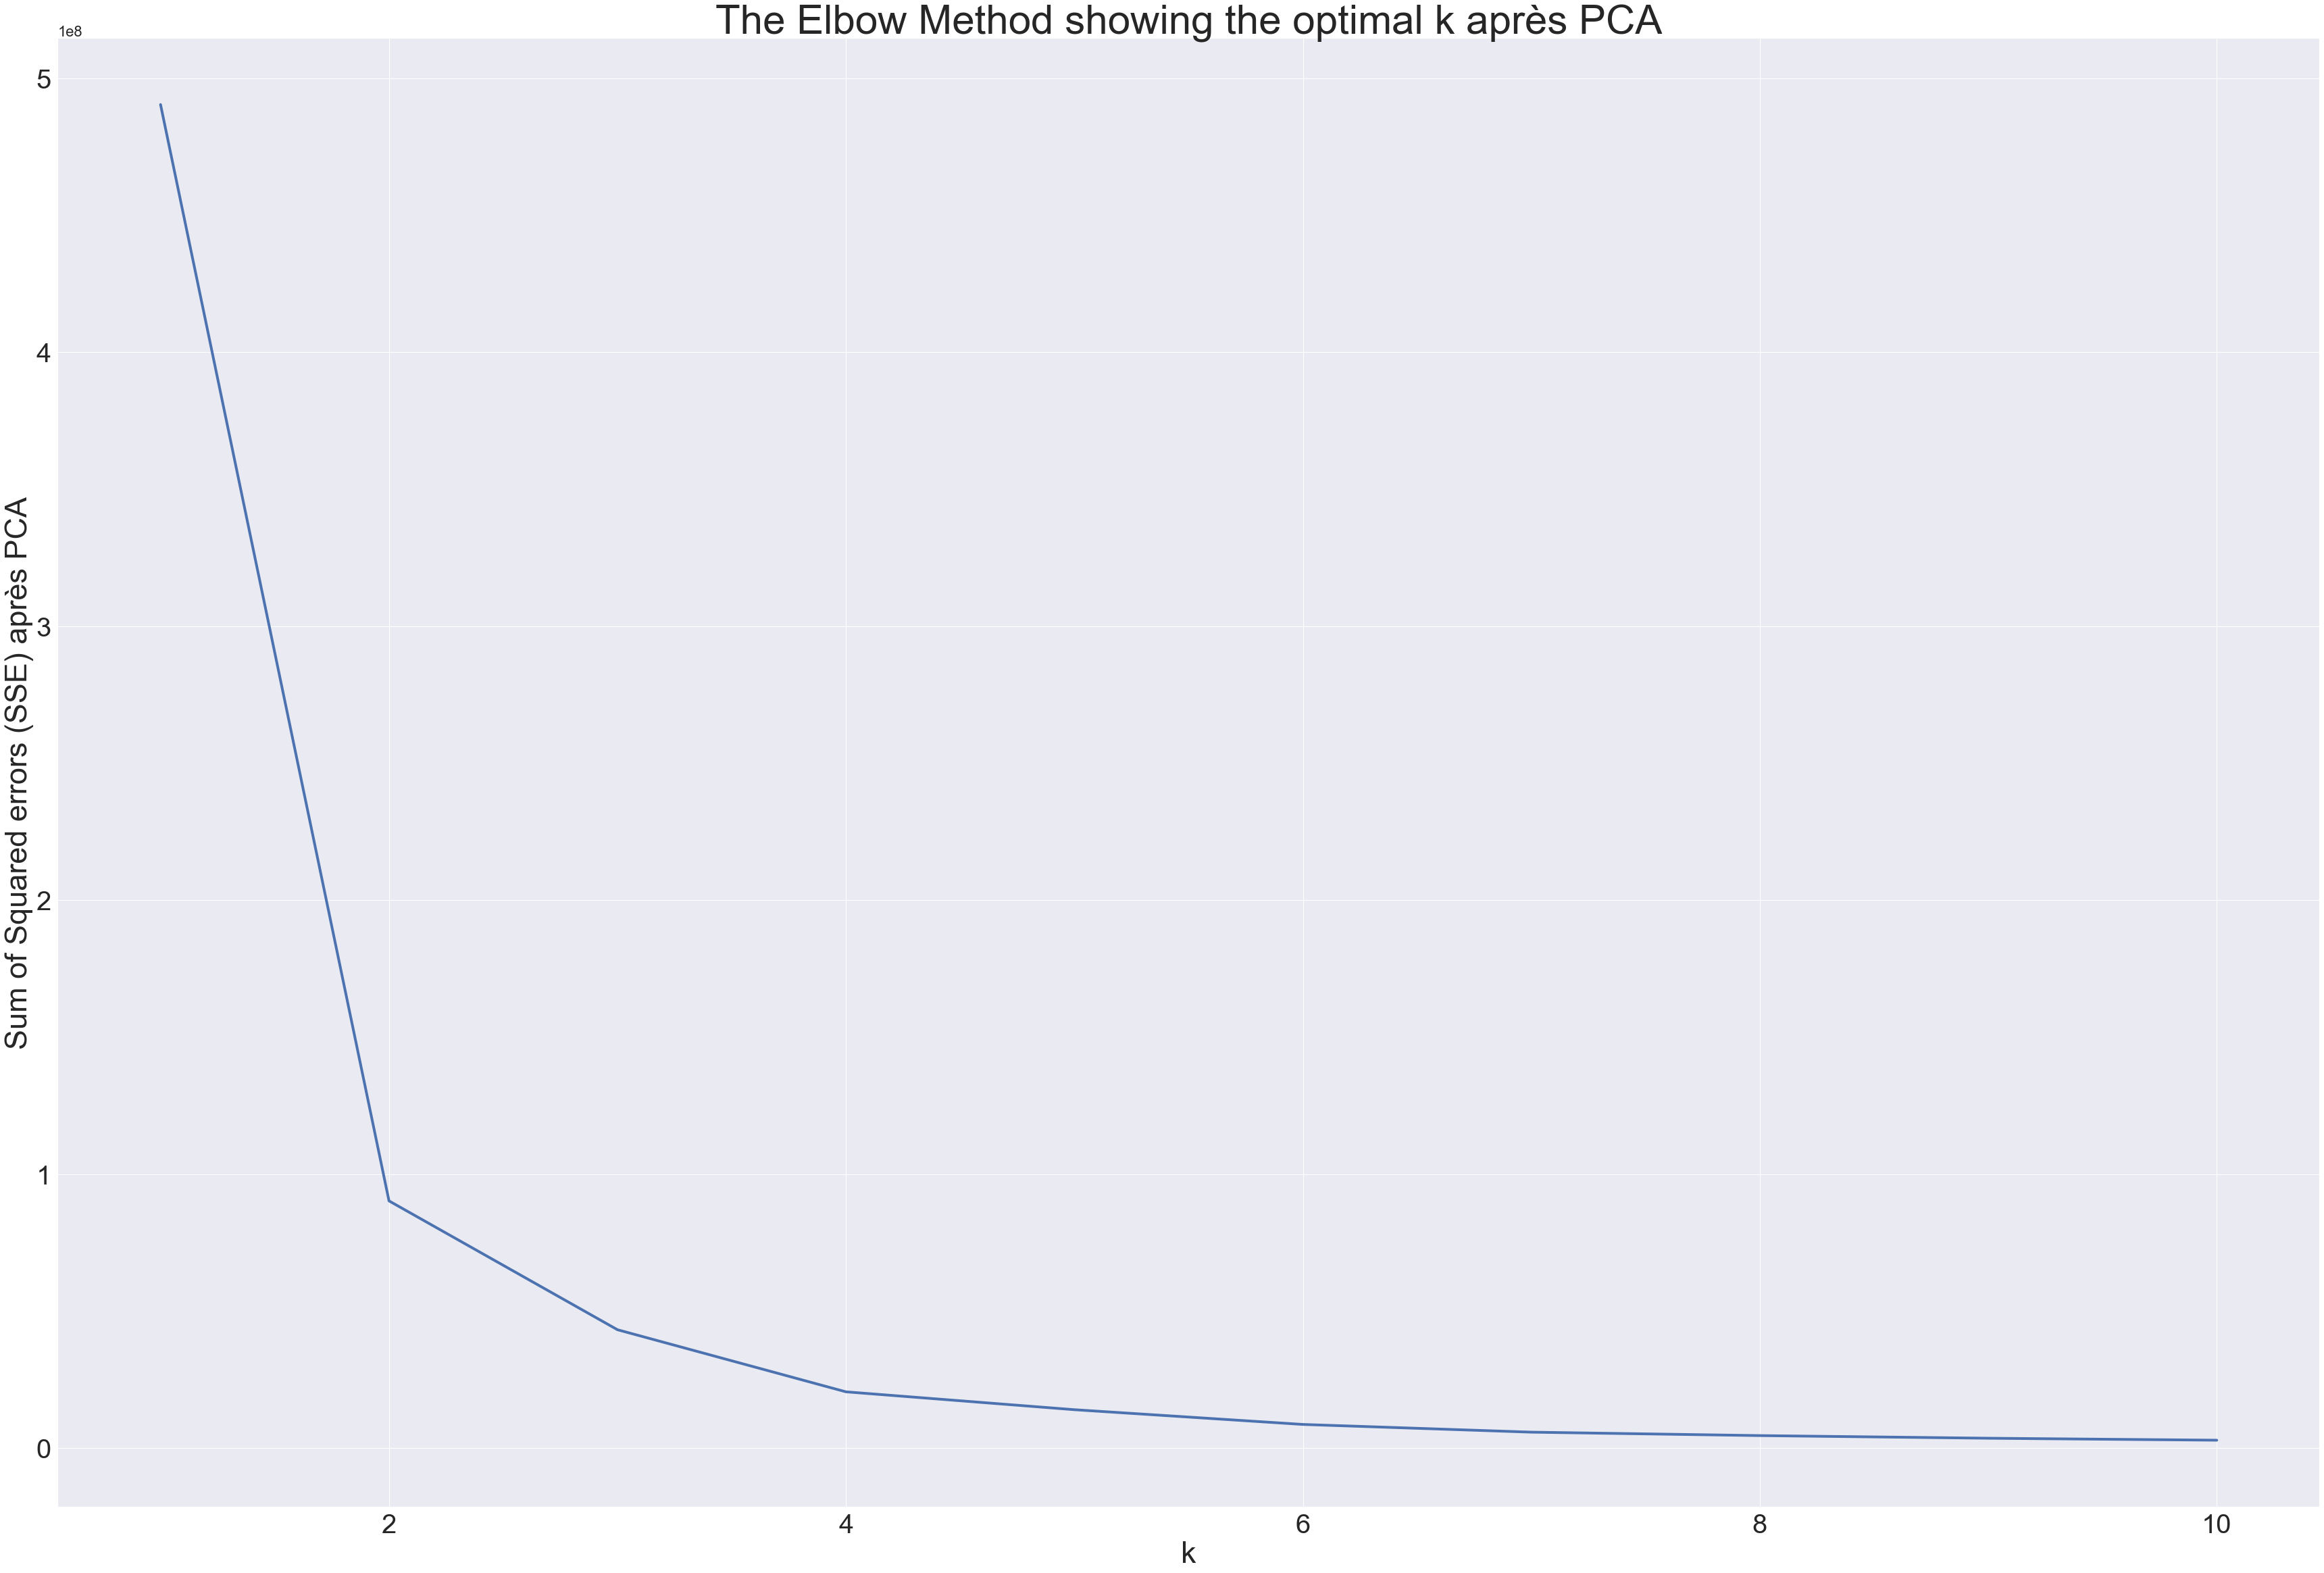

In [61]:
plt.figure(figsize=(60,40))
plt.plot(K, sse_ap, linewidth=4)
plt.xlabel('k', size=45)
plt.ylabel('Sum of Squared errors (SSE) après PCA', size=45)
plt.title('The Elbow Method showing the optimal k après PCA', size=60)
plt.yticks(size=40)
plt.xticks(size=40)
plt.show()

In [ ]:
#Le Elbow est 3. C'est ad hoc avec notre idée de faire 3 catégories: 'Bon, Moyen, Mauvais'.

In [ ]:
#D.3.1 (AVANT PCA) (avec les 3 colonnes et donc 3 variables et 3 dimensions):

In [62]:
sse_av = []
K=range(1, 11)
for k in K:
 kmeans = KMeans(n_clusters=k)
 kmeans.fit(data_sn)
 sse_av.append(kmeans.inertia_)

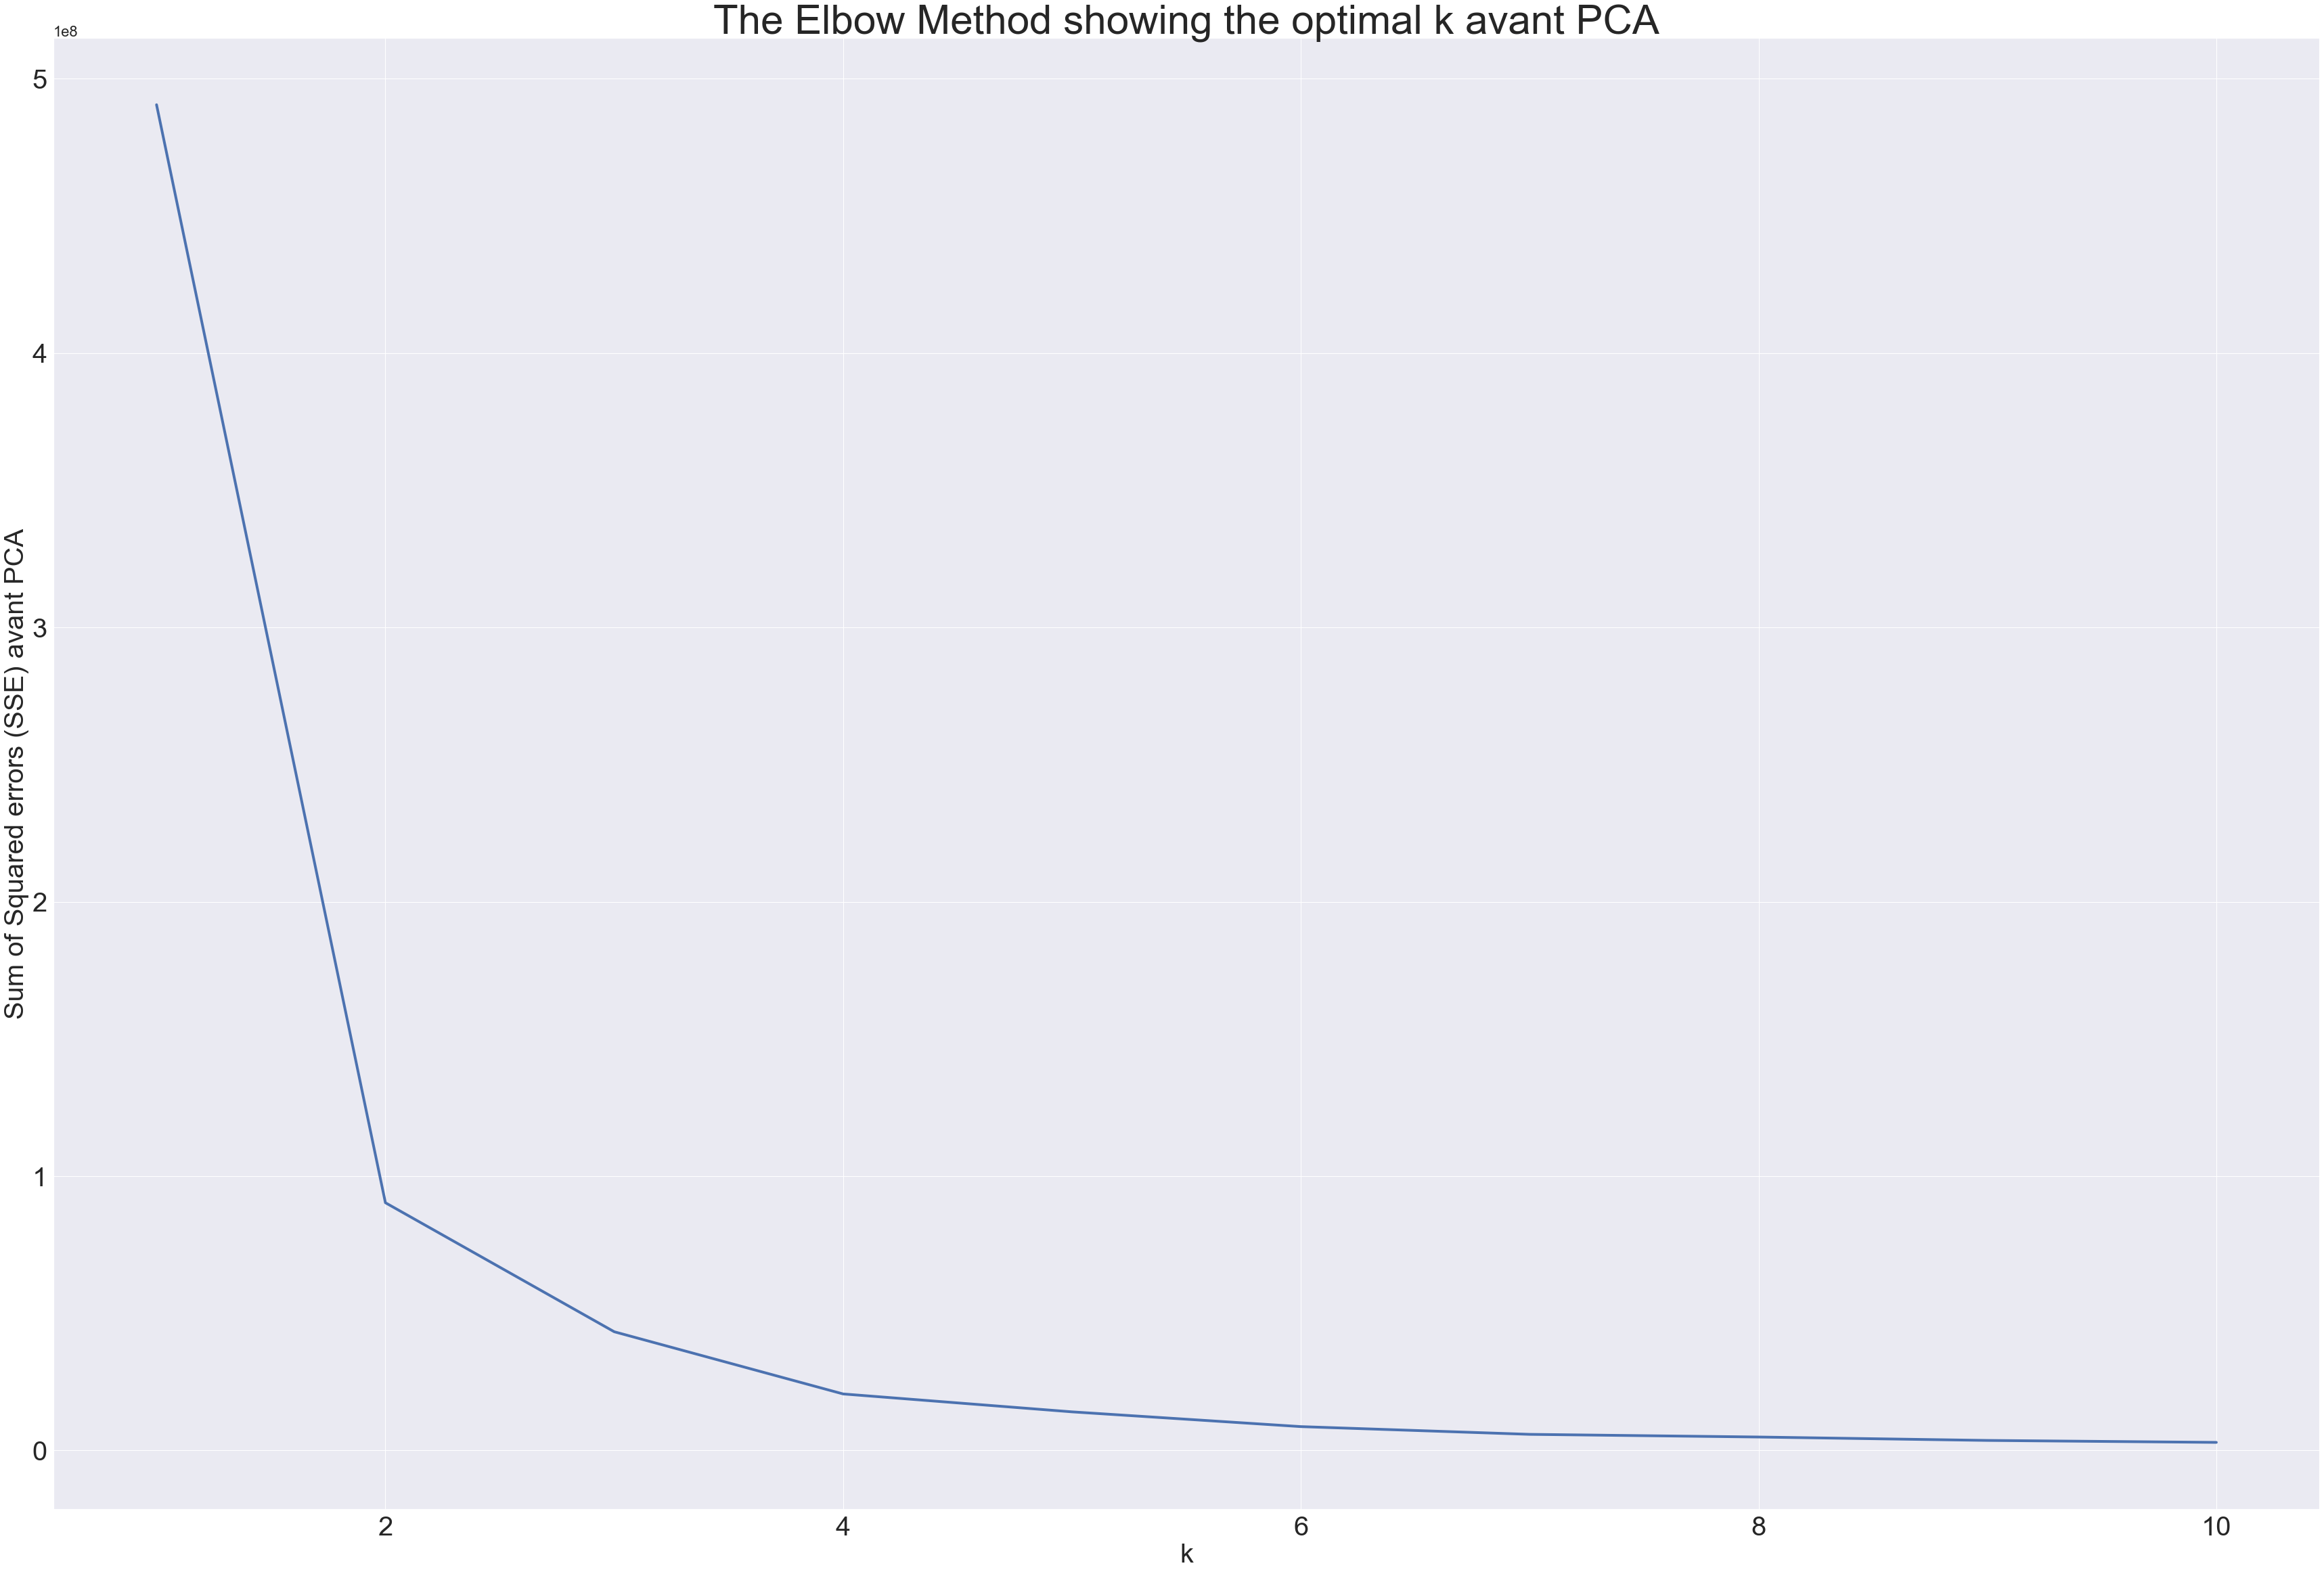

In [63]:
plt.figure(figsize=(60,40))
plt.plot(K, sse_av, linewidth=4)
plt.xlabel('k', size=40)
plt.ylabel('Sum of Squared errors (SSE) avant PCA', size=40)
plt.title('The Elbow Method showing the optimal k avant PCA', size=60)
plt.yticks(size=40)
plt.xticks(size=40)
plt.show()

In [ ]:
#Notez que le Elbow est 3, tout comme c'est le cas après avoir fait le PCA.

In [ ]:
#-------

In [ ]:
#D.4 Kmeans k=3 :

#D.4.1 (APRÈS PCA):
#On prend l'option après PCA pour pouvoir, comme on l'a dit auparavant, bien visualiser graphiquement les résultats en 
#2D.

In [ ]:
#ATTENTION: On lance une première fois le KMeans, pour trouver les centroids et après les fixer. 
#Le but c'est d'avoir toujours les mêmes valeurs quand on lance le code. Si on ne fait pas ceci le KMeans prend des
#centroids de façon random et donne donc des résultats différents à chaque fois. 

##D.4.1.2 1ere fois KMean pour obtention des centroids:

In [ ]:
#data3=data_sn2
#data3=pd.DataFrame(data3)

#kmeans= KMeans(n_clusters=3, precompute_distances="auto")
#label1=kmeans.fit_predict(data3)

In [ ]:
#centroids1=kmeans.cluster_centers_

In [ ]:
#centroids1

In [ ]:
#D.4.1.2 2ème fois KMeans en fixant les centroids:
#(C'est l'array de 'centroids1' celui qu'on met dans 'startpts1').

In [64]:
startpts1=np.array([[-4.08609356e+01,  4.18445168e-02], [ 3.51387653e+02, -4.42723214e-01],[ 1.45063549e+02, -8.41423654e-02]], np.float64)

In [65]:
data3=data_sn2
data3=pd.DataFrame(data3)

data3['clusters'] =KMeans(n_clusters=3,  init=startpts1, n_init=1).fit_predict(data3)

In [ ]:
##Vérification.

In [66]:
data3.head(5)

0         1  clusters
0  300.359673 -0.772986         1
1  -11.640924  0.306937         0
2  -56.644117 -0.653178         0
3  -11.642678  1.326708         0
4  -11.642443  2.326659         0

In [67]:
data3['clusters'].drop_duplicates()

0    1
1    0
8    2
Name: clusters, dtype: int32

In [ ]:
#Distribution des produits par cluster:

In [68]:
cluster0 = data3[data3['clusters'] == 0]

In [69]:
cluster1 = data3[data3['clusters'] == 1]

In [70]:
cluster2 = data3[data3['clusters'] == 2]

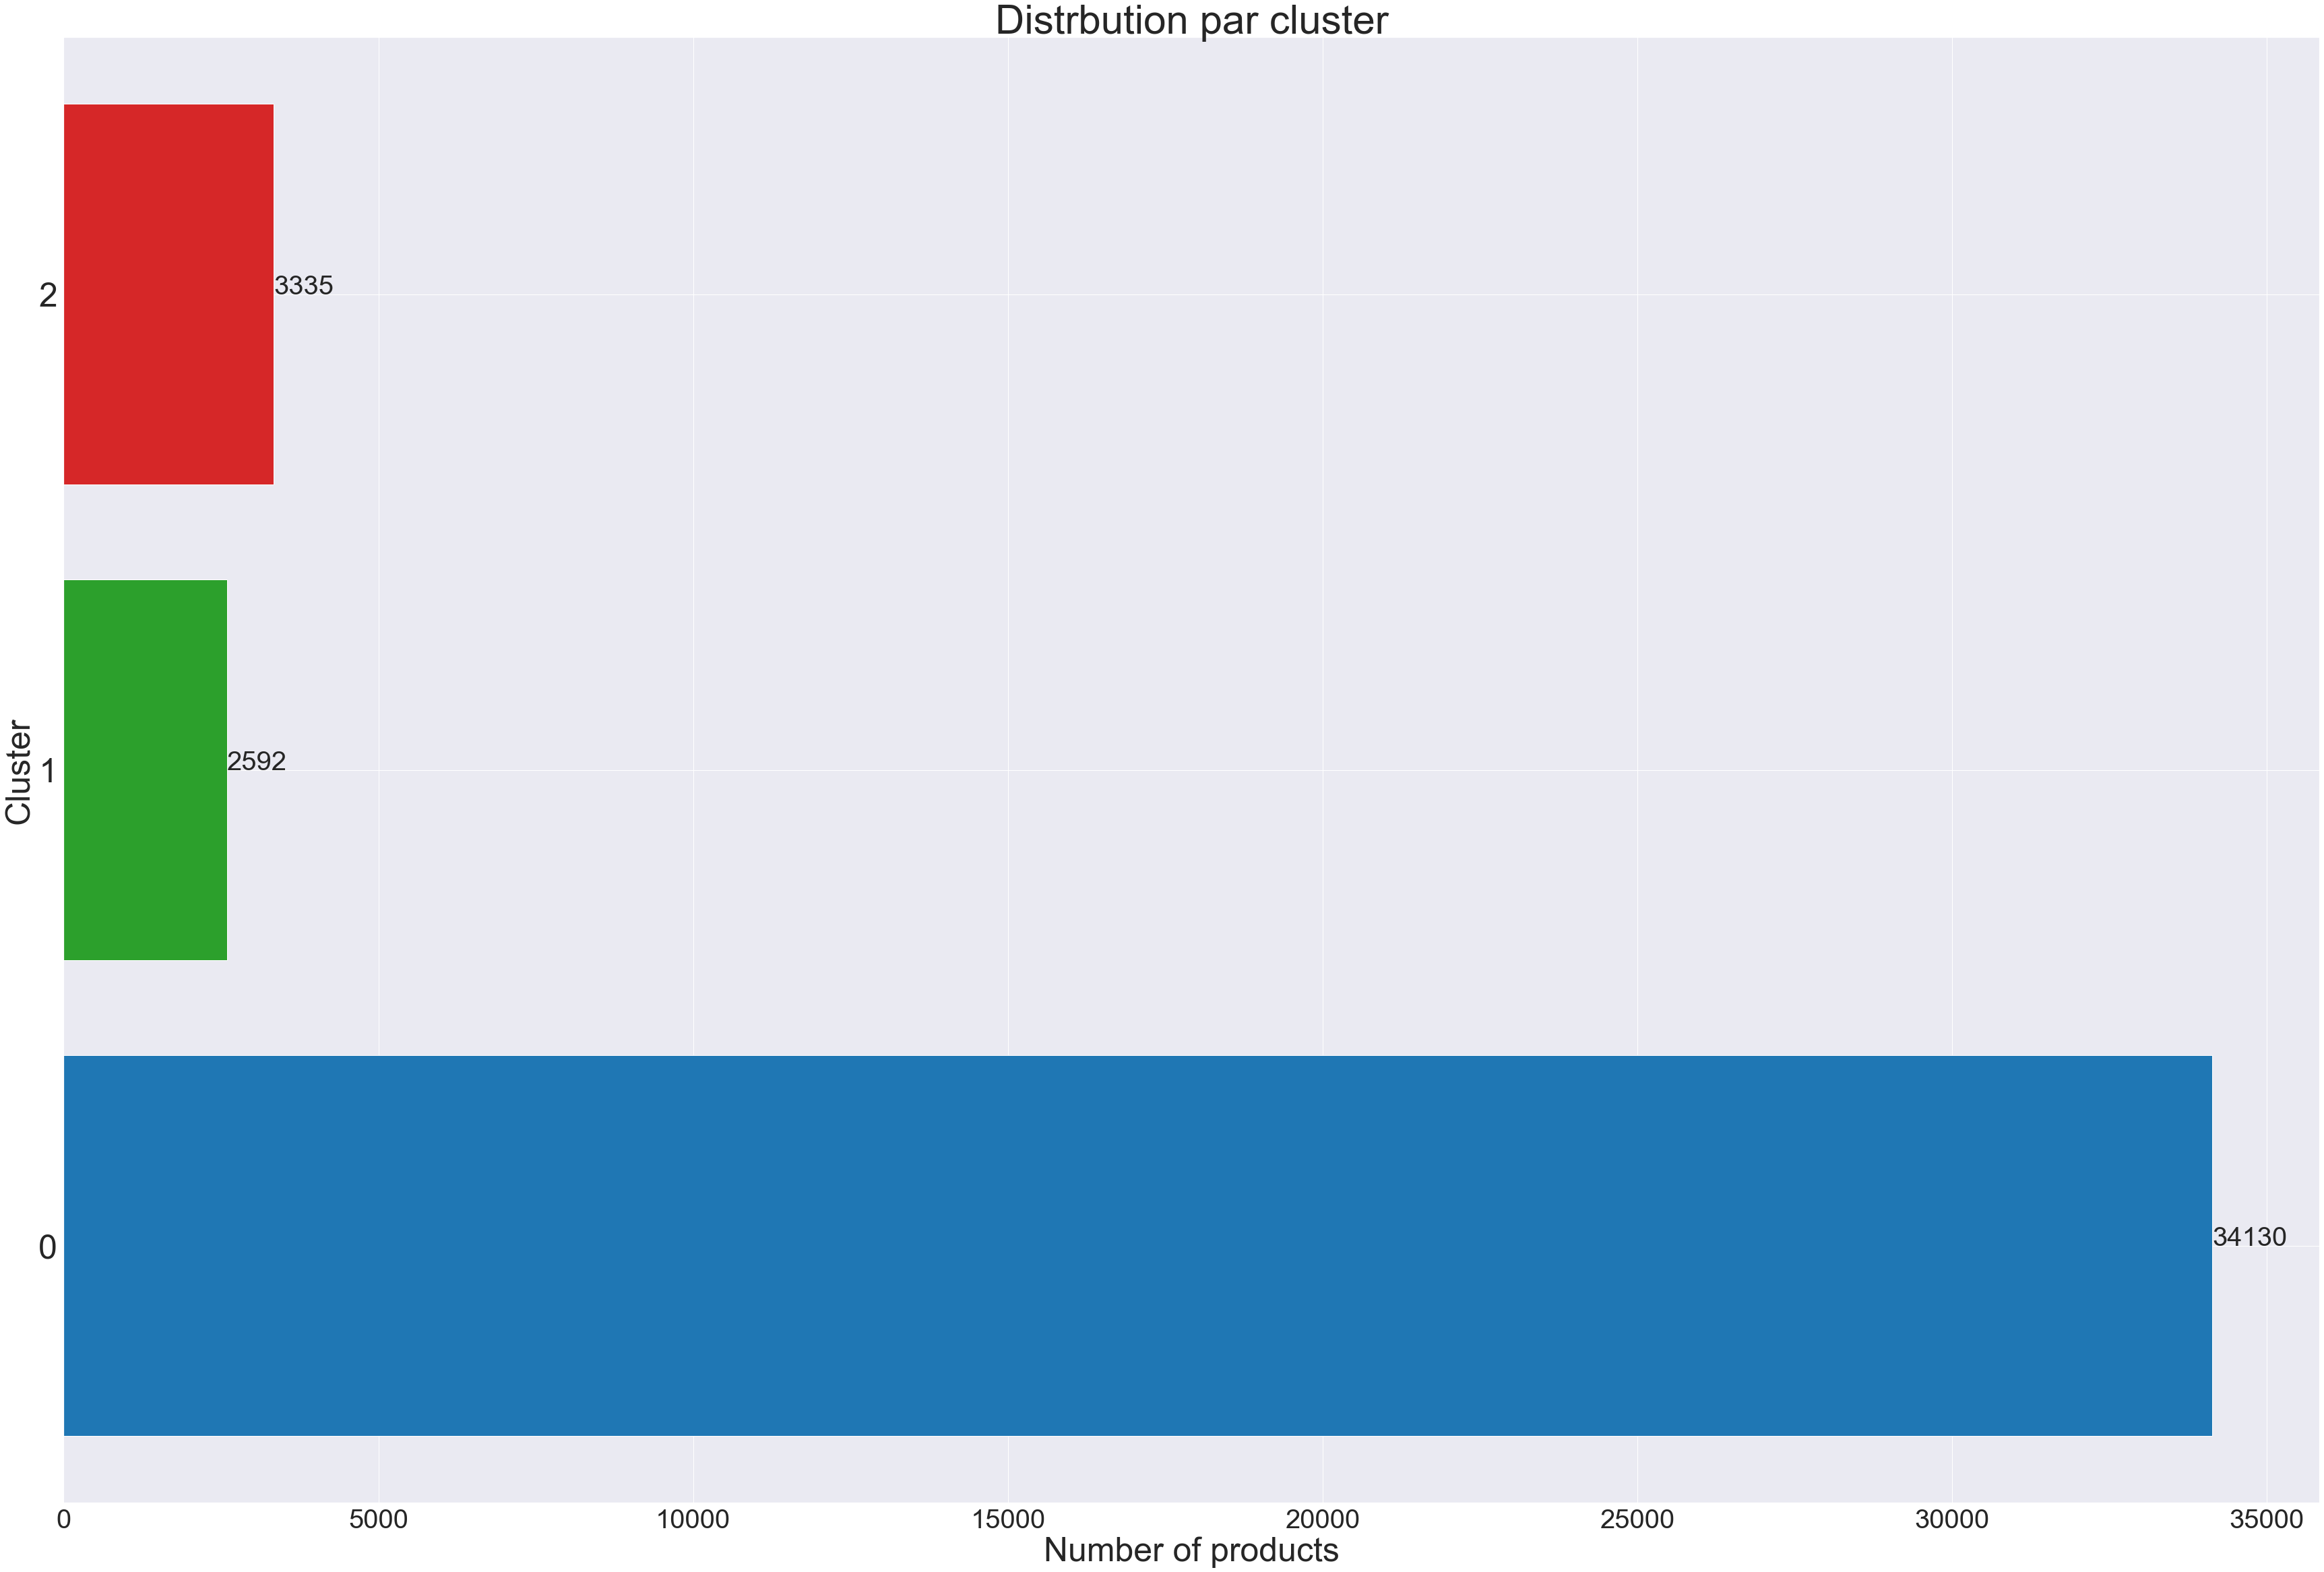

In [71]:
plt.figure(figsize=(60,40))
y=[len(cluster0.index),len(cluster1.index),len(cluster2.index)]

plt.barh(['0','1','2'],y, color=['tab:blue', 'tab:green', 'tab:red'])
for index, value in enumerate(y): 
    plt.text(value, index, str(value), size=40) 

plt.title('Distrbution par cluster', size=60)
plt.ylabel('Cluster', size=50)
plt.xlabel('Number of products', size=50)
plt.yticks(size=50)
plt.xticks(size=40)
plt.show()


In [ ]:
##Notez que nos trois clusters on suffisamment d'éléments pour être considérés.

##Fin de la vérification.

No handles with labels found to put in legend.


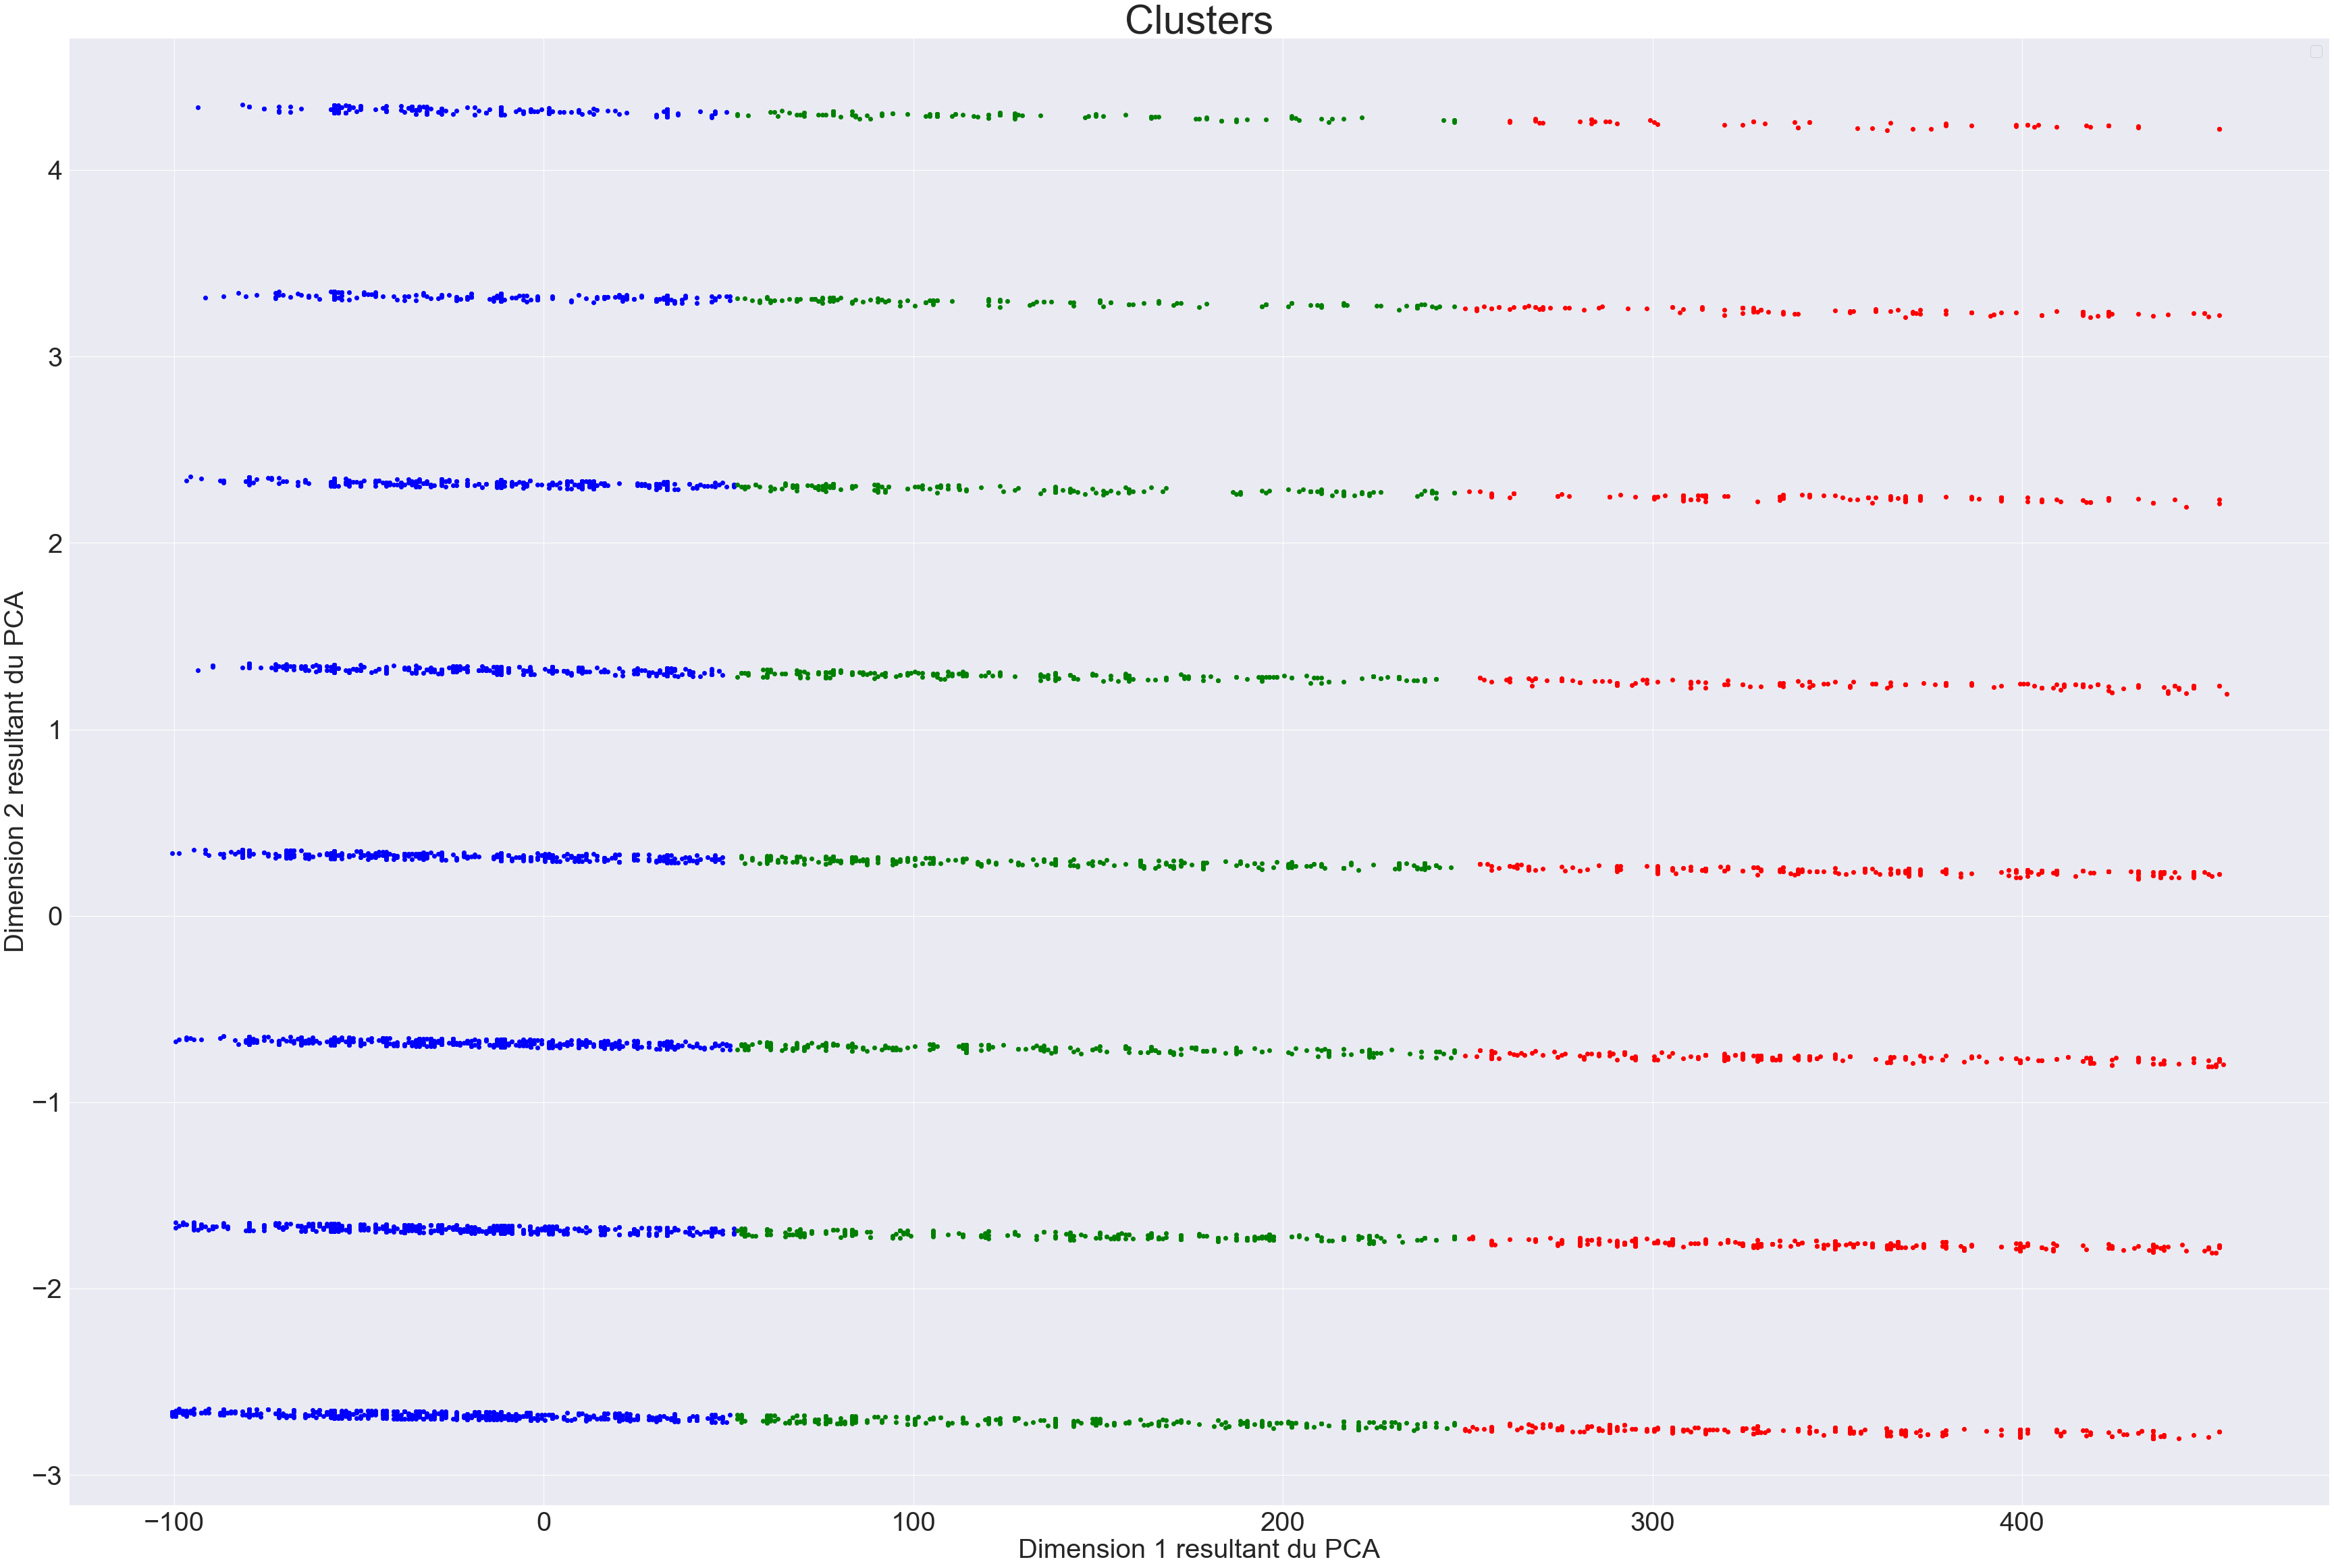

In [72]:
plt.figure(figsize=(60,40))
plt.scatter(cluster0[0] , cluster0[1] , color = 'blue')
plt.scatter(cluster1[0] , cluster1[1] , color = 'red')
plt.scatter(cluster2[0] , cluster2[1] , color = 'green')
plt.xlabel('Dimension 1 resultant du PCA', size=40)
plt.ylabel('Dimension 2 resultant du PCA', size=40)
plt.title('Clusters', size=60)
plt.yticks(size=40)
plt.xticks(size=40)

plt.legend()
plt.show()

In [ ]:
#Notez que nos trois gros clusters son bien séparés entre eux et donc indépendants.
#Notez en observant ce graphique de points que naturellement au sein de chaque cluster il y 8 "sous clusters". 
#En fait le k-Means se base dans des mesures de "distances" du coup il est normal que il y ait des distances similaires
#entre une bonne dimension 1 et une mauvaise dimension 2, entre une mauvaise dimension 1 et une bonne dimension 2, ou
#entre deux bonnes ou deux mauvaises dimension 1 et 2. 
#Ce n'est donc pas illustratif pour notre objectif.

In [ ]:
##FIN ATTENTION NO GO.

In [ ]:
#--------        

In [ ]:
#Notre objectif est d'identifier la qualité d'un produit en impacte nutritif ('nutriscore_grade_Total' et 
#'additives_Total') et écologique ('Final-carbon-footprint').
#Plus on a d'additifs, plus c'est mauvais. 
#Plus le nutriscore est grand, plus c'est mauvais.
#Plus le 'Final-carbon-footprint' est grand moins c'est écologique.

#Le nutriscore est en quelque sorte regroupé. On va faire des regroupements dans les variables 'Final-carbon-footprint'
#et 'additives_Total' en utilisant la méthode k-Means pour donner des points à chaque groupe (sachant que le plus de
#points c'est le plus mauvais).

In [ ]:
#D.5 Clustérisation de la variable 'additives_Total' (k-Means avec Elbow method):

In [73]:
additives=data_sn[['additives_Total']]

In [74]:
sse_additives = []
K=range(1, 11)
for k in K:
 kmeans = KMeans(n_clusters=k)
 kmeans.fit(additives)
 sse_additives.append(kmeans.inertia_)

C:\Users\'titite\AppData\Local\Temp/ipykernel_26608/3551884517.py:5: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(additives)
C:\Users\'titite\AppData\Local\Temp/ipykernel_26608/3551884517.py:5: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(additives)


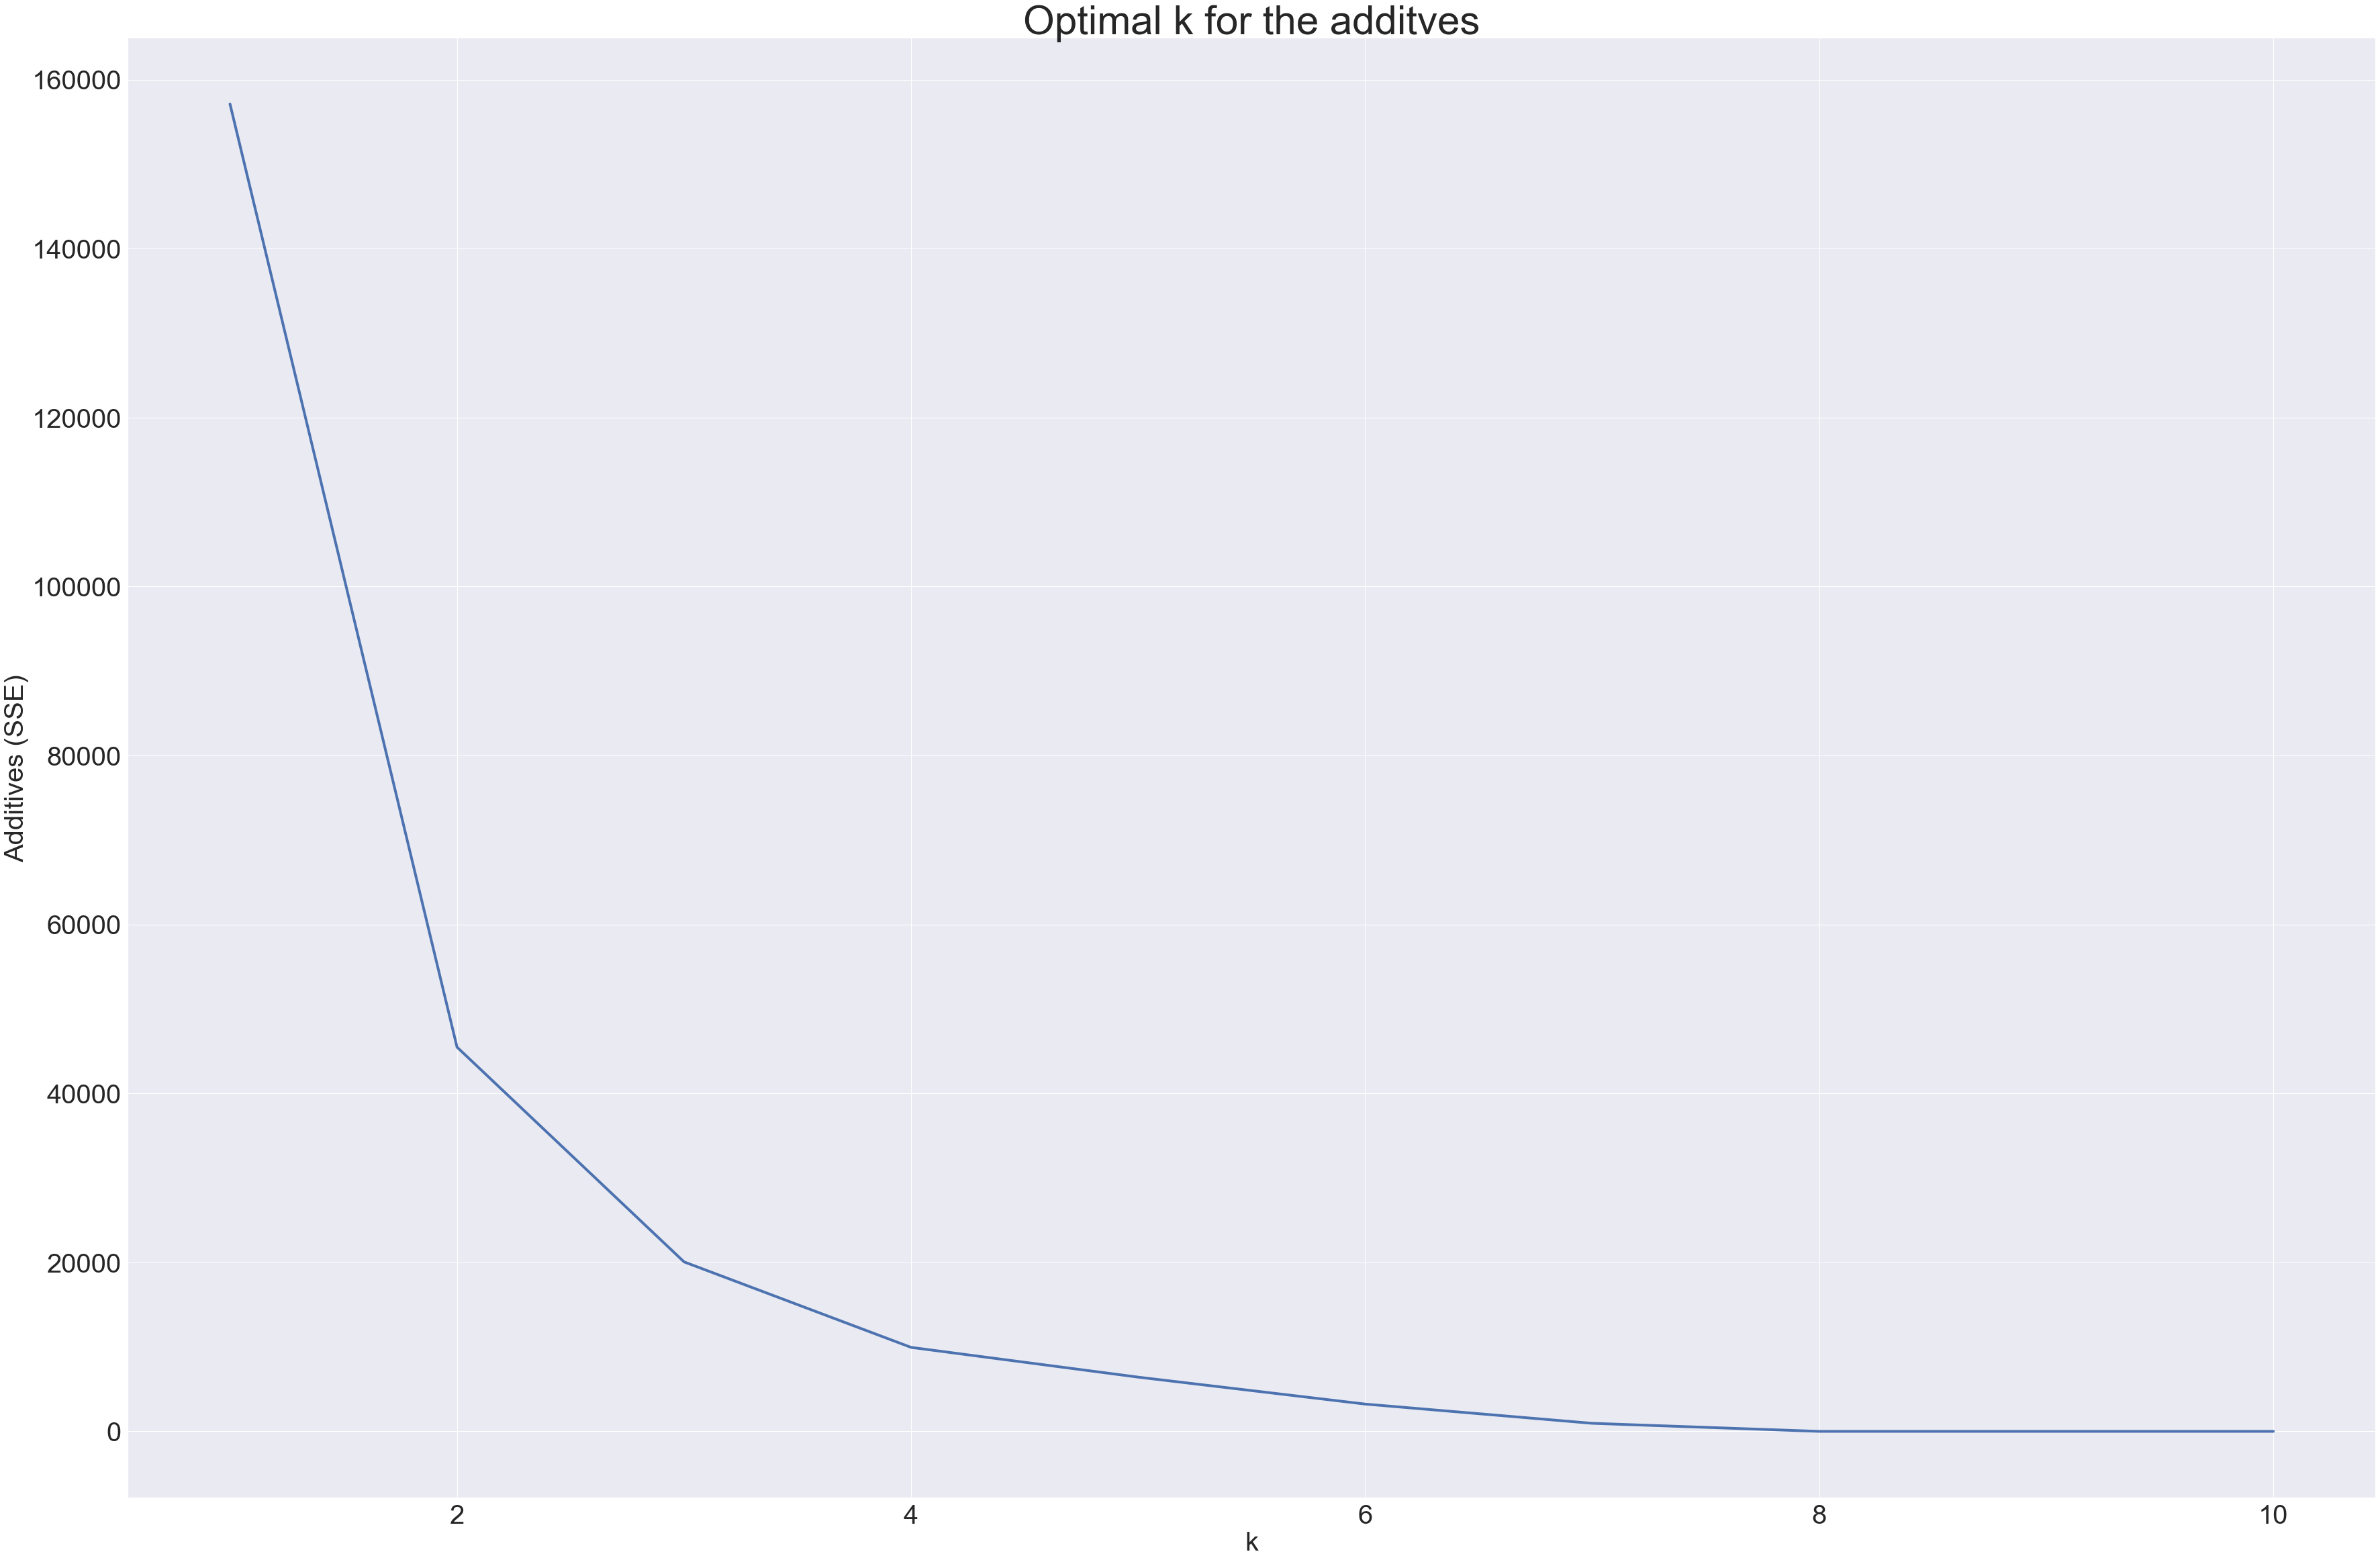

In [75]:
plt.figure(figsize=(60,40)) 
plt.plot(K, sse_additives, linewidth=4) 
plt.xlabel('k', size=40) 
plt.ylabel('Additives (SSE)', size=40) 
plt.title('Optimal k for the additves', size=60) 
plt.yticks(size=40)
plt.xticks(size=40)
plt.show()

In [ ]:
#Le Elbow est 3, on fera donc 3 clusters. 
#Note: SSE:= Sum of Squared Error.

In [76]:
additives=pd.DataFrame(additives)

In [ ]:
#ATTENTION: On lance une première fois le KMeans, pour trouver les centroids et après les fixer. 
#Le but c'est d'avoir toujours les mêmes valeurs quand on lance le code. Si on ne fait pas ceci le KMeans prend des
#centroids de façon random et donne donc des résultats différents à chaque fois. 

##D.5.1 1ere fois KMean pour obtention des centroids:

In [ ]:
#kmeans= KMeans(n_clusters=3, precompute_distances="auto")
#label2=kmeans.fit_predict(additives)

In [ ]:
#centroids2=kmeans.cluster_centers_

In [ ]:
#centroids2

In [ ]:
#D.5.2 2ème fois KMeans en fixant les centroids:
#(C'est l'array de 'centroids2' celui qu'on met dans 'startpts2').

In [77]:
startpts2=np.array([[1.49466918],[6.08860467],[3.43576316]], np.float64)

In [78]:
additives['additives_clusters'] = KMeans(n_clusters=3, init=startpts2, n_init=1).fit_predict(additives)

In [ ]:
##Vérification.

In [79]:
additives.head(5)

additives_Total  additives_clusters
11              3.0                   2
35              4.0                   2
49              3.0                   2
64              5.0                   1
65              6.0                   1

In [80]:
additives.describe()

additives_Total  additives_clusters
count     40057.000000        40057.000000
mean          3.677185            1.039094
std           1.980600            0.821264
min           1.000000            0.000000
25%           2.000000            0.000000
50%           3.000000            1.000000
75%           5.000000            2.000000
max           8.000000            2.000000

In [ ]:
#Distribution des produits par cluster:

In [81]:
additives_clus0 = additives[additives['additives_clusters'] == 0]

In [82]:
additives_clus1 = additives[additives['additives_clusters'] == 1]

In [83]:
additives_clus2 = additives[additives['additives_clusters'] == 2]

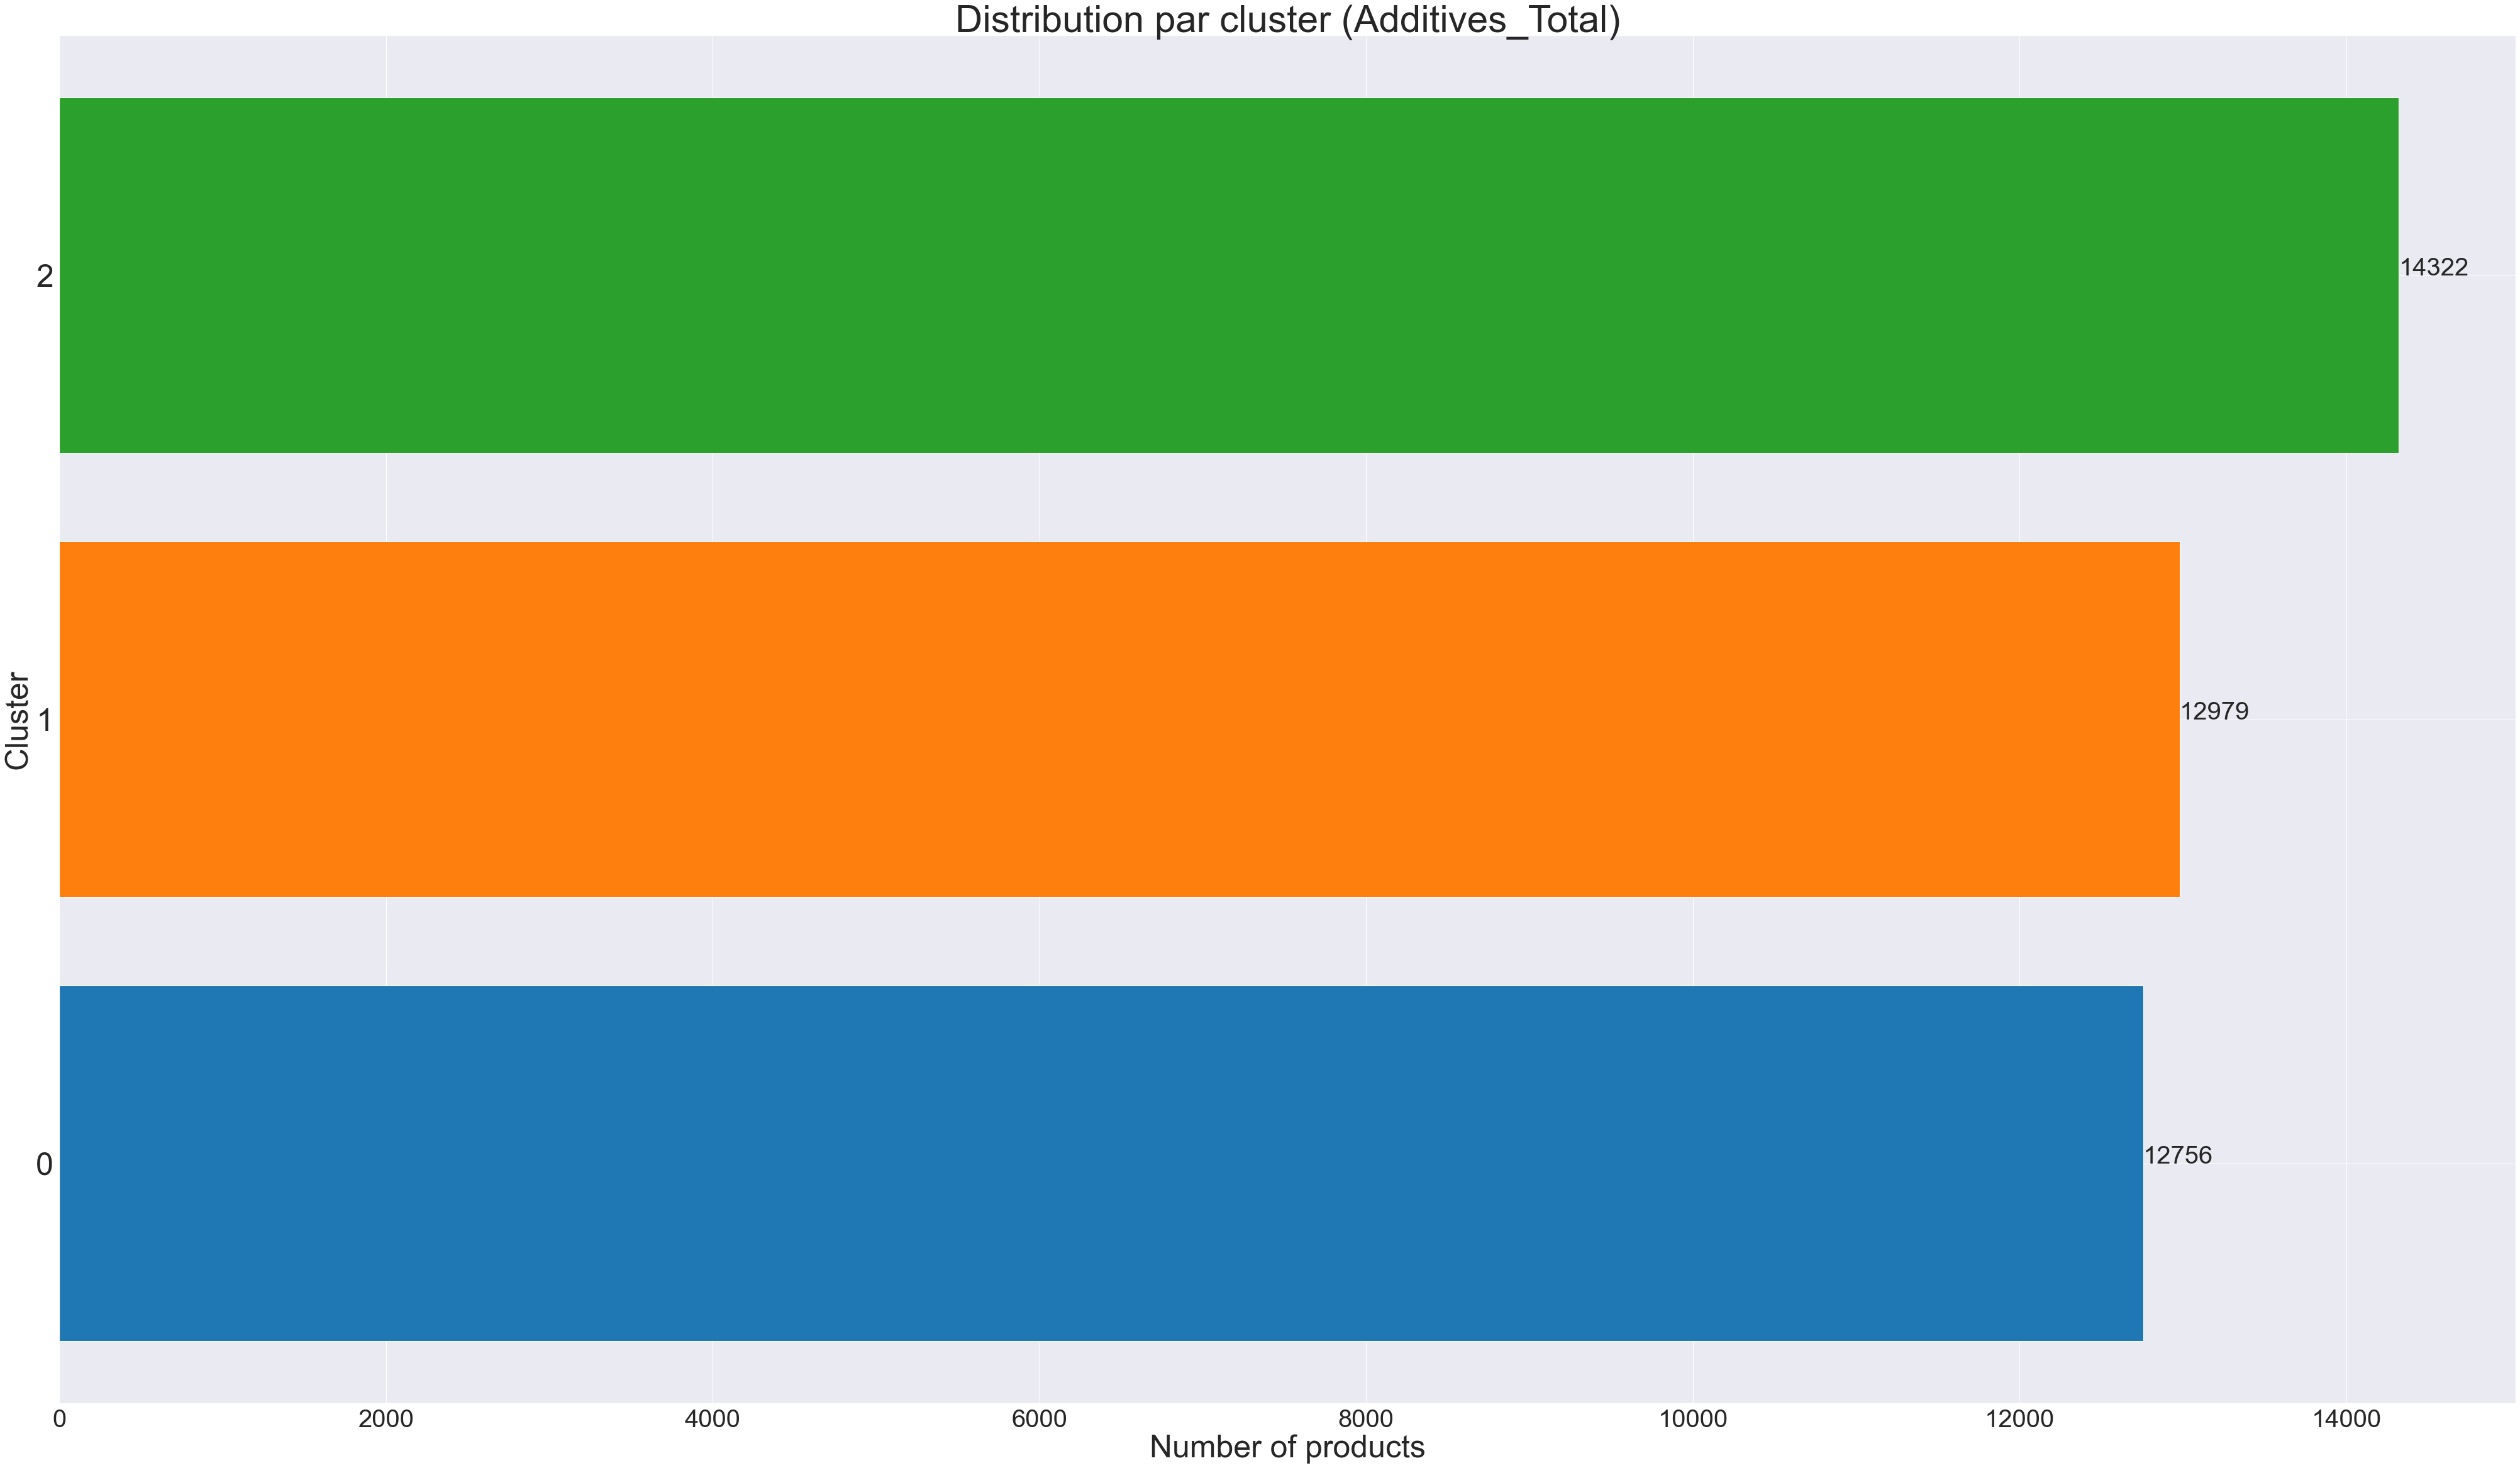

In [84]:
plt.figure(figsize=(70,40))
y=[len(additives_clus0.index),len(additives_clus1.index),len(additives_clus2.index)]

plt.barh(['0','1','2'],y, color=['tab:blue', 'tab:orange', 'tab:green'])
for index, value in enumerate(y): 
    plt.text(value, index, str(value), size=40) 

plt.title('Distribution par cluster (Additives_Total)', size=60)
plt.ylabel('Cluster', size=50)
plt.xlabel('Number of products', size=50)
plt.yticks(size=50)
plt.xticks(size=40)
plt.show()


In [ ]:
#Les clusters ont un nombre considérable d'éléments.

##Fin vérification.

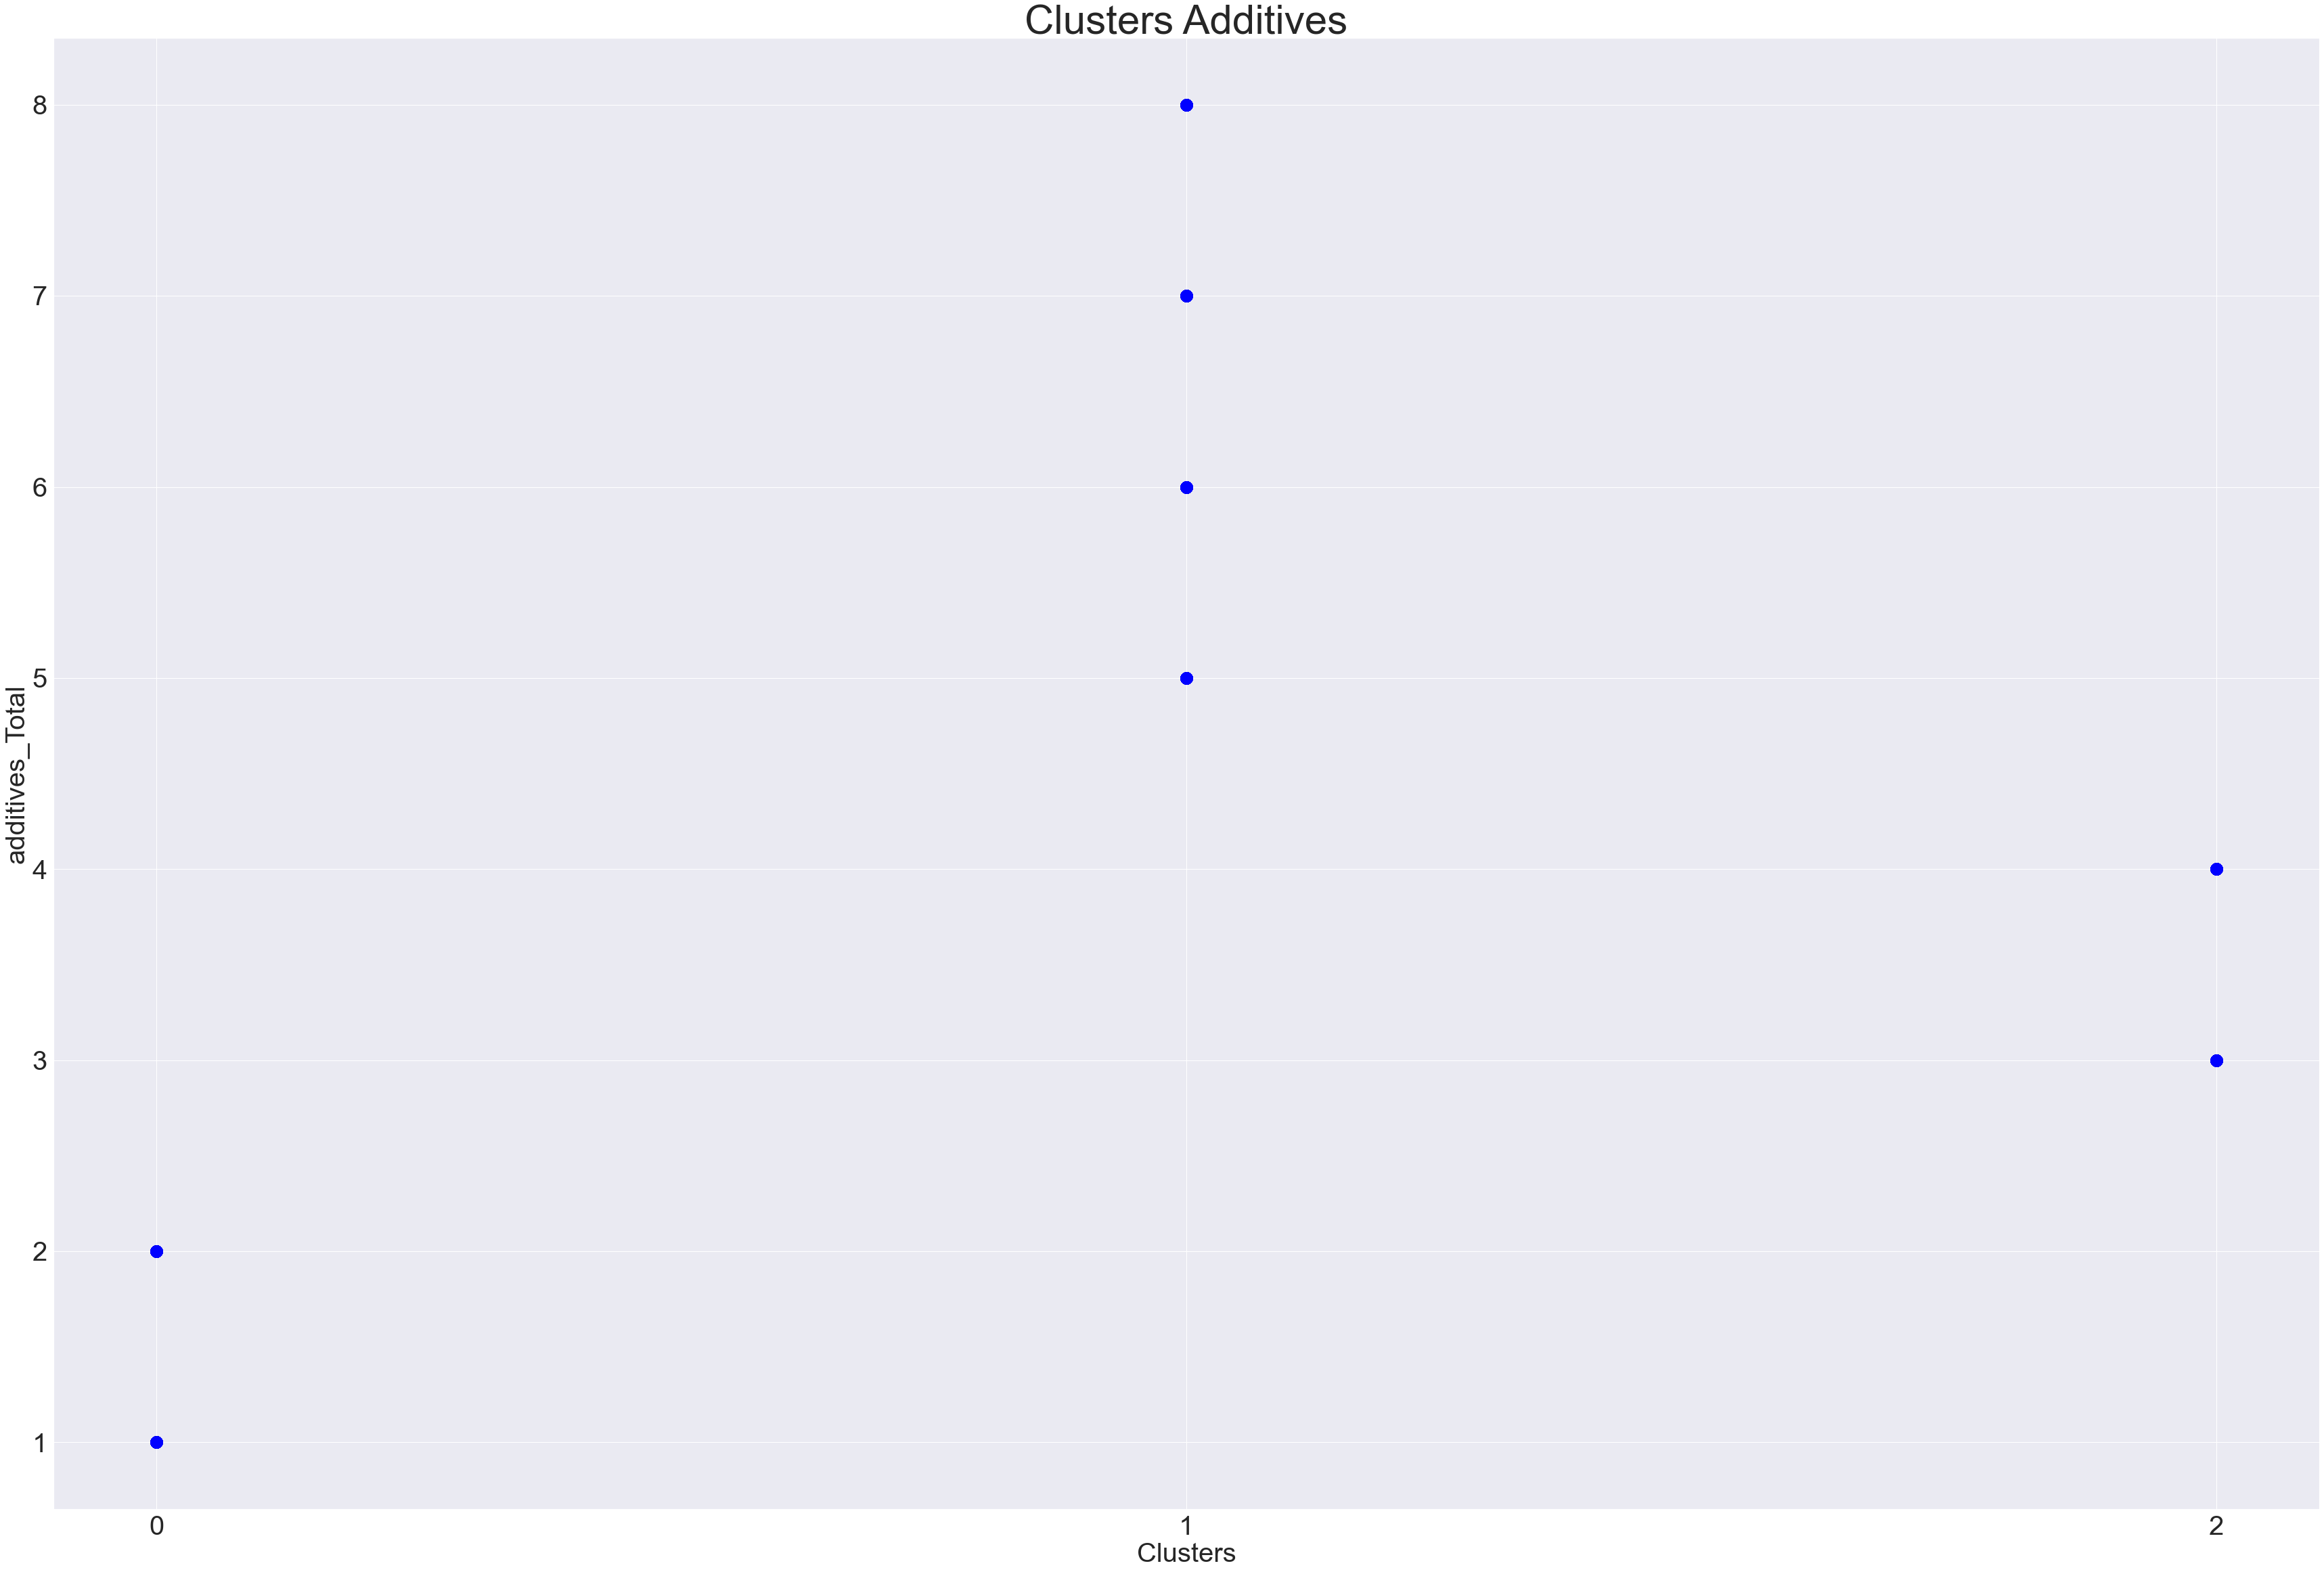

In [85]:
plt.figure(figsize=(60,40))

plt.scatter(additives['additives_clusters'] , additives['additives_Total'] , color = 'blue', s=300)
plt.xlabel('Clusters', size=40)
plt.ylabel('additives_Total', size=40)
plt.title('Clusters Additives', size=60)
plt.yticks(size=40)
plt.xticks(size=40)
plt.xticks([0,1,2])
plt.show()

In [ ]:
#Le nombre d'additifs est toujours un nombre entier, qui en enlevant les outliers est compris ente 1 et 8.
#On distingue 3 clusters: 
#-  Cluster 0 --> 1 point;
#-  Cluster 2 --> 2 points;
#-  Cluster 1 --> 3 points.

#On suis le principe du 'nutriscore': plus on a de points plus on est mauvais. 

In [86]:
additives['additives_Score']= [1 if var==0 else 2 if var==2 else 3 for var in additives['additives_clusters']]

In [ ]:
##Vérification.

In [87]:
additives.head(5)

additives_Total  additives_clusters  additives_Score
11              3.0                   2                2
35              4.0                   2                2
49              3.0                   2                2
64              5.0                   1                3
65              6.0                   1                3

In [ ]:
#Fin vérification.

#-------

In [ ]:
#D.6. Merge de la variable 'nutriscore_grade_Total':

In [88]:
df4=pd.concat([df3.loc[:,['code', 'nutriscore_grade_Total']], additives], axis=1)
df4_sn=df4.dropna(subset=['additives_Total'])

In [ ]:
#Note:Comme on a concaténé les lignes liées aux outliers des variables 'Final-carbon-footprint' et 
#'additives_total' présentent dans les colonnes respectives des 'NaN', il faut donc éliminer ces lignes avec des 'NaN' 
#avant de lancer le PCA et le k-Means.

In [89]:
df4_sn['Sain_sum']=df4_sn['nutriscore_grade_Total']+df4_sn['additives_Score']

C:\Users\'titite\AppData\Local\Temp/ipykernel_26608/4134390046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_sn['Sain_sum']=df4_sn['nutriscore_grade_Total']+df4_sn['additives_Score']


In [90]:
df4_sn=df4_sn.drop(['additives_Total','additives_clusters'], axis=1)

In [ ]:
##Vérification.

In [91]:
df4_sn.head(5)

code  nutriscore_grade_Total  additives_Score  Sain_sum
11  0000000005470                       1              2.0       3.0
35  0000000491228                       2              2.0       4.0
49  0000007730009                       5              2.0       7.0
64  0000010206515                       4              3.0       7.0
65  0000010216477                       4              3.0       7.0

In [ ]:
##Fin vérification

In [92]:
Sain_sum=df4_sn.drop(['nutriscore_grade_Total','additives_Score'], axis=1)

In [93]:
Sain_sum.head(5)

code  Sain_sum
11  0000000005470       3.0
35  0000000491228       4.0
49  0000007730009       7.0
64  0000010206515       7.0
65  0000010216477       7.0

In [ ]:
#-------

In [ ]:
## D.7 PCA pour réduire les 2 variables 'nutriscore_grade_Total' et 'additives_Score' en 1 seule:

#En fait les deux variable on un impact sur l'aspect 'à quel point un produit est-il sain: Le plus petit 
#nutriscore_grade et le plus petit additives_Score (ie. le moins d'additives présents), le mieux c'est pour la santé.
#Grace à PCA on peu donc réduire ces deux variables en une seule qui traduise cette information.

#Note: Oui on a vu qu'il y avait une dépendance subtile entre ces deux variables, mais n'étant aps linéaire, à dire 
#d'expert on peut se permettre de suivre cette procédure.

In [94]:
Sain=ColumnTransformer([('preserve', 'passthrough', ['code']),('pca', PCA(1), ['nutriscore_grade_Total', 'additives_Score']) ]).fit_transform(df4_sn)

In [ ]:
##Vérification.

In [ ]:
#Sain.shape

In [95]:
Sain=pd.DataFrame(Sain)

In [96]:
Sain.head(5)

0         1
0  0000000005470  2.864114
1  0000000491228  1.864243
2  0000007730009 -1.135372
3  0000010206515 -0.151532
4  0000010216477 -0.151532

In [97]:
Sain.describe()

0             1
count           40057  40057.000000
unique          40057     17.000000
top     0000000005470     -0.151532
freq                1   5374.000000

In [ ]:
##Fin vérification.

In [ ]:
#On change le nom de la nouvelle variable (ie. de la nouvelle colonne), par "Sain".
#(Ceci car cette colonne en gros représente "combien sain est un produit").

In [98]:
Sain.rename(columns={0:'code',  1:'Sain'}, inplace=True)

In [ ]:
##Vérification

In [99]:
Sain.head(5)

code      Sain
0  0000000005470  2.864114
1  0000000491228  1.864243
2  0000007730009 -1.135372
3  0000010206515 -0.151532
4  0000010216477 -0.151532

In [ ]:
##Fin vérification

#------

In [ ]:
#D.8 Clustérisation de la nouvelle variable 'Sain' (méthode k-Means avec Elbow):

In [100]:
Sain_1=Sain.drop(['code'], axis=1)

In [ ]:
##Vérification.

In [101]:
Sain_1.head(5)

Sain
0  2.864114
1  1.864243
2 -1.135372
3 -0.151532
4 -0.151532

In [ ]:
##Fin vérification.

In [102]:
sse_Sain = []
K=range(1, 11)
for k in K:
 kmeans = KMeans(n_clusters=k)
 kmeans.fit(Sain_1)
 sse_Sain.append(kmeans.inertia_)

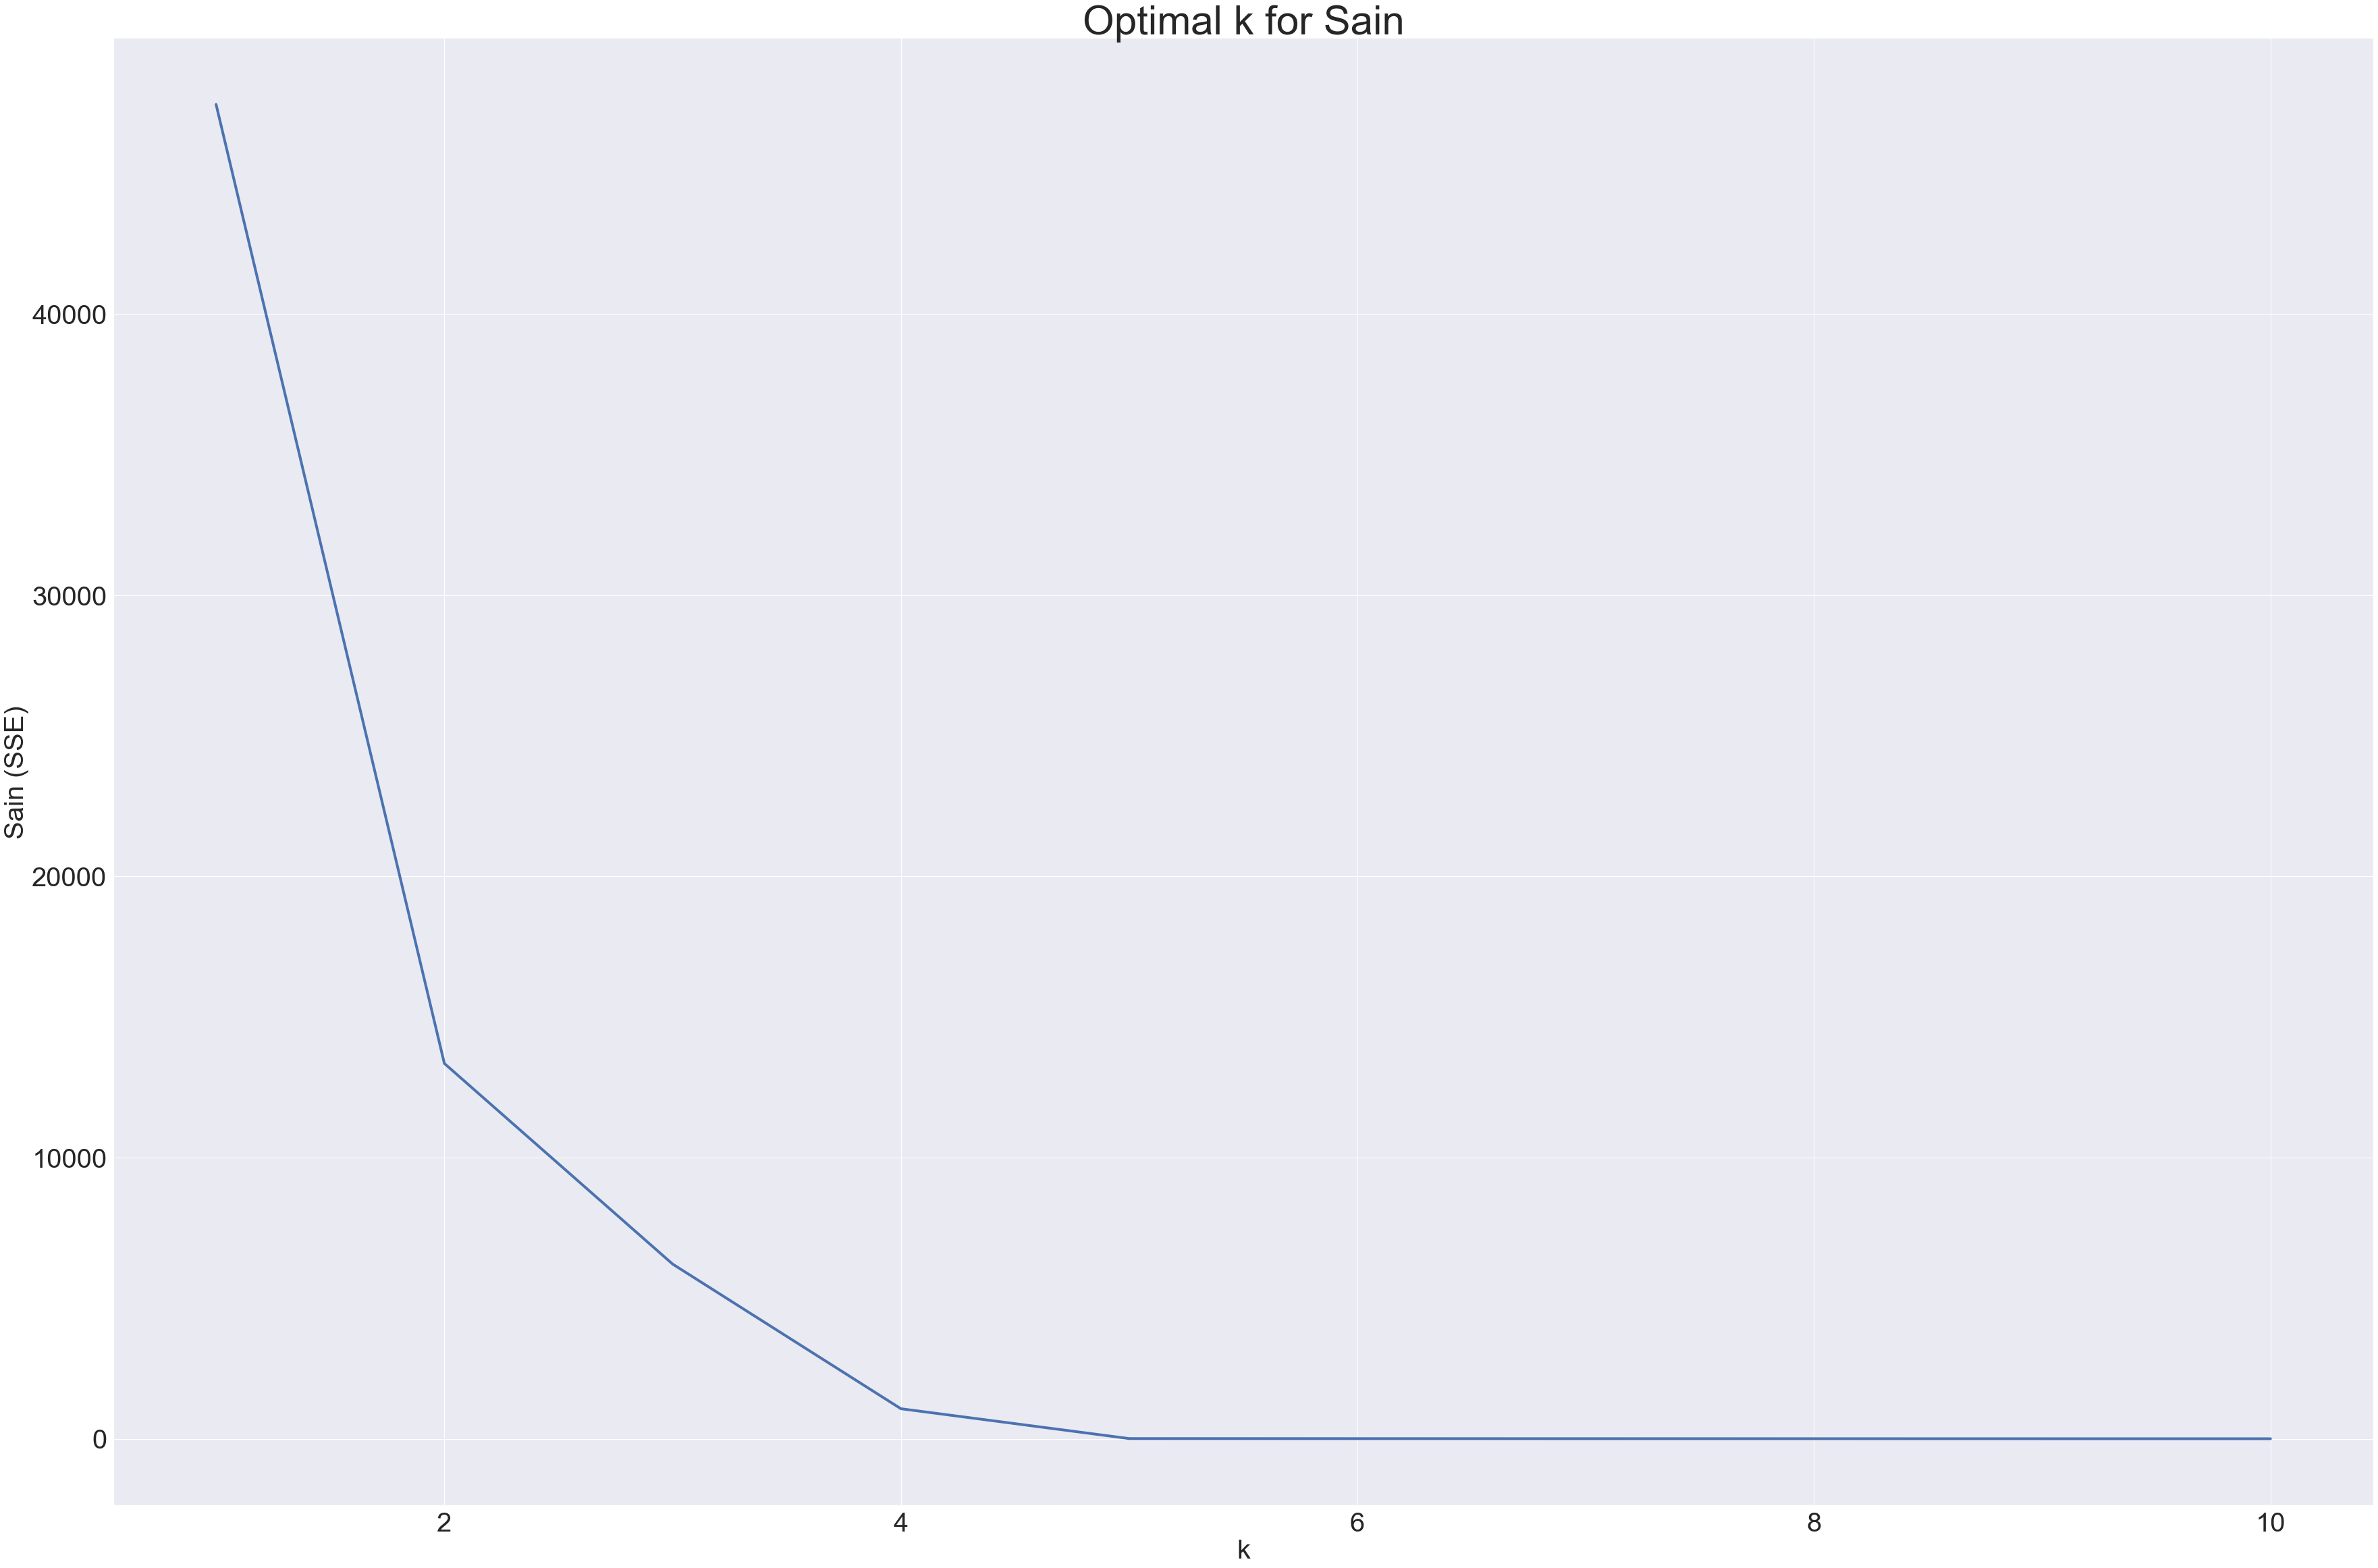

In [103]:
plt.figure(figsize=(60,40)) 
plt.plot(K, sse_Sain, linewidth=4) 
plt.xlabel('k', size=40) 
plt.ylabel('Sain (SSE)', size=40) 
plt.title('Optimal k for Sain', size=60) 
plt.yticks(size=40)
plt.xticks(size=40)
plt.show()

In [ ]:
#Le Elbow est 3, on fera donc 3 clusters. 
#Note: SSE:= Sum of Squared Error.

In [104]:
Sain=pd.DataFrame(Sain)

In [ ]:
#ATTENTION: On lance une première fois le KMeans, pour trouver les centroids et après les fixer. 
#Le but c'est d'avoir toujours les mêmes valeurs quand on lance le code. Si on ne fait pas ceci le KMeans prend des
#centroids de façon random et donne donc des résultats différents à chaque fois. 

##D.8.1 1ere fois KMean pour obtention des centroids:

In [ ]:
#kmeans= KMeans(n_clusters=3, precompute_distances="auto")
#label3=kmeans.fit_predict(Sain_1)

In [ ]:
#centroids3=kmeans.cluster_centers_

In [ ]:
#centroids3

In [ ]:
#D.8.2 2ème fois KMeans en fixant les centroids:
#(C'est l'array de 'centroids3' celui qu'on met dans 'startpts3').

In [105]:
startpts3=np.array([[-1.13367243],[ 2.23625057],[ 0.23067706]], np.float64)

In [106]:
Sain['Sain_clusters'] = KMeans(n_clusters=3, init=startpts3, n_init=1).fit_predict(Sain_1)

In [ ]:
##Vérification.

In [107]:
Sain.head(5)

code      Sain  Sain_clusters
0  0000000005470  2.864114              1
1  0000000491228  1.864243              1
2  0000007730009 -1.135372              0
3  0000010206515 -0.151532              2
4  0000010216477 -0.151532              2

In [108]:
Sain.describe()

Sain_clusters
count   40057.000000
mean        1.214120
std         0.916807
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         2.000000

In [ ]:
#Distribution des produits par cluster:

In [109]:
Sain_clus0 = Sain[Sain['Sain_clusters'] == 0]

In [110]:
Sain_clus1 = Sain[Sain['Sain_clusters'] == 1]

In [111]:
Sain_clus2 = Sain[Sain['Sain_clusters'] == 2]

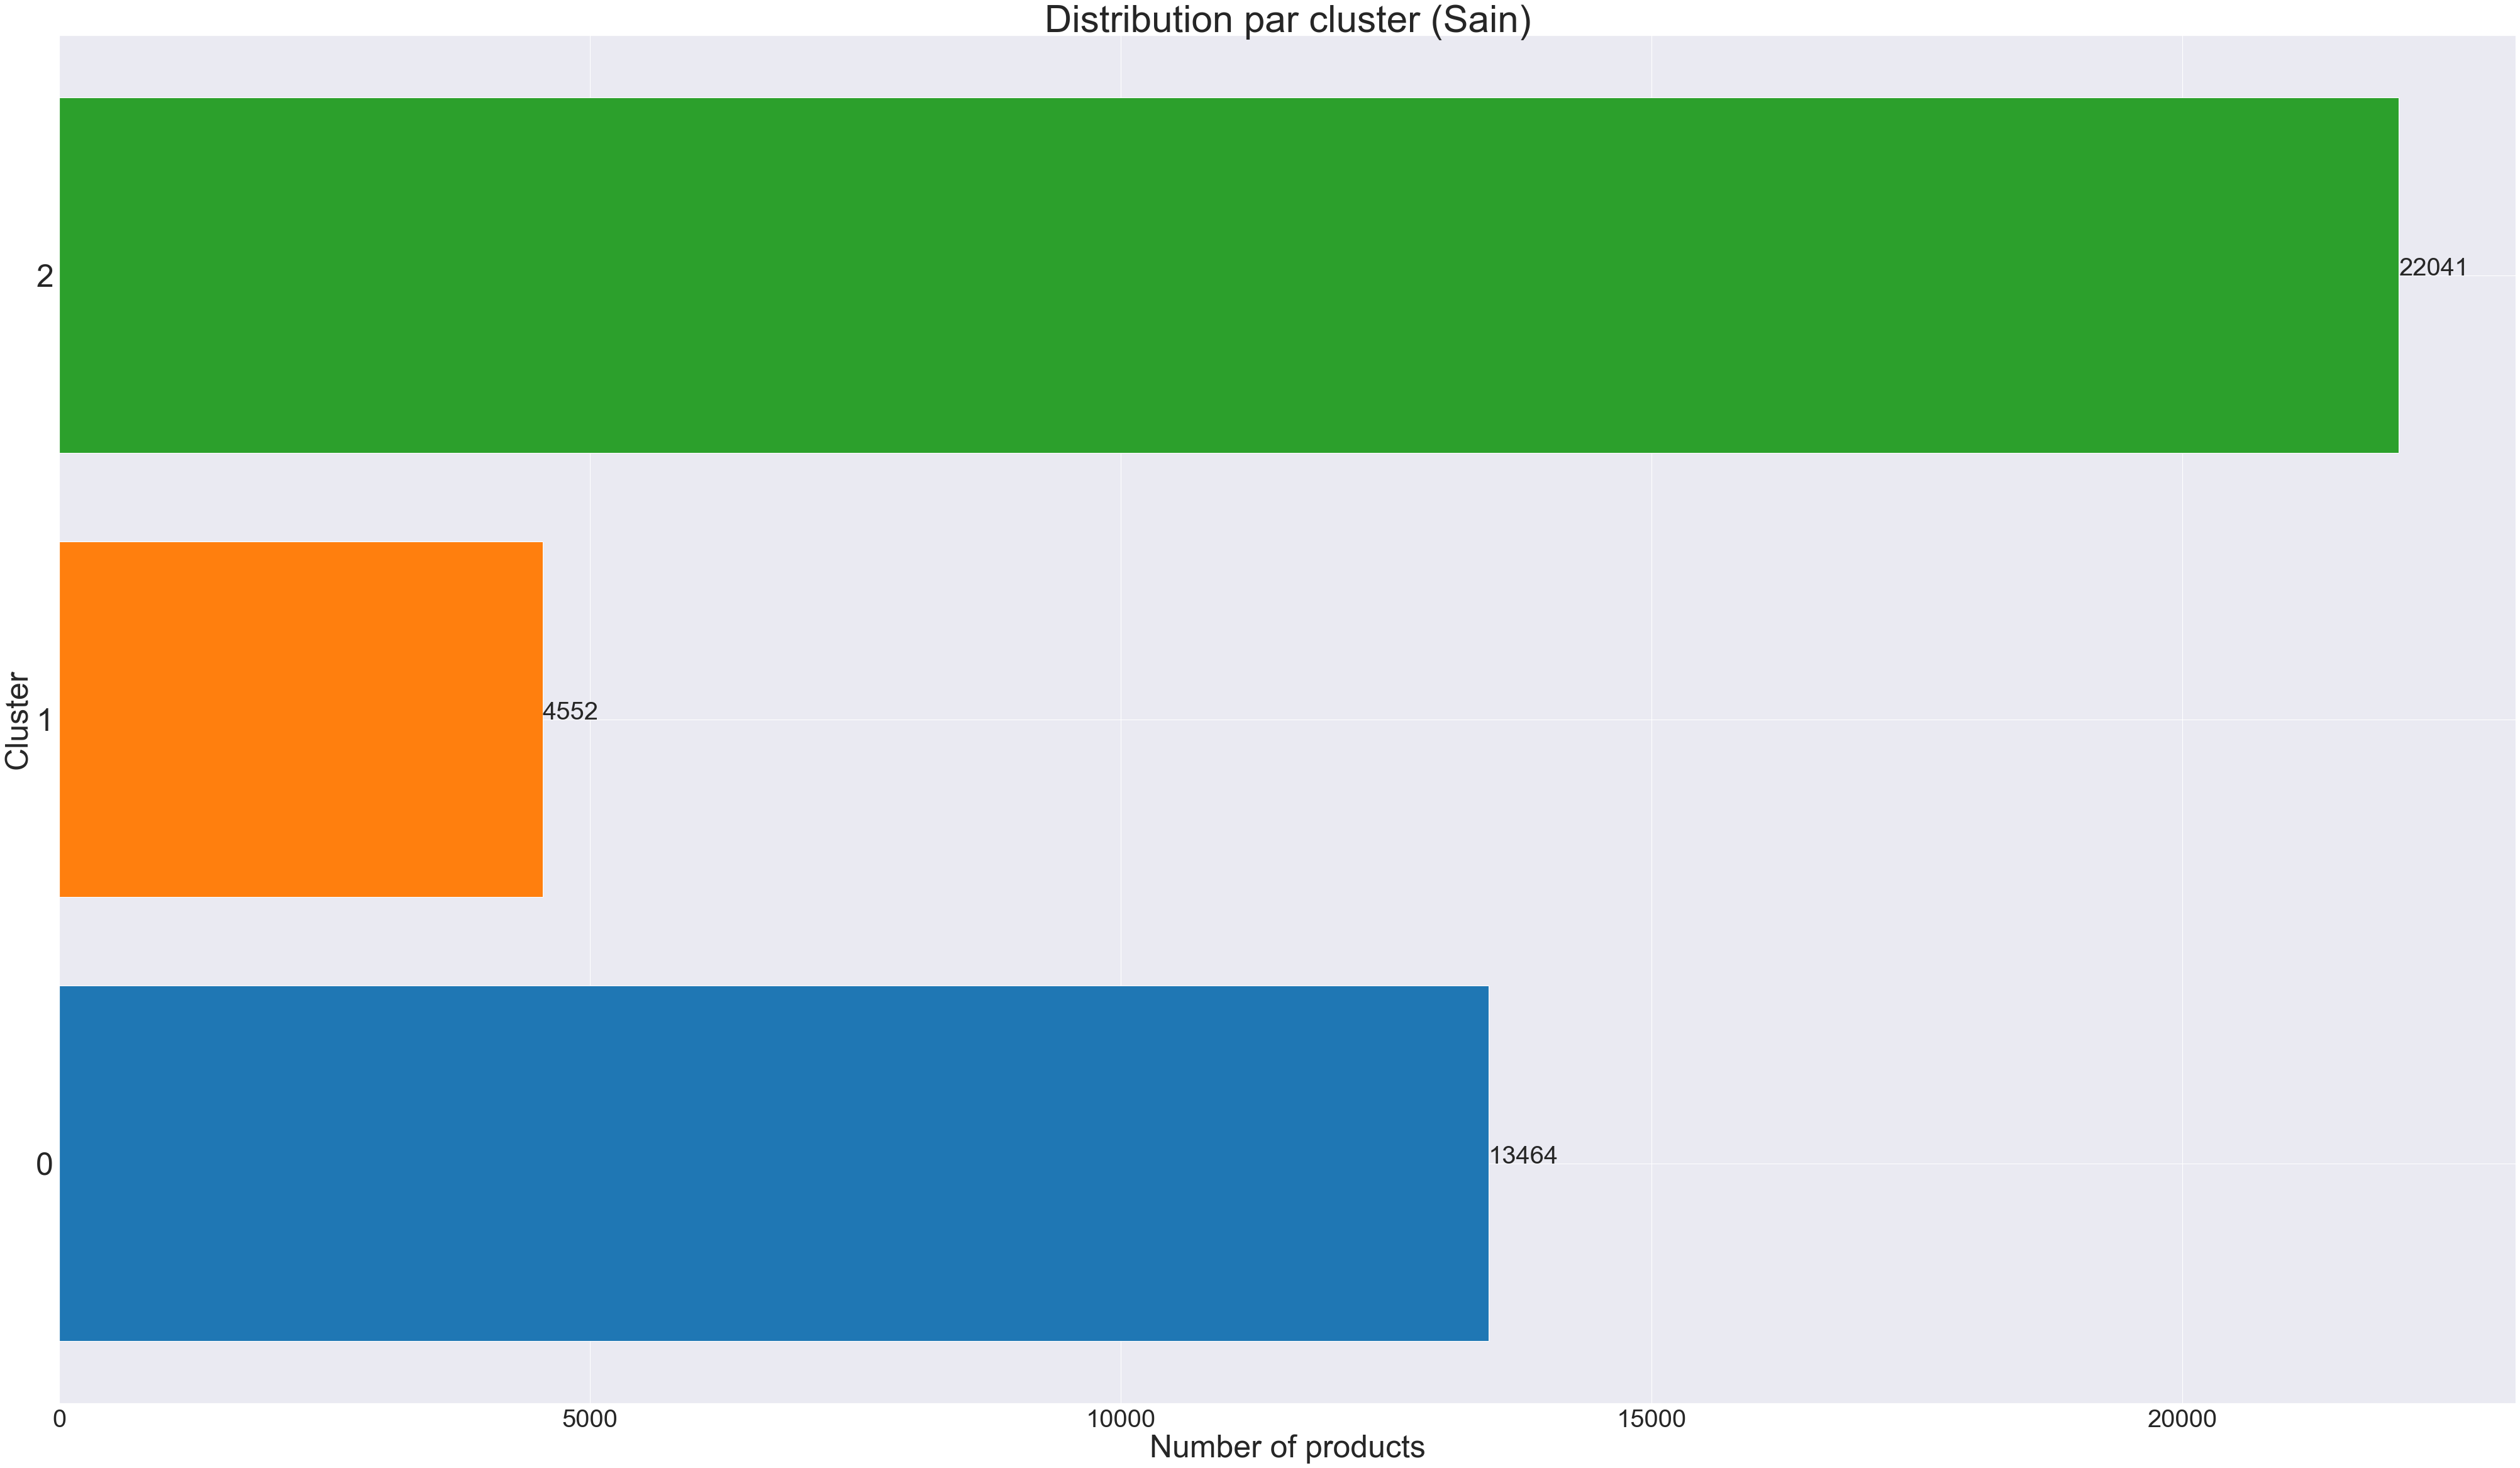

In [112]:
plt.figure(figsize=(70,40))
y=[len(Sain_clus0.index),len(Sain_clus1.index),len(Sain_clus2.index)]

plt.barh(['0','1','2'],y, color=['tab:blue', 'tab:orange', 'tab:green'])
for index, value in enumerate(y): 
    plt.text(value, index, str(value), size=40) 

plt.title('Distribution par cluster (Sain)', size=60)
plt.ylabel('Cluster', size=50)
plt.xlabel('Number of products', size=50)
plt.yticks(size=50)
plt.xticks(size=40)
plt.show()


In [ ]:
#Il y a suffisament d'éléments dans chaque cluster.
##Fin vérification.

In [ ]:
#ATTENTION: pour bien comprendre quel score on va désigné à chaque cluster il faut comprendre ce que la variable 'Sain'
#exprime. On va donc comparé les cluster obtenus sur la variable unique 'Sain' avec 'Sain_Sum' qui est la somme des 
#scores des 2 variables qui on construit la variable 'Sain'. L'objectif c'est d'identifier quel cluster représente le 
#'bon', quel le 'moyen' et quel le 'pas bon'.

In [113]:
Clus_Sain=pd.merge(Sain, Sain_sum, on='code')

In [114]:
Clus_Sain.head(5)

code      Sain  Sain_clusters  Sain_sum
0  0000000005470  2.864114              1       3.0
1  0000000491228  1.864243              1       4.0
2  0000007730009 -1.135372              0       7.0
3  0000010206515 -0.151532              2       7.0
4  0000010216477 -0.151532              2       7.0

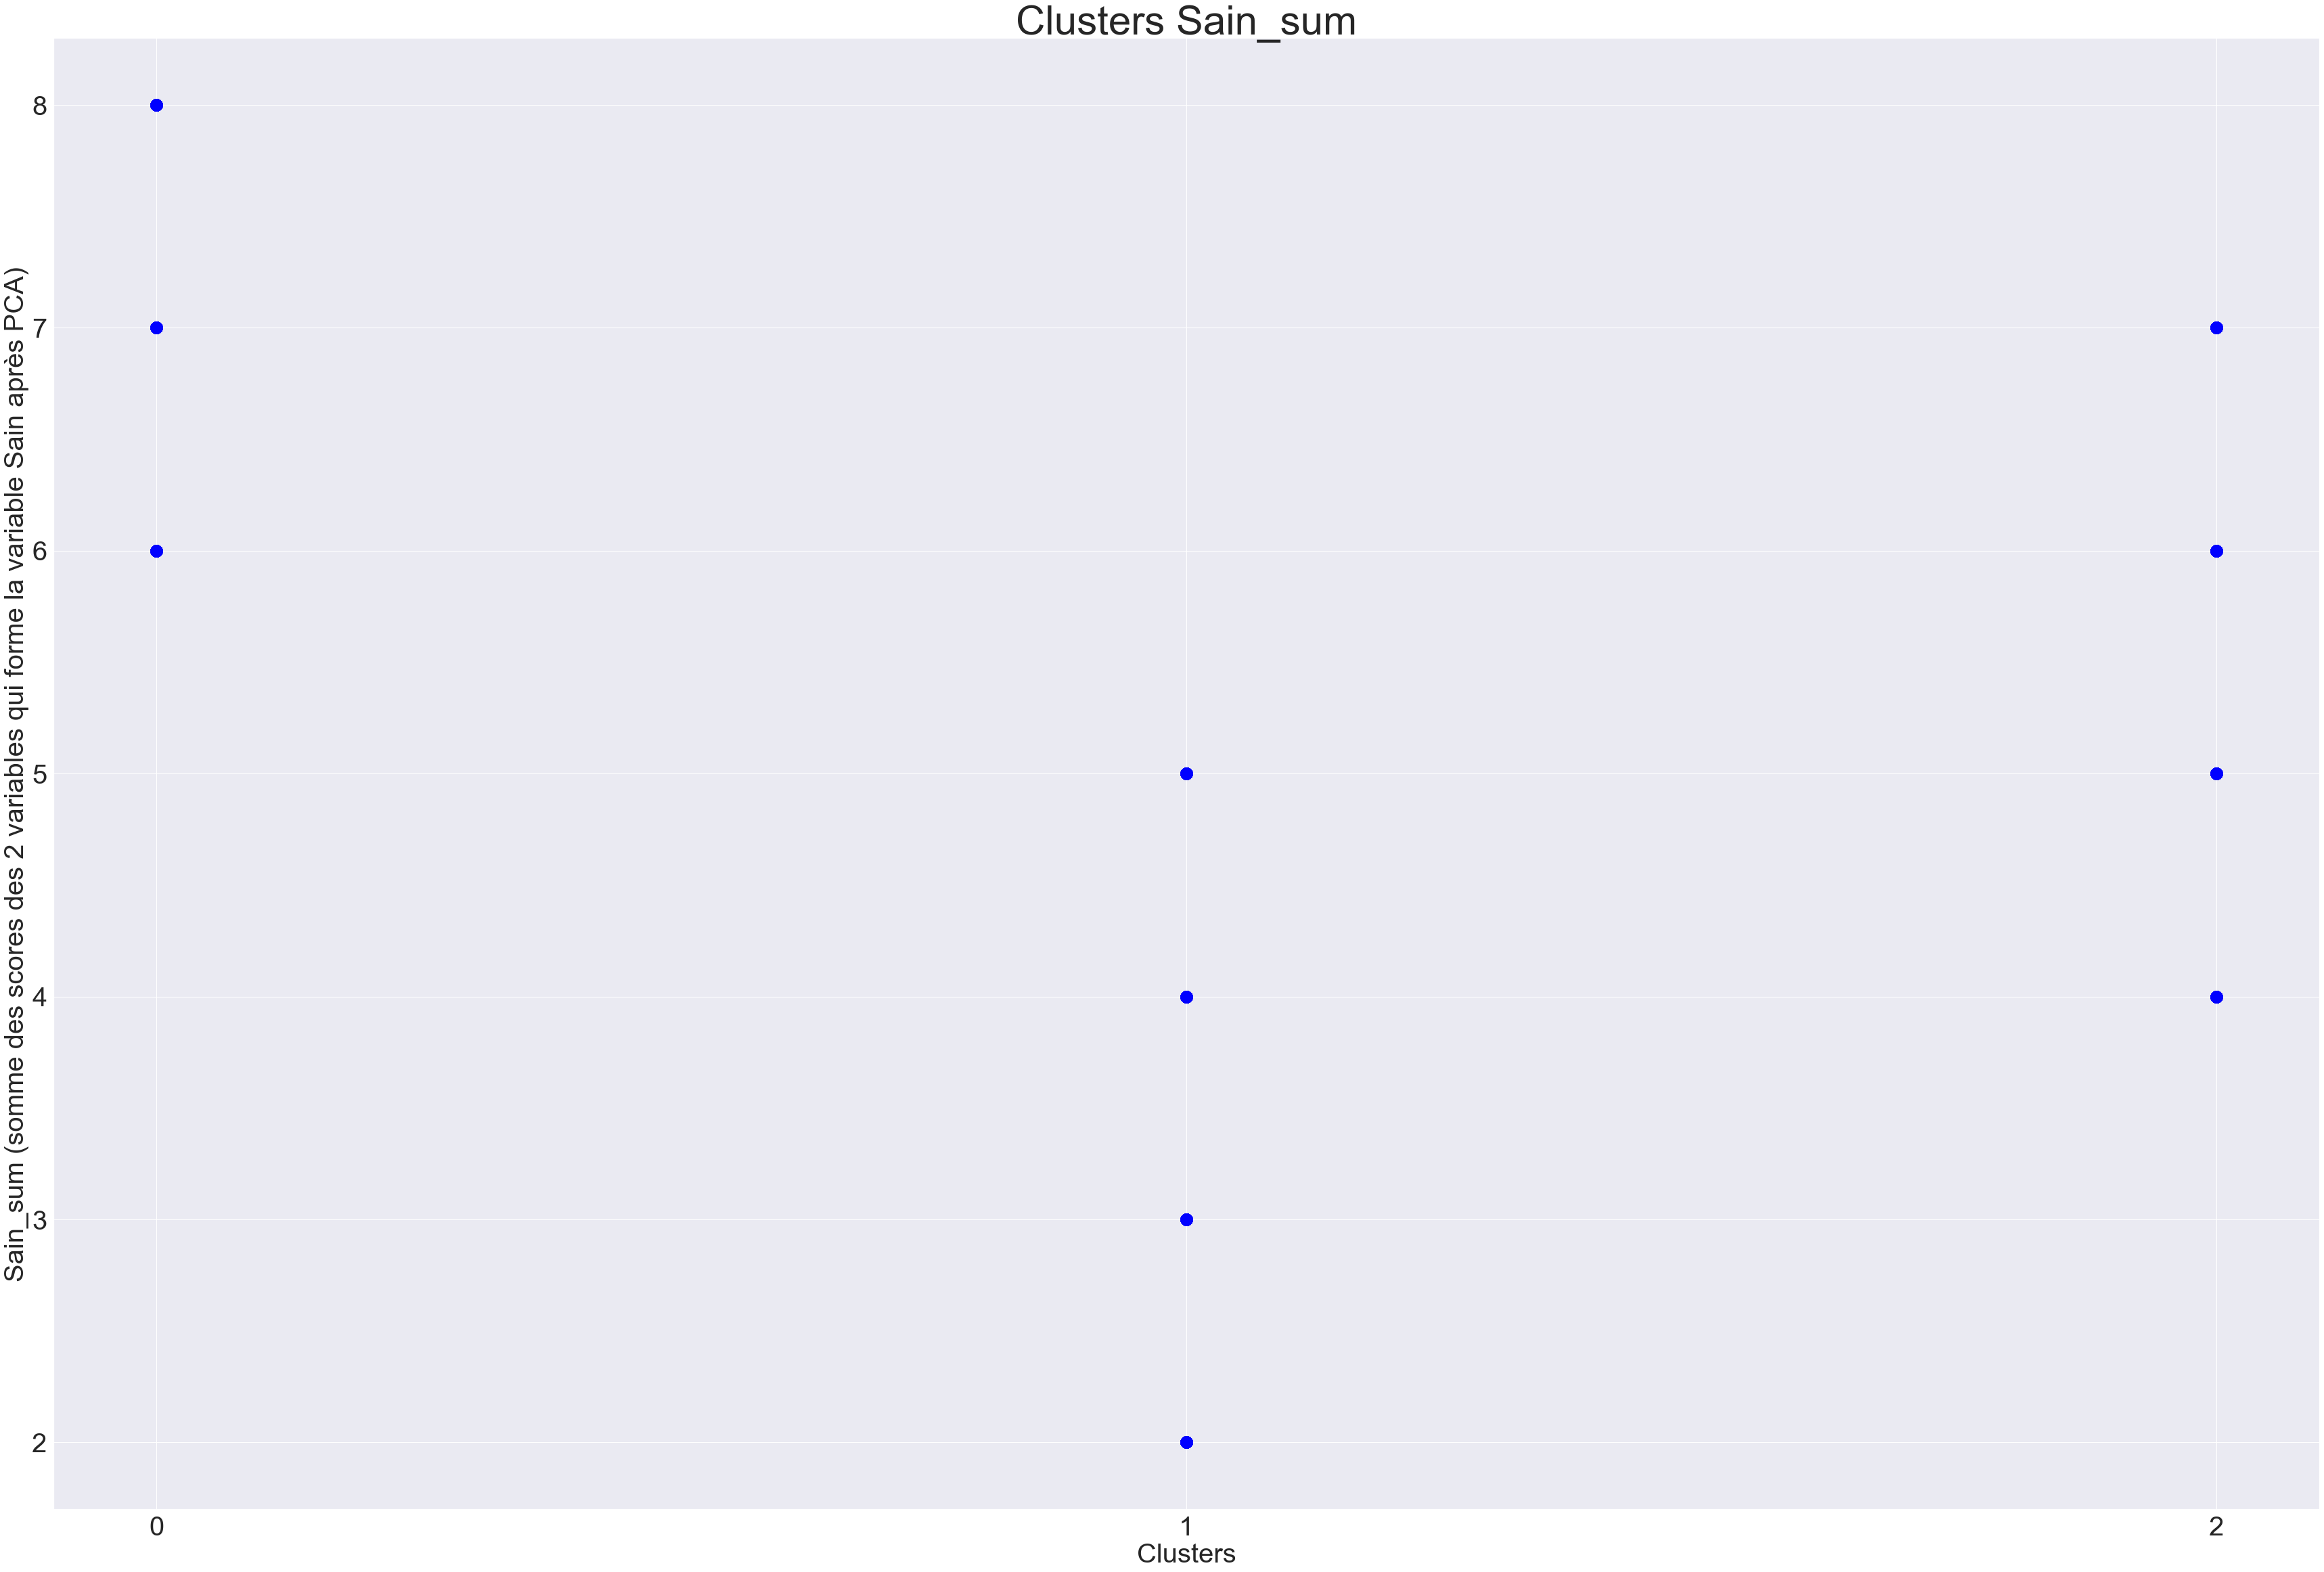

In [115]:
plt.figure(figsize=(60,40))

plt.scatter(Clus_Sain['Sain_clusters'] , Clus_Sain['Sain_sum'] , color = 'blue', s=300)
plt.xlabel('Clusters', size=40)
plt.ylabel('Sain_sum (somme des scores des 2 variables qui forme la variable Sain après PCA)', size=40)
plt.title('Clusters Sain_sum', size=60)
plt.xticks([0,1,2])
plt.yticks(size=40)
plt.xticks(size=40)
plt.show()

In [ ]:
#Le nombre d'additifs est toujours un nombre entier, qui en enlevant les outliers est compris ente 1 et 8.
#On distingue 3 clusters: 
#-  Cluster 1--> 1 point;
#-  Cluster 2 --> 2 points;
#-  Cluster 0 --> 3 points.

#On suis le principe du 'nutriscore': plus on a de points plus on est mauvais. 

#ATTENTION: Ici les cluster semblent s'intercepter, c'est normal on n'est pas en train de montrer les cluster sur la
#nouvelle variable 'Sain' mais sur la somme des scores des deux variables qui la constitue afin de comprendre que 
#représente chaque cluster en terme de "bon", "moyen" et "pas bon"

In [116]:
Sain['Sain_Score']= [1 if var==1 else 2 if var==2 else 3 for var in Sain['Sain_clusters']]

In [ ]:
##Vérification.

In [117]:
Sain.head(5)

code      Sain  Sain_clusters  Sain_Score
0  0000000005470  2.864114              1           1
1  0000000491228  1.864243              1           1
2  0000007730009 -1.135372              0           3
3  0000010206515 -0.151532              2           2
4  0000010216477 -0.151532              2           2

In [ ]:
##Fin vérification.

In [118]:
Sain_2=Sain.drop(['Sain_clusters'], axis=1)

In [ ]:
##Vérification.

In [119]:
Sain_2.head(5)

code      Sain  Sain_Score
0  0000000005470  2.864114           1
1  0000000491228  1.864243           1
2  0000007730009 -1.135372           3
3  0000010206515 -0.151532           2
4  0000010216477 -0.151532           2

In [ ]:
##Fin vérification.

#-------

In [ ]:
#D.9 Clustérisation de la variable 'Final-carbon-footprint' (k-Means avec Elbow method):

In [120]:
carbon=data_sn[['Final-carbon-footprint']]

In [121]:
sse_carbon = []
K=range(1, 11)
for k in K:
 kmeans = KMeans(n_clusters=k)
 kmeans.fit(carbon)
 sse_carbon.append(kmeans.inertia_)

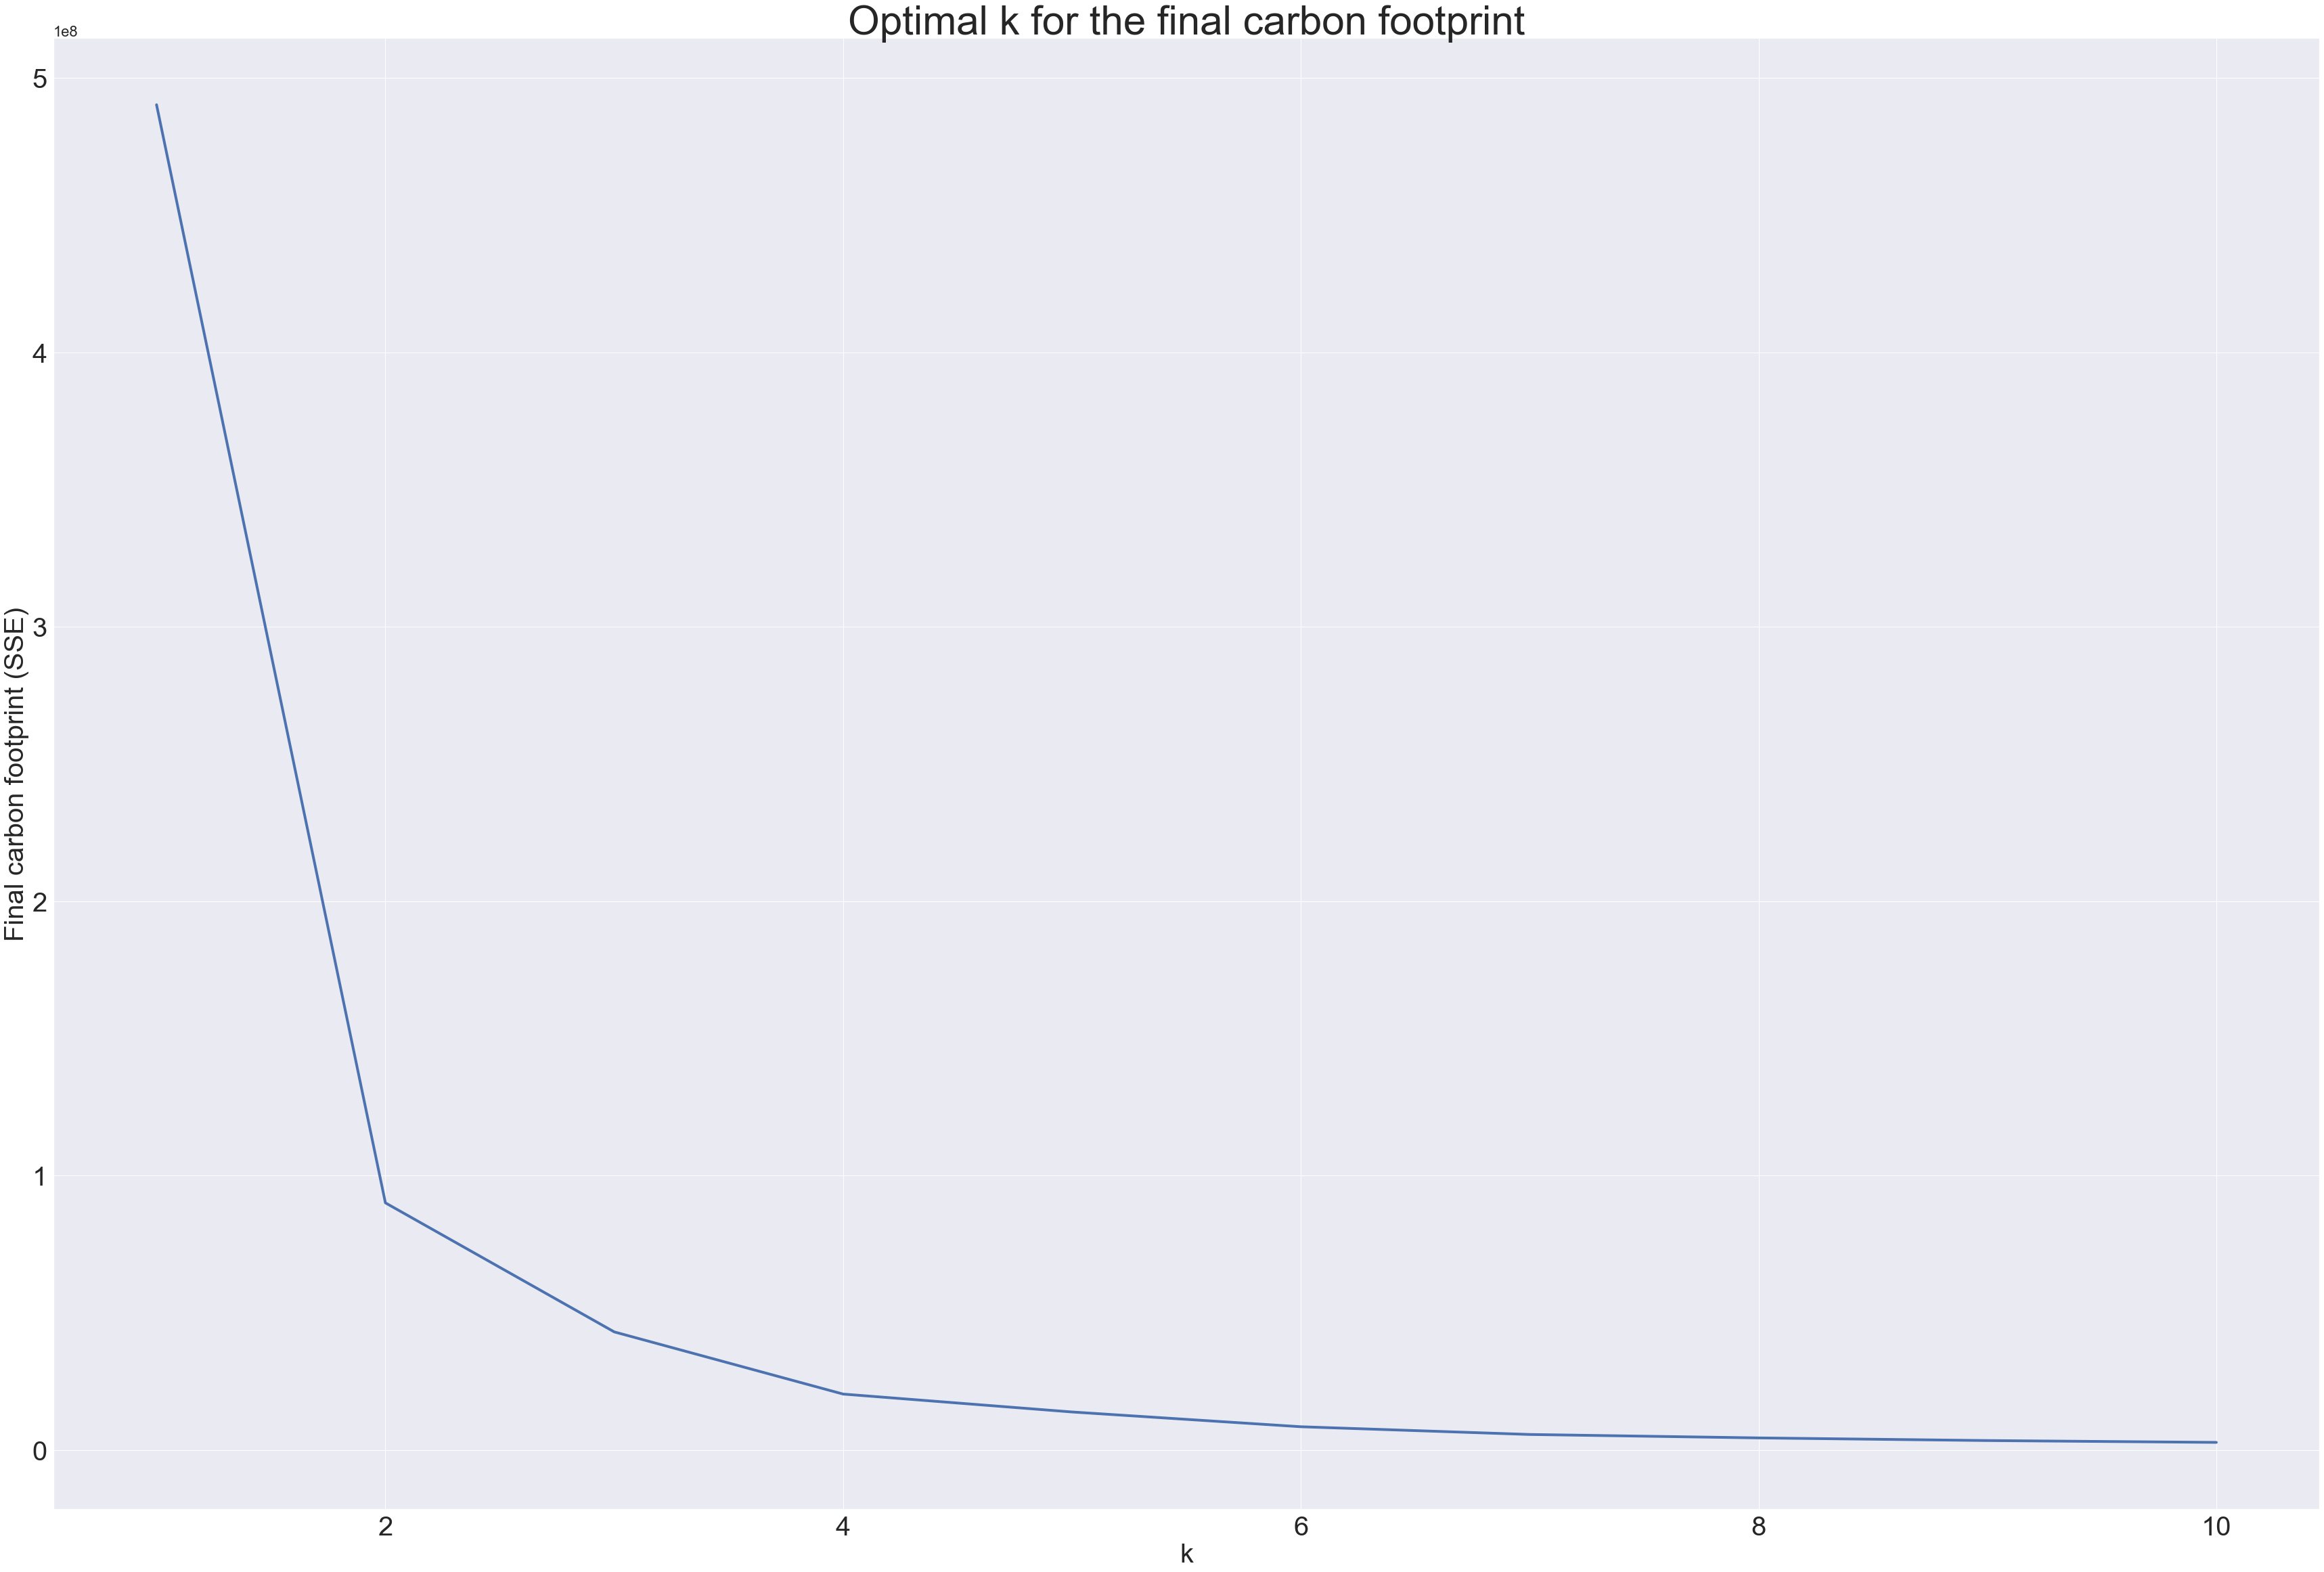

In [122]:
plt.figure(figsize=(60,40)) 
plt.plot(K, sse_carbon, linewidth=4) 
plt.xlabel('k', size=40) 
plt.ylabel('Final carbon footprint (SSE)', size=40) 
plt.title('Optimal k for the final carbon footprint', size=60) 
plt.yticks(size=40)
plt.xticks(size=40)
plt.show()

In [ ]:
#Le Elbow est 3, on fera donc 3 clusters. 
#Note: SSE:= Sum of Squared Error.

In [123]:
carbon=pd.DataFrame(carbon)

In [ ]:
#ATTENTION: On lance une première fois le KMeans, pour trouver les centroids et après les fixer. 
#Le but c'est d'avoir toujours les mêmes valeurs quand on lance le code. Si on ne fait pas ceci le KMeans prend des
#centroids de façon random et donne donc des résultats différents à chaque fois. 

##C.9.1 1ere fois KMean pour obtention des centroids:

In [ ]:
#kmeans= KMeans(n_clusters=3, precompute_distances="auto")
#label4=kmeans.fit_predict(carbon)

In [ ]:
#centroids4=kmeans.cluster_centers_

In [ ]:
#centroids4

In [ ]:
#D.9.2 2ème fois KMeans en fixant les centroids:
#(C'est l'array de 'centroids4' celui qu'on met dans 'startpts4').

In [124]:
startpts4=np.array([[ 60.78195136],[246.70614693],[453.0304784 ]], np.float64)

In [125]:
carbon['carbon_clusters'] = KMeans(n_clusters=3, init=startpts4, n_init=1).fit_predict(carbon)

In [ ]:
##Vérification.

In [126]:
carbon.head(5)

Final-carbon-footprint  carbon_clusters
11                   402.0                2
35                    90.0                0
49                    45.0                0
64                    90.0                0
65                    90.0                0

In [127]:
carbon.describe()

Final-carbon-footprint  carbon_clusters
count            40057.000000     40057.000000
mean               101.642859         0.212672
std                110.634258         0.544854
min                  1.000000         0.000000
25%                 45.000000         0.000000
50%                 45.000000         0.000000
75%                 90.000000         0.000000
max                557.000000         2.000000

In [ ]:
#Distribution des produits par cluster:

In [128]:
carbon_clus0 = carbon[carbon['carbon_clusters'] == 0]

In [129]:
carbon_clus1 = carbon[carbon['carbon_clusters'] == 1]

In [130]:
carbon_clus2 = carbon[carbon['carbon_clusters'] == 2]

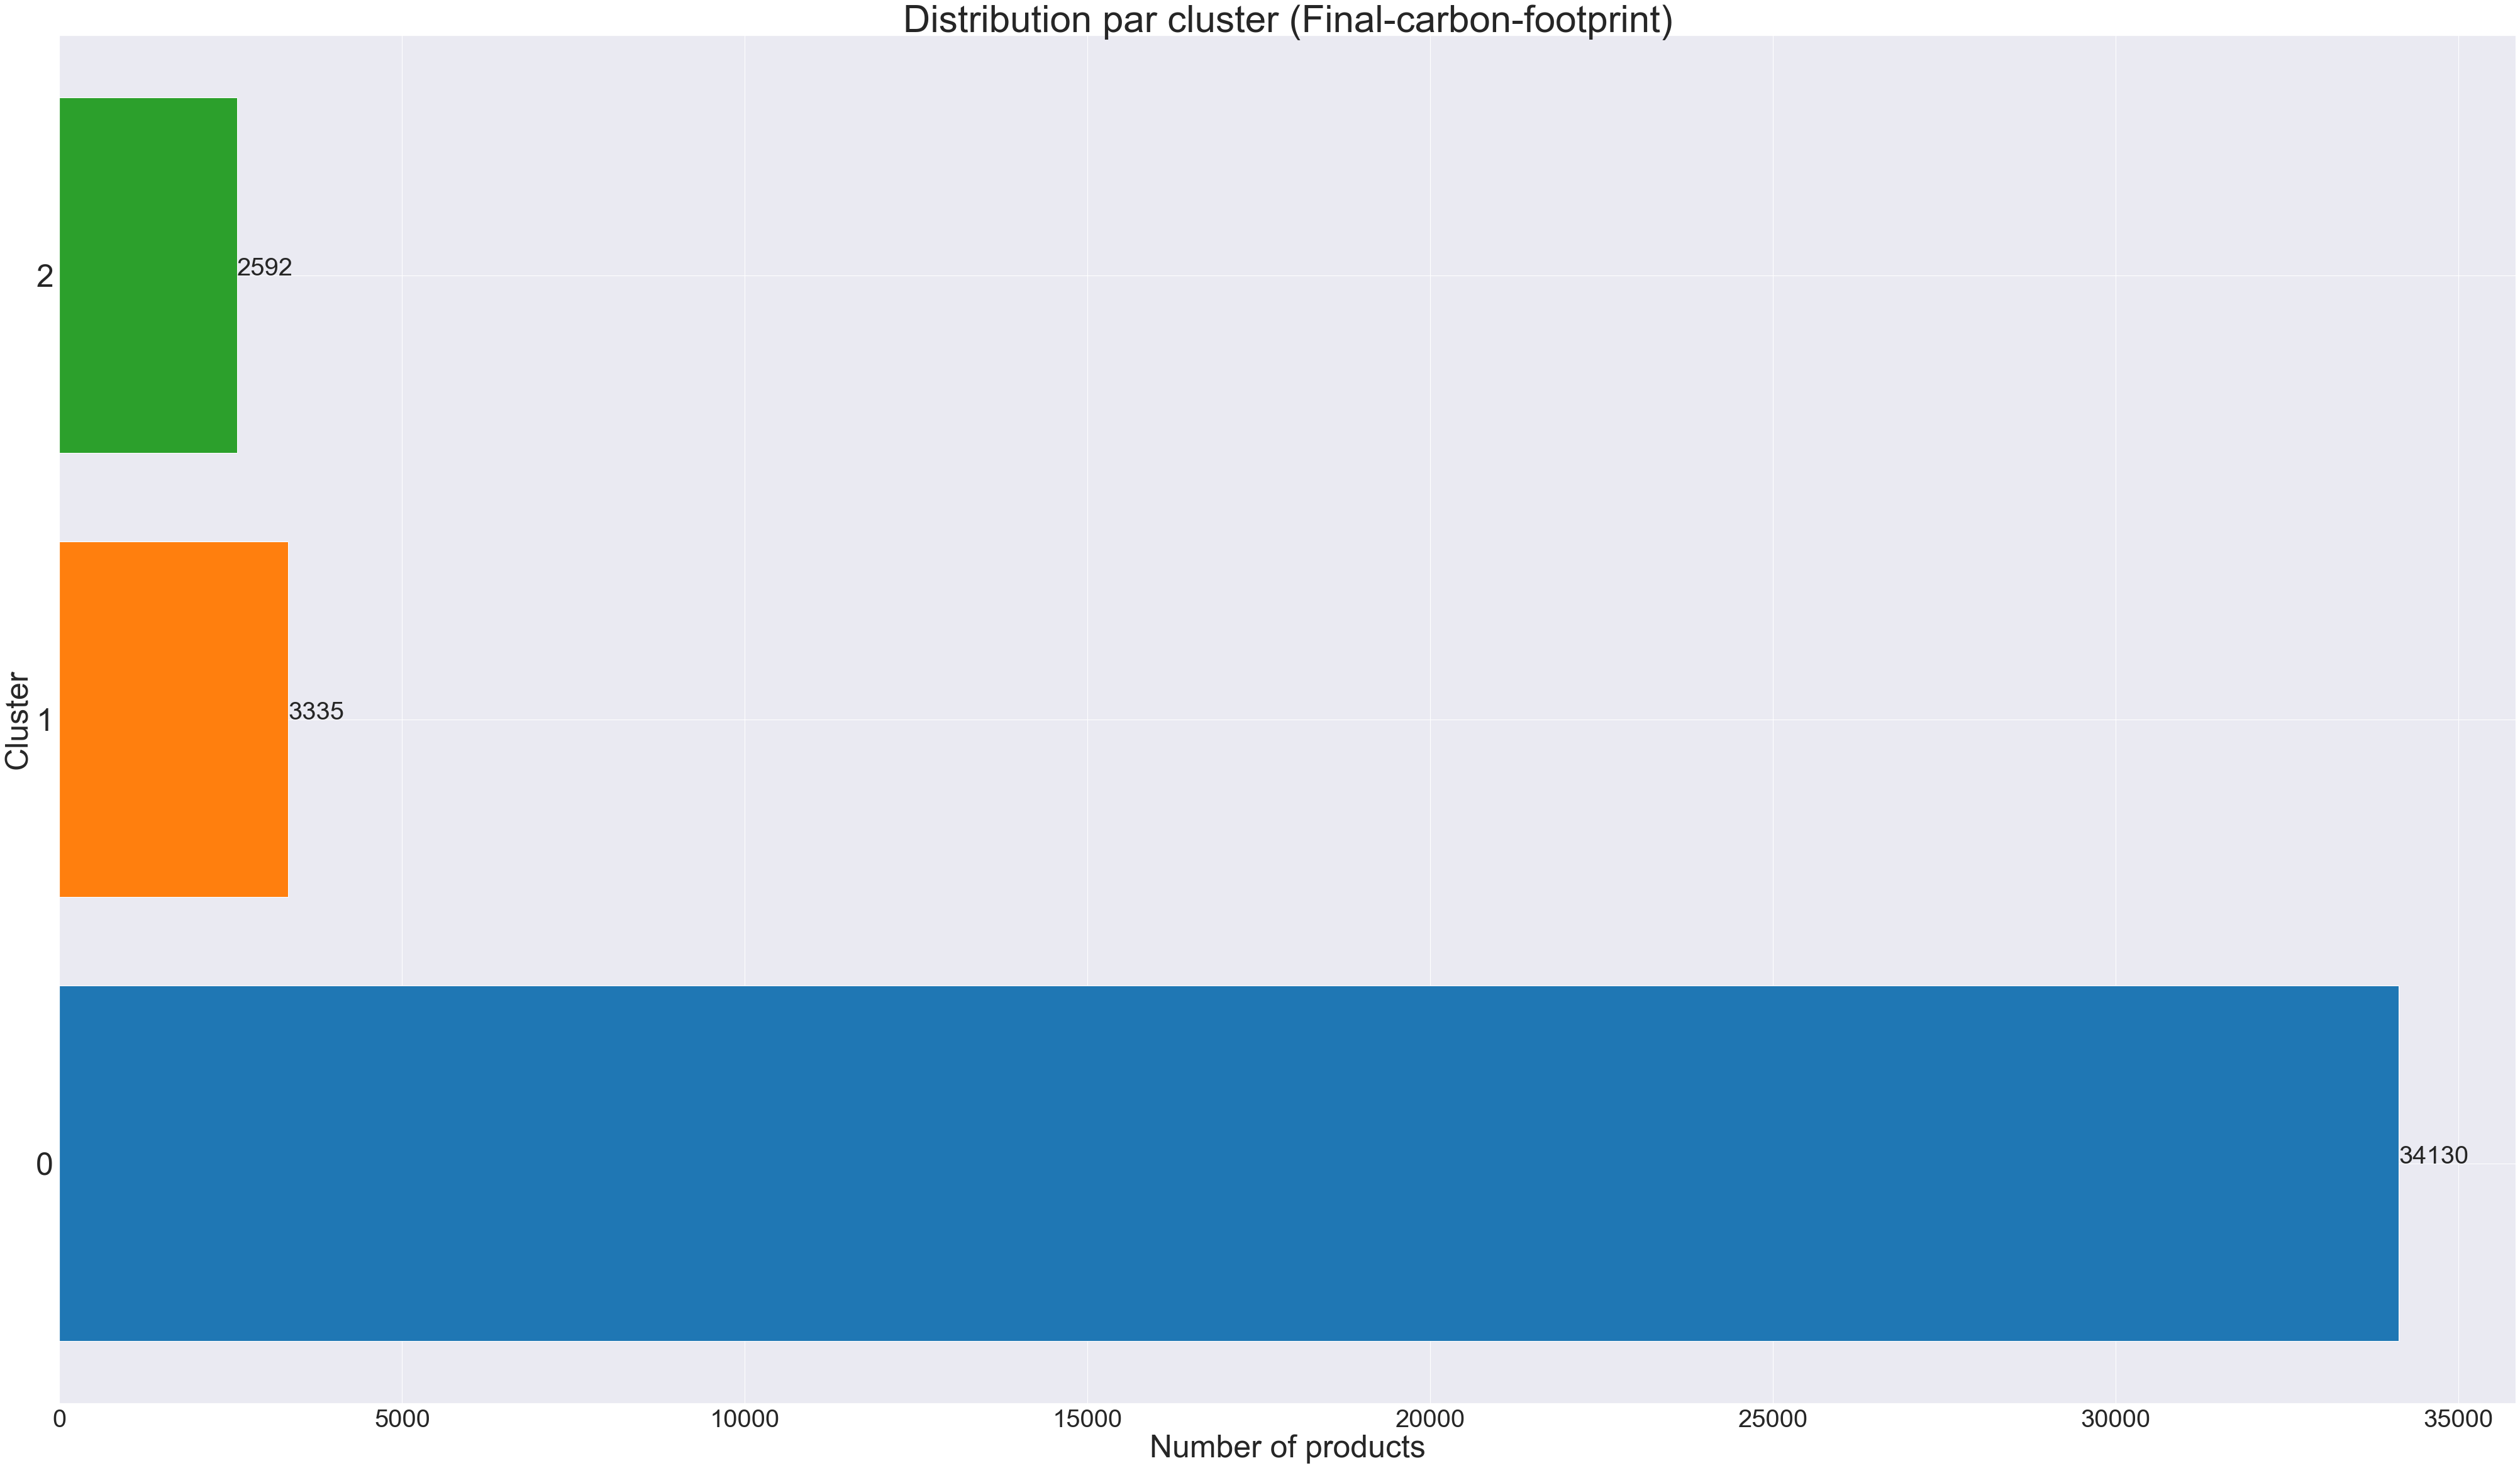

In [131]:
plt.figure(figsize=(70,40))
y=[len(carbon_clus0.index),len(carbon_clus1.index),len(carbon_clus2.index)]

plt.barh(['0','1','2'],y, color=['tab:blue', 'tab:orange', 'tab:green'])
for index, value in enumerate(y): 
    plt.text(value, index, str(value), size=40) 

plt.title('Distribution par cluster (Final-carbon-footprint)', size=60)
plt.ylabel('Cluster', size=50)
plt.xlabel('Number of products', size=50)
plt.yticks(size=50)
plt.xticks(size=40)
plt.show()


In [ ]:
#Il y a suffisamment d'éléments dans chaque cluster.

##Fin vérification.

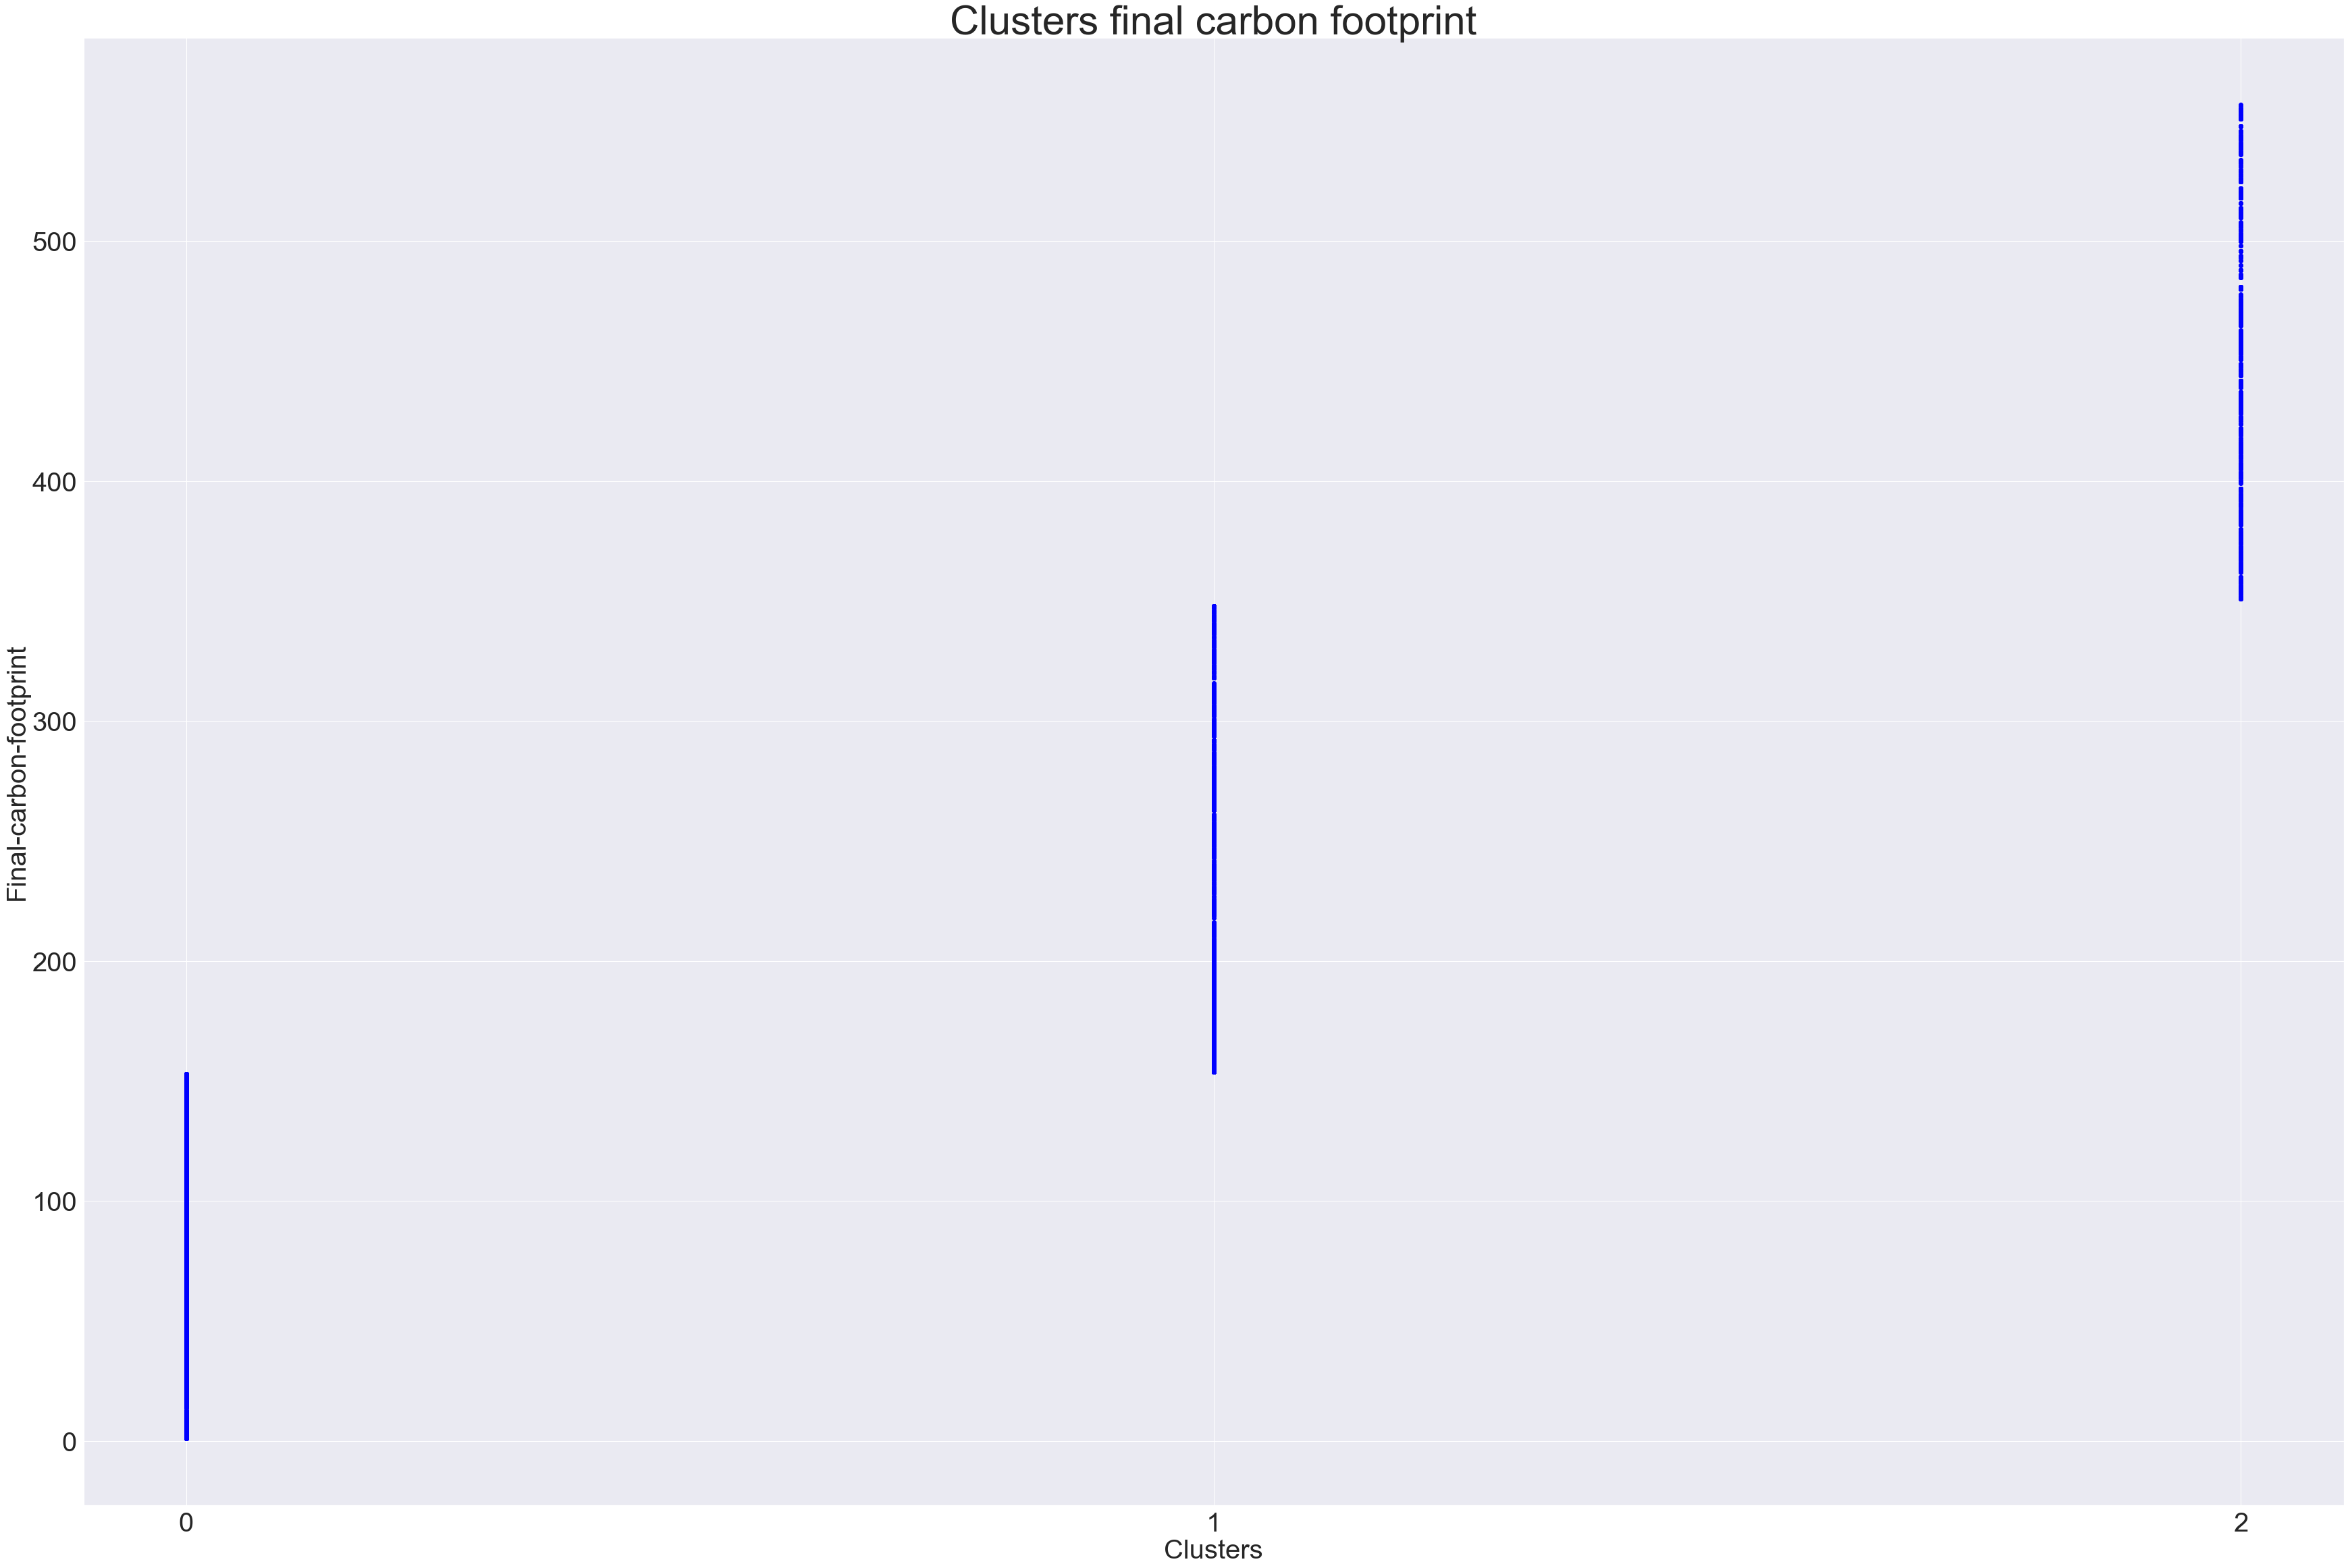

In [132]:
plt.figure(figsize=(60,40))

plt.scatter(carbon['carbon_clusters'] ,carbon['Final-carbon-footprint'] , color = 'blue')
plt.xlabel('Clusters', size=40)
plt.ylabel('Final-carbon-footprint', size=40)
plt.title('Clusters final carbon footprint', size=60)
plt.xticks([0,1,2])
plt.yticks(size=40)
plt.xticks(size=40)
plt.show()

In [ ]:
#Pour le 'Final-carbon-footprint' on distingue 3 clusters: 
#-  Cluster 0--> 1 point;
#-  Cluster 1 --> 2 points;
#-  Cluster 2 --> 3 points.

#On suis le principe du 'nutriscore': plus on a de points plus on est mauvais. 

In [133]:
carbon['carbon_Score']= [1 if var==0 else 2 if var==1 else 3 for var in carbon['carbon_clusters']]

In [134]:
carbon.head(5)

Final-carbon-footprint  carbon_clusters  carbon_Score
11                   402.0                2             3
35                    90.0                0             1
49                    45.0                0             1
64                    90.0                0             1
65                    90.0                0             1

In [135]:
carbon=pd.concat([df3.loc[:,['code']], carbon], axis=1)

In [ ]:
##Vérification.

In [136]:
carbon.head(15)

code  Final-carbon-footprint  carbon_clusters  carbon_Score
0   0000000000100                     NaN              NaN           NaN
1    000000000088                     NaN              NaN           NaN
2   0000000000949                     NaN              NaN           NaN
3   0000000001885                     NaN              NaN           NaN
4   0000000002103                     NaN              NaN           NaN
5   0000000002257                     NaN              NaN           NaN
6    000000000262                     NaN              NaN           NaN
7      0000000005                     NaN              NaN           NaN
8   0000000005005                     NaN              NaN           NaN
9   0000000005166                     NaN              NaN           NaN
10  0000000005241                     NaN              NaN           NaN
11  0000000005470                   402.0              2.0           3.0
12  0000000005661                     NaN              NaN           NaN
13  0000000007160                     NaN              NaN           NaN
14   000000000861                     NaN              NaN           NaN

In [137]:
df3.head(15)

code  nutriscore_grade_Total  Final-carbon-footprint  \
0   0000000000100                       4                     NaN   
1    000000000088                       4                     NaN   
2   0000000000949                       2                     NaN   
3   0000000001885                       1                     NaN   
4   0000000002103                       1                     NaN   
5   0000000002257                       2                     NaN   
6    000000000262                       4                     NaN   
7      0000000005                       4                     NaN   
8   0000000005005                       4                     NaN   
9   0000000005166                       3                     NaN   
10  0000000005241                       5                     NaN   
11  0000000005470                       1                   402.0   
12  0000000005661                       4                     NaN   
13  0000000007160                       4                     NaN   
14   000000000861                       4                     NaN   

    additives_Total   nb  
0               NaN  NaN  
1               4.0  1.0  
2               2.0  1.0  
3               1.0  1.0  
4               NaN  NaN  
5               2.0  1.0  
6               NaN  NaN  
7               NaN  NaN  
8               NaN  NaN  
9               NaN  NaN  
10              3.0  1.0  
11              3.0  1.0  
12              NaN  NaN  
13              1.0  1.0  
14              NaN  NaN

In [ ]:
##Fin de la vérification.

In [138]:
carbon_2=carbon.drop(['carbon_clusters'], axis=1)
carbon_2=carbon_2.dropna(subset=['carbon_Score'])

In [ ]:
##Il faut enlever les 'Nan' apparus lors de la concaténation qui correspondent aux lignes "outliers".

In [ ]:
##Vérification.

In [139]:
carbon_2.head(5)

code  Final-carbon-footprint  carbon_Score
11  0000000005470                   402.0           3.0
35  0000000491228                    90.0           1.0
49  0000007730009                    45.0           1.0
64  0000010206515                    90.0           1.0
65  0000010216477                    90.0           1.0

In [ ]:
#Fin de la vérification.

#-------

In [ ]:
#D.10 Merge les 'carbon_2' et 'Sain_2' par la colonne 'code':

In [140]:
data_final=pd.merge(Sain_2, carbon_2, on='code')

In [ ]:
##Vérification.

In [141]:
data_final.head(5)

code      Sain  Sain_Score  Final-carbon-footprint  carbon_Score
0  0000000005470  2.864114           1                   402.0           3.0
1  0000000491228  1.864243           1                    90.0           1.0
2  0000007730009 -1.135372           3                    45.0           1.0
3  0000010206515 -0.151532           2                    90.0           1.0
4  0000010216477 -0.151532           2                    90.0           1.0

In [ ]:
##Fin vérfication.

#-------

In [ ]:
#D.11 Introduction de la 'main_category_en', du 'product_name', du nutriscore_grade_Total et des 'additives_Total':

In [142]:
category=df.loc[:,['code','main_category_en','product_name','nutriscore_grade_Total','additives_Total']]

In [ ]:
##Vérification.

In [143]:
category.head(5)

code           main_category_en                  product_name  \
0  0000000000100                   Mustards   moutarde au moût de raisin    
1   000000000088               Almond paste                 Pate d'amande   
2  0000000000949  Seasoned shredded carrots     Salade de carottes râpées   
3  0000000001885              Pear compotes              Compote de poire   
4  0000000002103  fr:Aiguillettes de poulet        Aiguillettes de poulet   

  nutriscore_grade_Total  additives_Total  
0                      d              0.0  
1                      d              4.0  
2                      b              2.0  
3                      a              1.0  
4                      a              0.0

In [ ]:
##Fin vérification.

In [144]:
data_final=pd.merge(category, data_final, on='code')

In [ ]:
##Vérification.

In [145]:
data_final.head(5)

code                 main_category_en  \
0  0000000005470                        Baguettes   
1  0000000491228  Dried products to be rehydrated   
2  0000007730009               Shortbread cookies   
3  0000010206515                   fr:decorations   
4  0000010216477                 fr:Pâtes à sucre   

                        product_name nutriscore_grade_Total  additives_Total  \
0                   BAguette bressan                      a              3.0   
1             Entremets Crème Brulée                      b              4.0   
2  Biscuits sablés fourrage au cacao                      e              3.0   
3                       Pâte à Sucre                      d              5.0   
4                       Pate a sucre                      d              6.0   

       Sain  Sain_Score  Final-carbon-footprint  carbon_Score  
0  2.864114           1                   402.0           3.0  
1  1.864243           1                    90.0           1.0  
2 -1.135372           3                    45.0           1.0  
3 -0.151532           2                    90.0           1.0  
4 -0.151532           2                    90.0           1.0

In [ ]:
##Fin vérifcation.

#-------

In [ ]:
#D.12 Attribution de la qualification: Bon, Moyen, Pas Bon pour la partie "combien sain est le produit" ('Sain_Score'):

#Si Score 1 --> Bon;
#Si Score 2 --> Moyen;
#Si Score 3 --> Pas Bon.

In [146]:
data_final['Sain_Score'].drop_duplicates()

0    1
2    3
3    2
Name: Sain_Score, dtype: int64

In [147]:
data_final['Impact Santé']= ['Bon' if var==1 else 'Moyen' if var==2 else 'Pas Bon' for var in data_final['Sain_Score']]

In [ ]:
##Vérification.

In [148]:
data_final.head(5)

code                 main_category_en  \
0  0000000005470                        Baguettes   
1  0000000491228  Dried products to be rehydrated   
2  0000007730009               Shortbread cookies   
3  0000010206515                   fr:decorations   
4  0000010216477                 fr:Pâtes à sucre   

                        product_name nutriscore_grade_Total  additives_Total  \
0                   BAguette bressan                      a              3.0   
1             Entremets Crème Brulée                      b              4.0   
2  Biscuits sablés fourrage au cacao                      e              3.0   
3                       Pâte à Sucre                      d              5.0   
4                       Pate a sucre                      d              6.0   

       Sain  Sain_Score  Final-carbon-footprint  carbon_Score Impact Santé  
0  2.864114           1                   402.0           3.0          Bon  
1  1.864243           1                    90.0           1.0          Bon  
2 -1.135372           3                    45.0           1.0      Pas Bon  
3 -0.151532           2                    90.0           1.0        Moyen  
4 -0.151532           2                    90.0           1.0        Moyen

In [ ]:
##Fin vérification.

#-------

In [ ]:
#D.13 Attribution de la qualification: Bon, Moyen, Pas Top pour la partie "impact écologique du produit" 
#('carbon_Score'):

#Si Score 1 --> Bon;
#Si Score 2 --> Moyen;
#Si Score 3 --> Pas Bon.

In [149]:
data_final['carbon_Score'].drop_duplicates()

0    3.0
1    1.0
8    2.0
Name: carbon_Score, dtype: float64

In [150]:
data_final['Impact Carbonne']= ['Bon' if var==1 else 'Moyen' if var==2 else 'Pas Bon' for var in data_final['carbon_Score']]

In [ ]:
##Vérification.

In [151]:
data_final.head(5)

code                 main_category_en  \
0  0000000005470                        Baguettes   
1  0000000491228  Dried products to be rehydrated   
2  0000007730009               Shortbread cookies   
3  0000010206515                   fr:decorations   
4  0000010216477                 fr:Pâtes à sucre   

                        product_name nutriscore_grade_Total  additives_Total  \
0                   BAguette bressan                      a              3.0   
1             Entremets Crème Brulée                      b              4.0   
2  Biscuits sablés fourrage au cacao                      e              3.0   
3                       Pâte à Sucre                      d              5.0   
4                       Pate a sucre                      d              6.0   

       Sain  Sain_Score  Final-carbon-footprint  carbon_Score Impact Santé  \
0  2.864114           1                   402.0           3.0          Bon   
1  1.864243           1                    90.0           1.0          Bon   
2 -1.135372           3                    45.0           1.0      Pas Bon   
3 -0.151532           2                    90.0           1.0        Moyen   
4 -0.151532           2                    90.0           1.0        Moyen   

  Impact Carbonne  
0         Pas Bon  
1             Bon  
2             Bon  
3             Bon  
4             Bon

In [ ]:
##Fin vérification

#-------

In [ ]:
#D.14 Variables 'Score_Final' (Création, clustérisation, scoring, qualification)


#D.14.1 Réduction des 2 variables 'Sain_Score' et 'carbon_Score' en 1 seule ('Score_Final'):

#ATTENTION: Cette fois-ci on ne considère par la méthode PCA, car on veut que les deux variables 'Sain_Score' et 
#'carbon_Score' aient le même poids (ie. la même importance), car on cherche à identifier les produits les plus sains et
#les plus écologiques parmi une catégorie de produits. Ainsi, les critères de corrélation et d'inertie pris en compte 
#par le PCA ne doivent pas être considérés. On fait donc uniquement la somme des deux scores, et c'est sur cette somme
#qu'on va  clustériser.

In [152]:
data_final2=ColumnTransformer([('preserve', 'passthrough', ['code', 'main_category_en', 'product_name', 'nutriscore_grade_Total', 'additives_Total', 'Sain', 'Sain_Score', 'Impact Santé', 'Final-carbon-footprint', 'carbon_Score', 'Impact Carbonne'])]).fit_transform(data_final)

In [153]:
data_final2=pd.DataFrame(data_final2)

In [ ]:
##Vérification.

In [154]:
data_final2.head(5)

0                                1   \
0  0000000005470                        Baguettes   
1  0000000491228  Dried products to be rehydrated   
2  0000007730009               Shortbread cookies   
3  0000010206515                   fr:decorations   
4  0000010216477                 fr:Pâtes à sucre   

                                  2  3    4         5  6        7      8   \
0                   BAguette bressan  a  3.0  2.864114  1      Bon  402.0   
1             Entremets Crème Brulée  b  4.0  1.864243  1      Bon   90.0   
2  Biscuits sablés fourrage au cacao  e  3.0 -1.135372  3  Pas Bon   45.0   
3                       Pâte à Sucre  d  5.0 -0.151532  2    Moyen   90.0   
4                       Pate a sucre  d  6.0 -0.151532  2    Moyen   90.0   

    9        10  
0  3.0  Pas Bon  
1  1.0      Bon  
2  1.0      Bon  
3  1.0      Bon  
4  1.0      Bon

In [ ]:
##Fin vérification.

In [ ]:
#On renomme les colonnes: 

In [155]:
data_final2.rename(columns={0:'code', 1: 'main_category_en', 2:'product_name', 3:'nutriscore_grade_Total', 4:'additives_Total', 5:'Sain', 6:'Sain_Score', 7:'Impact Santé', 8:'Final-carbon-footprint', 9:'carbon_Score', 10:'Impact Carbonne'}, inplace=True)

In [156]:
data_final2.head(5)

code                 main_category_en  \
0  0000000005470                        Baguettes   
1  0000000491228  Dried products to be rehydrated   
2  0000007730009               Shortbread cookies   
3  0000010206515                   fr:decorations   
4  0000010216477                 fr:Pâtes à sucre   

                        product_name nutriscore_grade_Total additives_Total  \
0                   BAguette bressan                      a             3.0   
1             Entremets Crème Brulée                      b             4.0   
2  Biscuits sablés fourrage au cacao                      e             3.0   
3                       Pâte à Sucre                      d             5.0   
4                       Pate a sucre                      d             6.0   

       Sain Sain_Score Impact Santé Final-carbon-footprint carbon_Score  \
0  2.864114          1          Bon                  402.0          3.0   
1  1.864243          1          Bon                   90.0          1.0   
2 -1.135372          3      Pas Bon                   45.0          1.0   
3 -0.151532          2        Moyen                   90.0          1.0   
4 -0.151532          2        Moyen                   90.0          1.0   

  Impact Carbonne  
0         Pas Bon  
1             Bon  
2             Bon  
3             Bon  
4             Bon

In [ ]:
#On fait la somme des colonnes 'Sain_Score' et 'carbon_Score':

In [157]:
data_final2['Total_Score']=data_final2['Sain_Score']+data_final2['carbon_Score']

In [ ]:
##Vérification.

In [158]:
data_final2.head(5)

code                 main_category_en  \
0  0000000005470                        Baguettes   
1  0000000491228  Dried products to be rehydrated   
2  0000007730009               Shortbread cookies   
3  0000010206515                   fr:decorations   
4  0000010216477                 fr:Pâtes à sucre   

                        product_name nutriscore_grade_Total additives_Total  \
0                   BAguette bressan                      a             3.0   
1             Entremets Crème Brulée                      b             4.0   
2  Biscuits sablés fourrage au cacao                      e             3.0   
3                       Pâte à Sucre                      d             5.0   
4                       Pate a sucre                      d             6.0   

       Sain Sain_Score Impact Santé Final-carbon-footprint carbon_Score  \
0  2.864114          1          Bon                  402.0          3.0   
1  1.864243          1          Bon                   90.0          1.0   
2 -1.135372          3      Pas Bon                   45.0          1.0   
3 -0.151532          2        Moyen                   90.0          1.0   
4 -0.151532          2        Moyen                   90.0          1.0   

  Impact Carbonne Total_Score  
0         Pas Bon         4.0  
1             Bon         2.0  
2             Bon         4.0  
3             Bon         3.0  
4             Bon         3.0

In [ ]:
##Fin vérifcation.

In [159]:
Total_Score=data_final2.drop(['code','main_category_en','product_name','nutriscore_grade_Total','additives_Total','Sain','Sain_Score','Impact Santé','Final-carbon-footprint','carbon_Score','Impact Carbonne'], axis=1)

In [ ]:
##Vérification

In [160]:
Total_Score.head(5)

Total_Score
0         4.0
1         2.0
2         4.0
3         3.0
4         3.0

In [ ]:
#D.14.2  Clustérisation de la nouvelle variable 'Total_Score' (méthode k-Means avec Elbow):

In [161]:
sse_Score = []
K=range(1, 11)
for k in K:
 kmeans = KMeans(n_clusters=k)
 kmeans.fit(Total_Score)
 sse_Score.append(kmeans.inertia_)

C:\Users\'titite\AppData\Local\Temp/ipykernel_26608/665384154.py:5: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(Total_Score)
C:\Users\'titite\AppData\Local\Temp/ipykernel_26608/665384154.py:5: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(Total_Score)
C:\Users\'titite\AppData\Local\Temp/ipykernel_26608/665384154.py:5: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(Total_Score)
C:\Users\'titite\AppData\Local\Temp/ipykernel_26608/665384154.py:5: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(Total_Score)
C:\Users\'titite\AppData\Local\Temp/ipykernel_26608/665384154.py:5: ConvergenceWarning: Number of distinct clusters (5) 

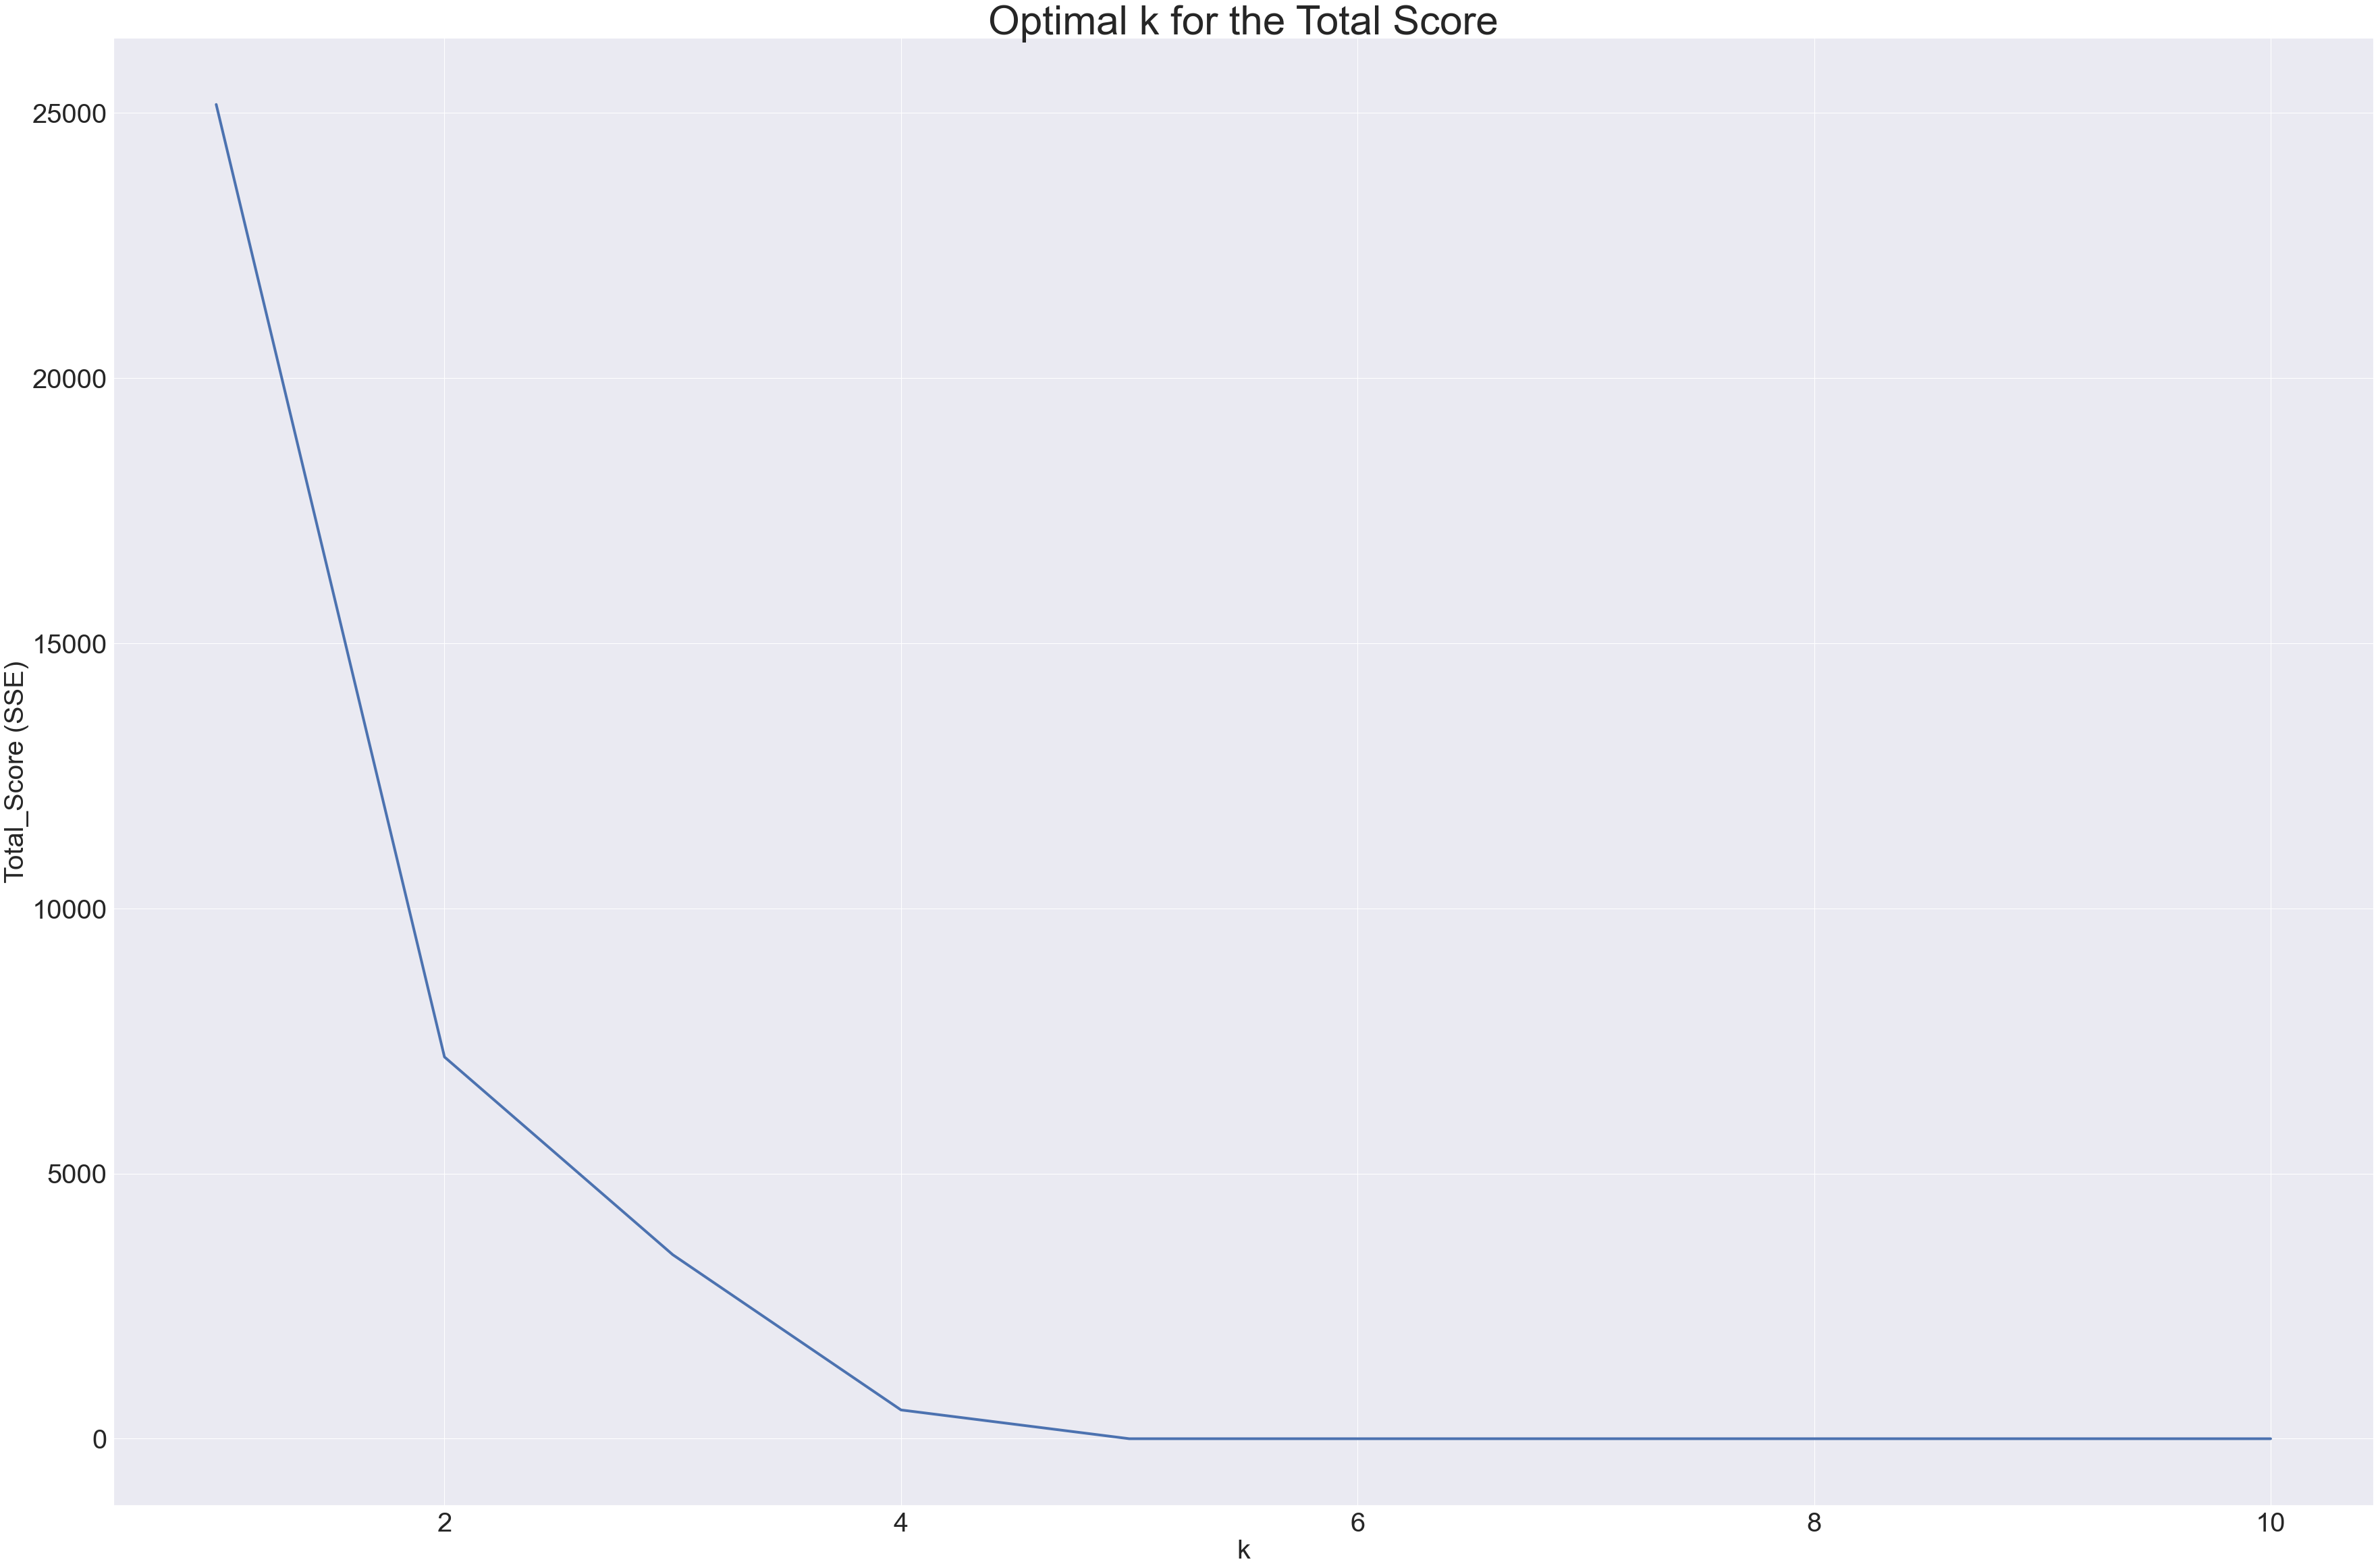

In [162]:
plt.figure(figsize=(60,40)) 
plt.plot(K, sse_Score, linewidth=4) 
plt.xlabel('k', size=40) 
plt.ylabel('Total_Score (SSE)', size=40) 
plt.title('Optimal k for the Total Score', size=60) 
plt.yticks(size=40)
plt.xticks(size=40)
plt.show()

In [ ]:
#Le Elbow est 3, on fera donc 3 clusters. 
#Note: SSE:= Sum of Squared Error.

In [ ]:
#ATTENTION: On lance une première fois le KMeans, pour trouver les centroids et après les fixer. 
#Le but c'est d'avoir toujours les mêmes valeurs quand on lance le code. Si on ne fait pas ceci le KMeans prend des
#centroids de façon random et donne donc des résultats différents à chaque fois. 

##D.14.2.1 1ere fois KMean pour obtention des centroids:

In [ ]:
#kmeans= KMeans(n_clusters=3, precompute_distances="auto")
#label5=kmeans.fit_predict(Total_Score)

In [ ]:
#centroids5=kmeans.cluster_centers_

In [ ]:
#centroids5

In [ ]:
#D.14.2.2 2ème fois KMeans en fixant les centroids:
#(C'est l'array de 'centroids5' celui qu'on met dans 'startpts5').

In [163]:
startpts5=np.array([[4.        ],[2.84721485],[5.27872498]], np.float64)

In [164]:
data_final2['Total_Score_clusters'] = KMeans(n_clusters=3, init=startpts5, n_init=1).fit_predict(Total_Score)

In [ ]:
##Vérification.

In [165]:
data_final2.head(5)

code                 main_category_en  \
0  0000000005470                        Baguettes   
1  0000000491228  Dried products to be rehydrated   
2  0000007730009               Shortbread cookies   
3  0000010206515                   fr:decorations   
4  0000010216477                 fr:Pâtes à sucre   

                        product_name nutriscore_grade_Total additives_Total  \
0                   BAguette bressan                      a             3.0   
1             Entremets Crème Brulée                      b             4.0   
2  Biscuits sablés fourrage au cacao                      e             3.0   
3                       Pâte à Sucre                      d             5.0   
4                       Pate a sucre                      d             6.0   

       Sain Sain_Score Impact Santé Final-carbon-footprint carbon_Score  \
0  2.864114          1          Bon                  402.0          3.0   
1  1.864243          1          Bon                   90.0          1.0   
2 -1.135372          3      Pas Bon                   45.0          1.0   
3 -0.151532          2        Moyen                   90.0          1.0   
4 -0.151532          2        Moyen                   90.0          1.0   

  Impact Carbonne Total_Score  Total_Score_clusters  
0         Pas Bon         4.0                     0  
1             Bon         2.0                     1  
2             Bon         4.0                     0  
3             Bon         3.0                     1  
4             Bon         3.0                     1

In [166]:
data_final2.describe()

Total_Score_clusters
count          40057.000000
mean               0.699403
std                0.587329
min                0.000000
25%                0.000000
50%                1.000000
75%                1.000000
max                2.000000

In [ ]:
#Distribution des produits par cluster:

In [167]:
Total_clus0 = data_final2[data_final2['Total_Score_clusters'] == 0]

In [168]:
Total_clus1 = data_final2[data_final2['Total_Score_clusters'] == 1]

In [169]:
Total_clus2 = data_final2[data_final2['Total_Score_clusters'] == 2]

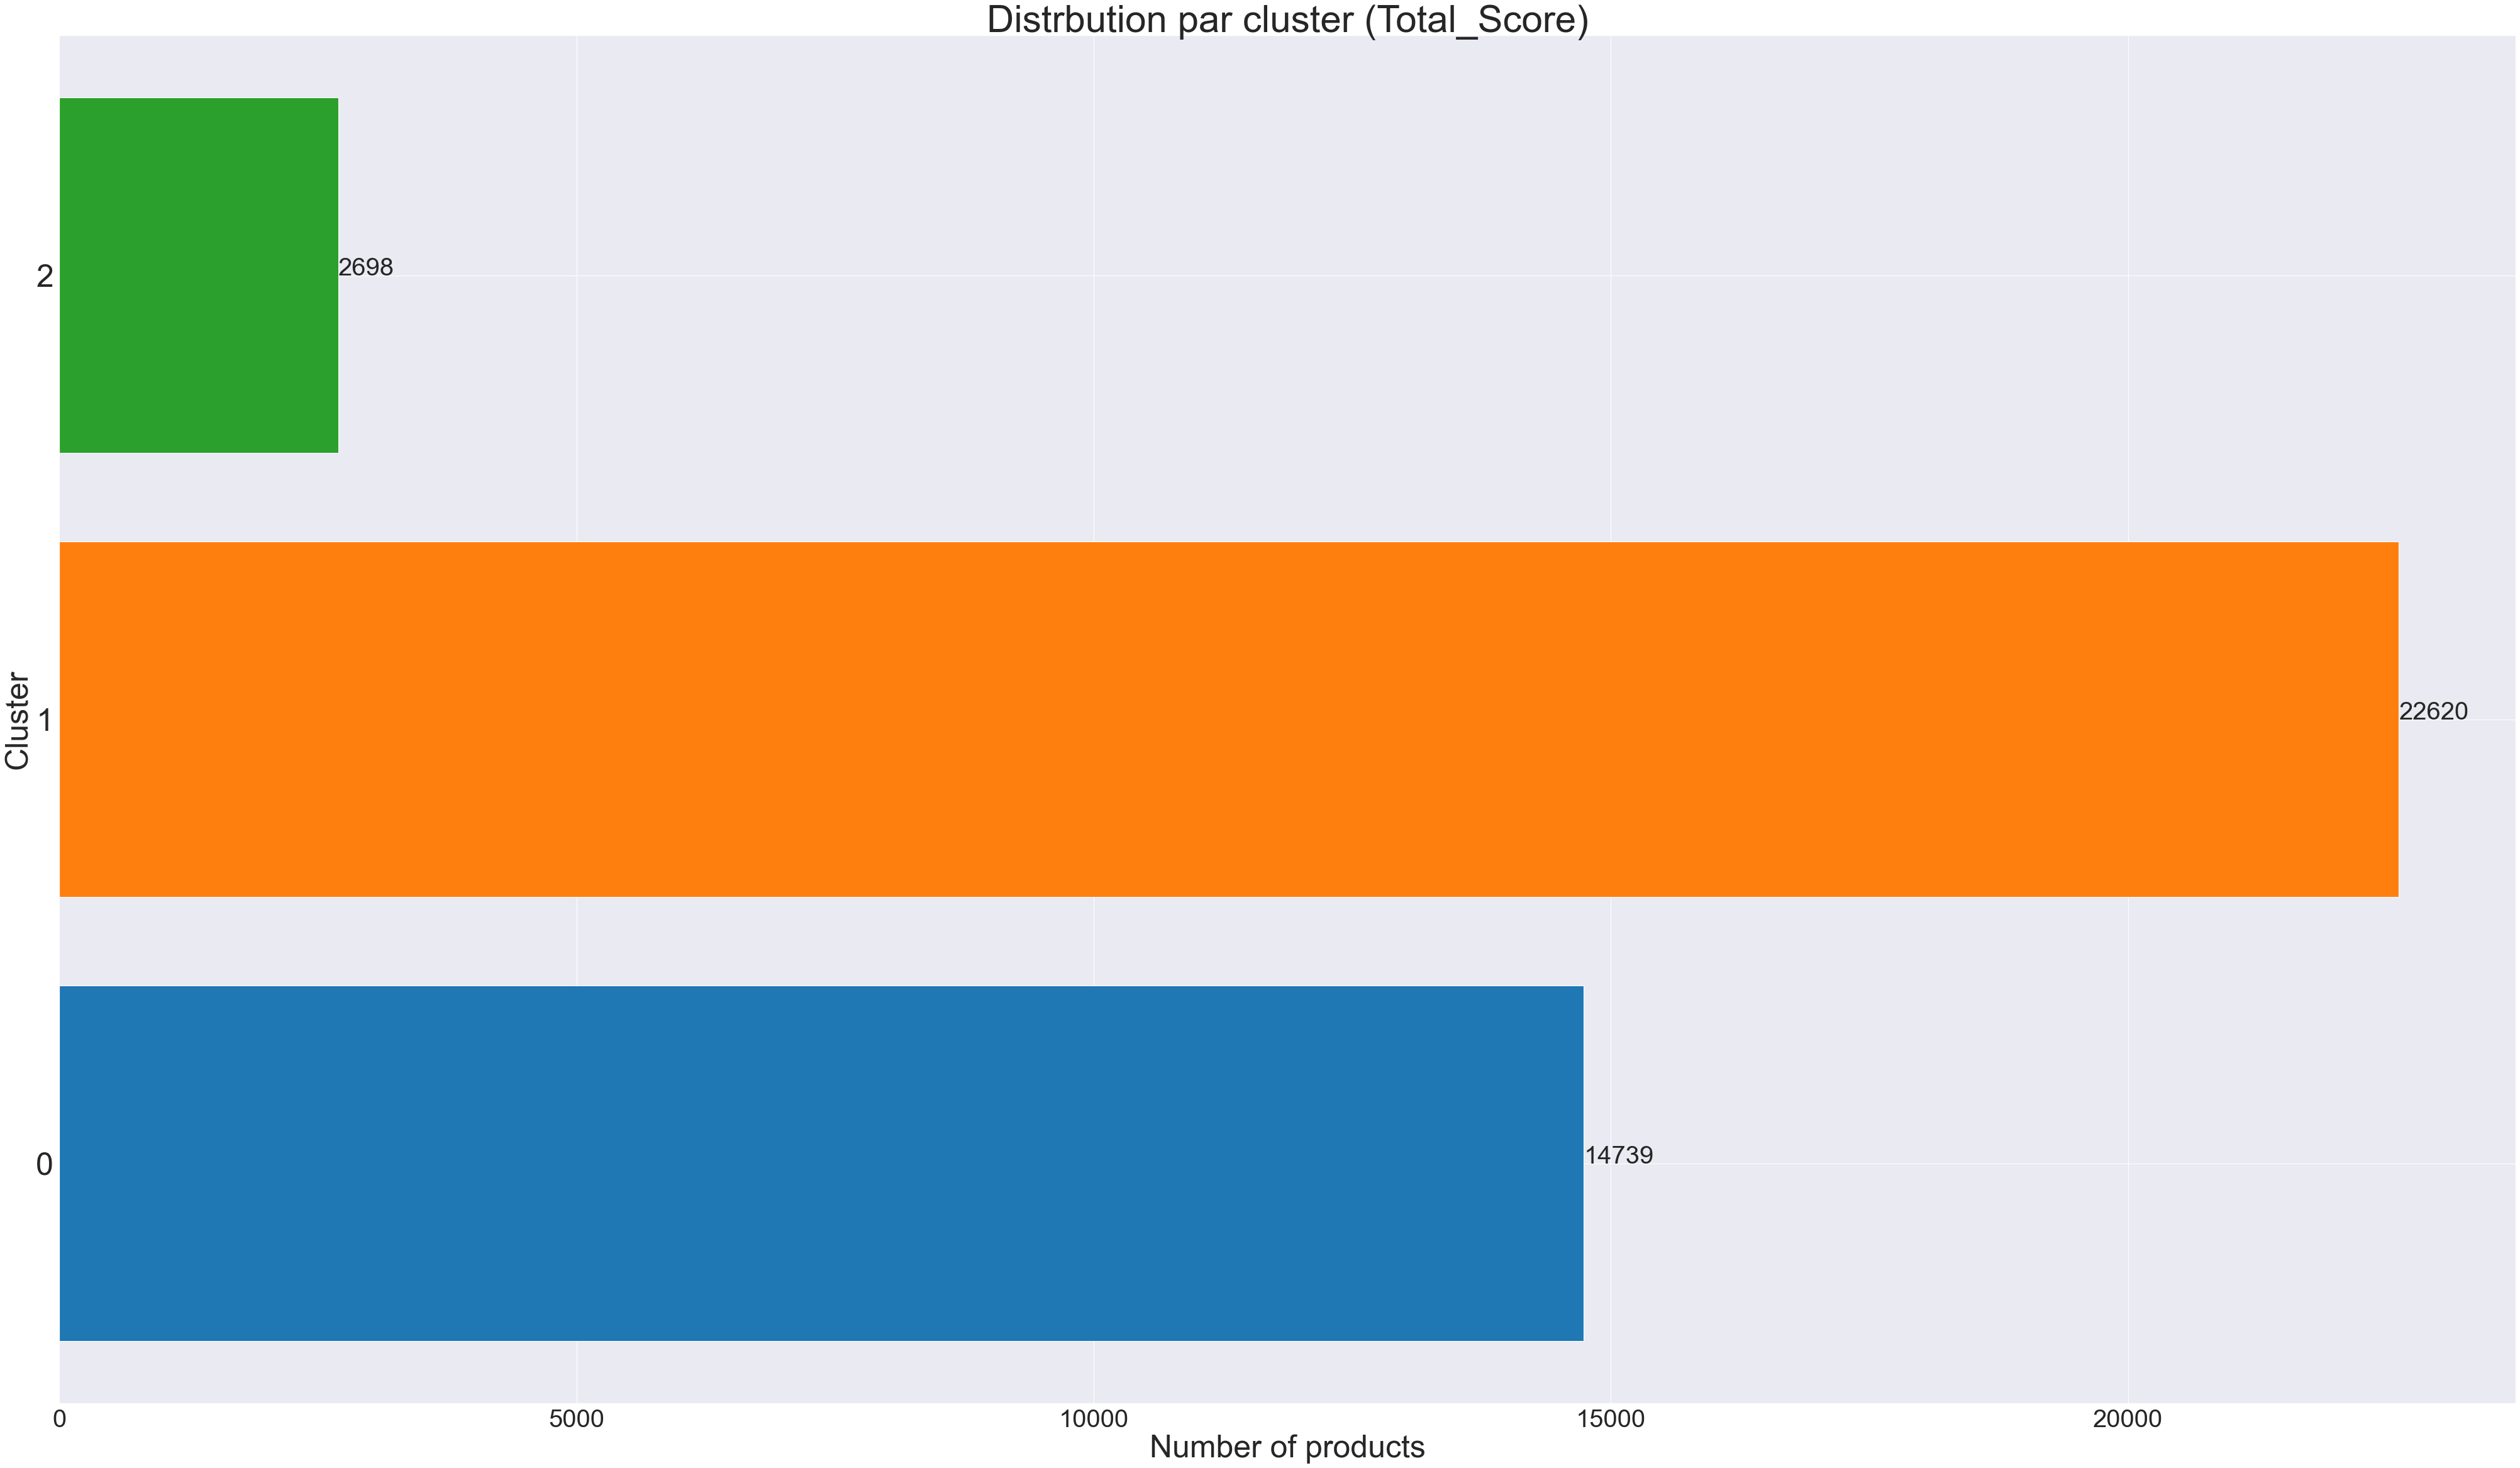

In [170]:
plt.figure(figsize=(70,40))
y=[len(Total_clus0.index),len(Total_clus1.index),len(Total_clus2.index)]

plt.barh(['0','1','2'],y, color=['tab:blue', 'tab:orange', 'tab:green'])
for index, value in enumerate(y): 
    plt.text(value, index, str(value), size=40) 

plt.title('Distrbution par cluster (Total_Score)', size=60)
plt.ylabel('Cluster', size=50)
plt.xlabel('Number of products', size=50)
plt.yticks(size=50)
plt.xticks(size=40)
plt.show()


In [ ]:
#On a suffisamment d'éléments dans les clusters. 
##Fin de la vérification.

In [ ]:
#D.14.3 Attribution du Score de la nouvelle variable 'Score_Final' 

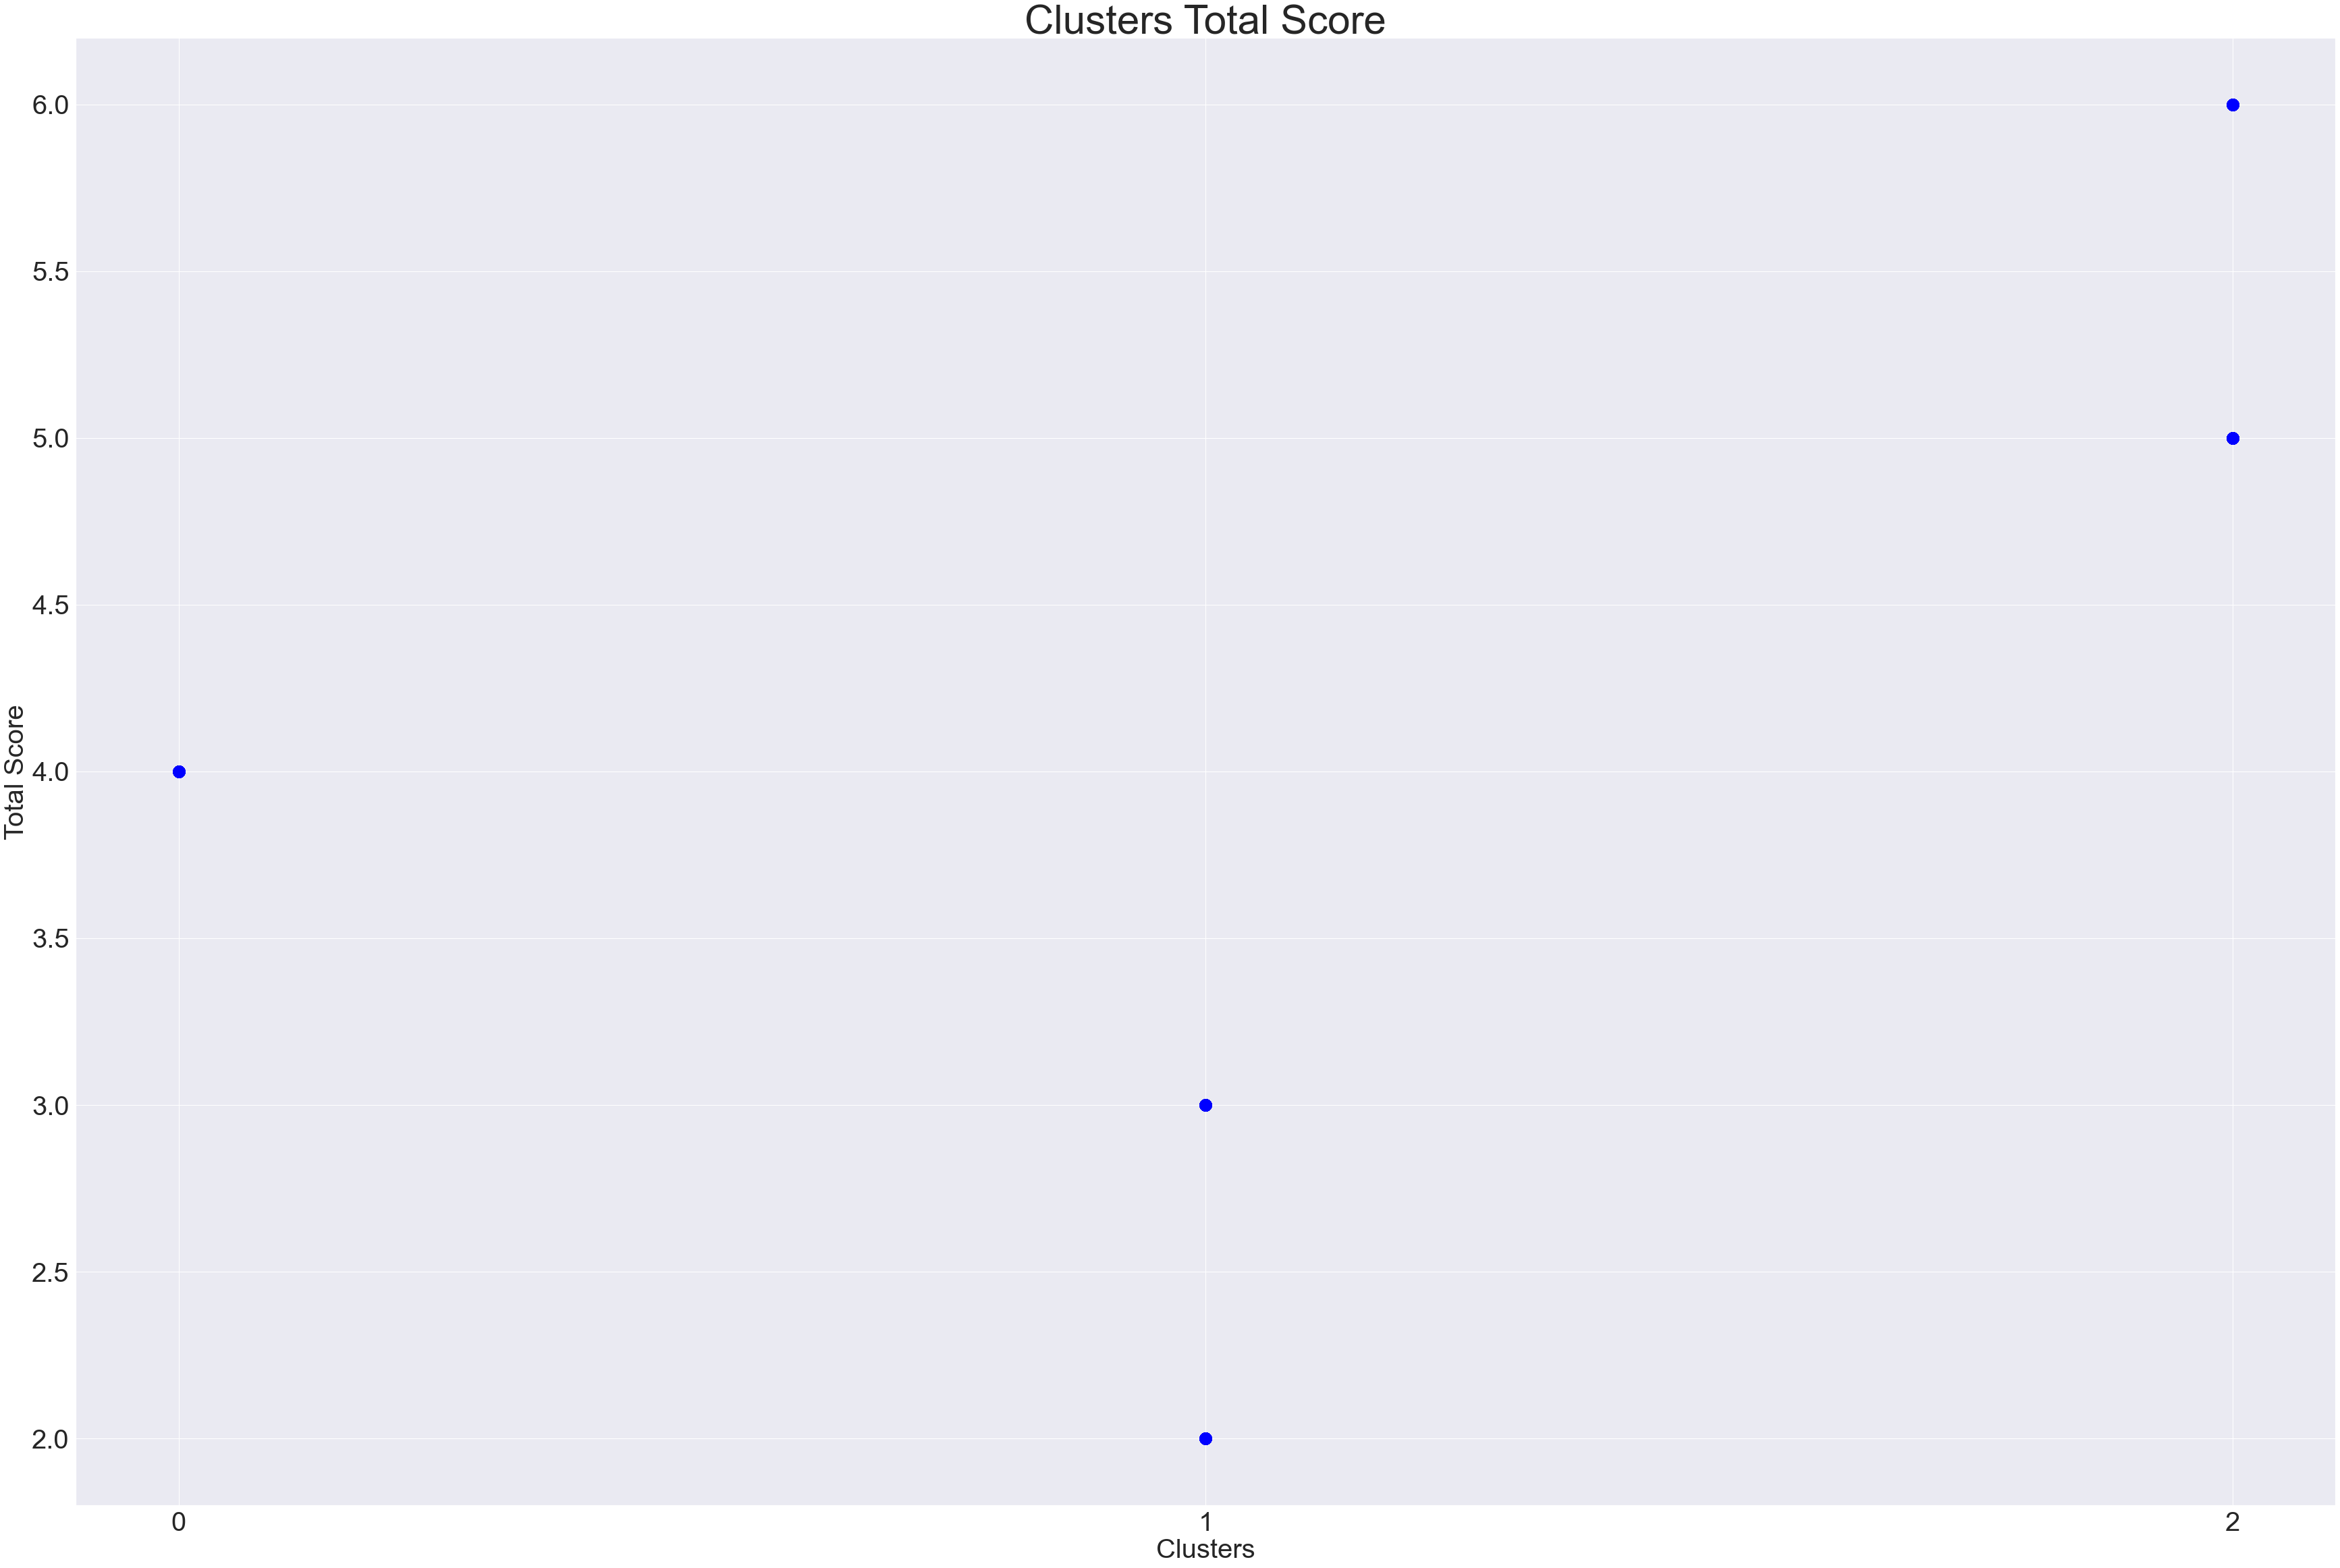

In [171]:
plt.figure(figsize=(60,40))

plt.scatter(data_final2['Total_Score_clusters'] , data_final2['Total_Score'] , color = 'blue', s=300)
plt.xlabel('Clusters', size=40)
plt.ylabel('Total Score', size=40)
plt.title('Clusters Total Score', size=60)
plt.xticks([0,1,2])
plt.yticks(size=40)
plt.xticks(size=40)
plt.show()

In [ ]:
#Le nombre d'additifs est toujours un nombre entier, qui en enlevant les outliers est compris ente 1 et 8.
#On distingue 3 clusters: 
#-  Cluster 1 --> 1 point;
#-  Cluster 0 --> 2 points;
#-  Cluster 2 --> 3 points.

#On suis le principe du 'nutriscore': plus on a de points plus on est mauvais. 

In [172]:
data_final2['Final_Score']= [1 if var==1 else 2 if var==0 else 3 for var in data_final2['Total_Score_clusters']]

In [ ]:
##Vérification.

In [173]:
data_final2.head(5)

code                 main_category_en  \
0  0000000005470                        Baguettes   
1  0000000491228  Dried products to be rehydrated   
2  0000007730009               Shortbread cookies   
3  0000010206515                   fr:decorations   
4  0000010216477                 fr:Pâtes à sucre   

                        product_name nutriscore_grade_Total additives_Total  \
0                   BAguette bressan                      a             3.0   
1             Entremets Crème Brulée                      b             4.0   
2  Biscuits sablés fourrage au cacao                      e             3.0   
3                       Pâte à Sucre                      d             5.0   
4                       Pate a sucre                      d             6.0   

       Sain Sain_Score Impact Santé Final-carbon-footprint carbon_Score  \
0  2.864114          1          Bon                  402.0          3.0   
1  1.864243          1          Bon                   90.0          1.0   
2 -1.135372          3      Pas Bon                   45.0          1.0   
3 -0.151532          2        Moyen                   90.0          1.0   
4 -0.151532          2        Moyen                   90.0          1.0   

  Impact Carbonne Total_Score  Total_Score_clusters  Final_Score  
0         Pas Bon         4.0                     0            2  
1             Bon         2.0                     1            1  
2             Bon         4.0                     0            2  
3             Bon         3.0                     1            1  
4             Bon         3.0                     1            1

In [ ]:
##Fin vérification.

In [174]:
data_final2=data_final2.drop(['Total_Score_clusters'], axis=1)

In [ ]:
##Vérification.

In [175]:
data_final2.head(5)

code                 main_category_en  \
0  0000000005470                        Baguettes   
1  0000000491228  Dried products to be rehydrated   
2  0000007730009               Shortbread cookies   
3  0000010206515                   fr:decorations   
4  0000010216477                 fr:Pâtes à sucre   

                        product_name nutriscore_grade_Total additives_Total  \
0                   BAguette bressan                      a             3.0   
1             Entremets Crème Brulée                      b             4.0   
2  Biscuits sablés fourrage au cacao                      e             3.0   
3                       Pâte à Sucre                      d             5.0   
4                       Pate a sucre                      d             6.0   

       Sain Sain_Score Impact Santé Final-carbon-footprint carbon_Score  \
0  2.864114          1          Bon                  402.0          3.0   
1  1.864243          1          Bon                   90.0          1.0   
2 -1.135372          3      Pas Bon                   45.0          1.0   
3 -0.151532          2        Moyen                   90.0          1.0   
4 -0.151532          2        Moyen                   90.0          1.0   

  Impact Carbonne Total_Score  Final_Score  
0         Pas Bon         4.0            2  
1             Bon         2.0            1  
2             Bon         4.0            2  
3             Bon         3.0            1  
4             Bon         3.0            1

In [ ]:
##Fin de la vérification.

In [ ]:
#D.14.4 Attribution de la qualification Finale: Bon, Moyen, Pas Top selon le cluster d'appartenance du produit 

In [176]:
data_final2['Impact Final']= ['Bon' if var==1 else 'Moyen' if var==2 else 'Pas Bon' for var in data_final2['Final_Score']]

In [ ]:
##Vérification.

In [177]:
data_final2.head(5)

code                 main_category_en  \
0  0000000005470                        Baguettes   
1  0000000491228  Dried products to be rehydrated   
2  0000007730009               Shortbread cookies   
3  0000010206515                   fr:decorations   
4  0000010216477                 fr:Pâtes à sucre   

                        product_name nutriscore_grade_Total additives_Total  \
0                   BAguette bressan                      a             3.0   
1             Entremets Crème Brulée                      b             4.0   
2  Biscuits sablés fourrage au cacao                      e             3.0   
3                       Pâte à Sucre                      d             5.0   
4                       Pate a sucre                      d             6.0   

       Sain Sain_Score Impact Santé Final-carbon-footprint carbon_Score  \
0  2.864114          1          Bon                  402.0          3.0   
1  1.864243          1          Bon                   90.0          1.0   
2 -1.135372          3      Pas Bon                   45.0          1.0   
3 -0.151532          2        Moyen                   90.0          1.0   
4 -0.151532          2        Moyen                   90.0          1.0   

  Impact Carbonne Total_Score  Final_Score Impact Final  
0         Pas Bon         4.0            2        Moyen  
1             Bon         2.0            1          Bon  
2             Bon         4.0            2        Moyen  
3             Bon         3.0            1          Bon  
4             Bon         3.0            1          Bon

In [ ]:
##Fin de la vérification.

#----------------------------------------------------------------------------------------------------------------------

In [ ]:
#Transformation des "Impact Santé", "Impact Carbonne" et "Impact Final" en numérique:

In [178]:
data_final2['Impact Final_num']= [1 if var=='Bon' else 2 if var=='Moyen' else 3 for var in data_final2['Impact Final']]

In [179]:
data_final2['Impact Carbonne_num']= [1 if var=='Bon' else 2 if var=='Moyen' else 3 for var in data_final2['Impact Carbonne']]

In [180]:
data_final2['Impact Santé_num']= [1 if var=='Bon' else 2 if var=='Moyen' else 3 for var in data_final2['Impact Santé']]

In [181]:
data_final2.head(5)

code                 main_category_en  \
0  0000000005470                        Baguettes   
1  0000000491228  Dried products to be rehydrated   
2  0000007730009               Shortbread cookies   
3  0000010206515                   fr:decorations   
4  0000010216477                 fr:Pâtes à sucre   

                        product_name nutriscore_grade_Total additives_Total  \
0                   BAguette bressan                      a             3.0   
1             Entremets Crème Brulée                      b             4.0   
2  Biscuits sablés fourrage au cacao                      e             3.0   
3                       Pâte à Sucre                      d             5.0   
4                       Pate a sucre                      d             6.0   

       Sain Sain_Score Impact Santé Final-carbon-footprint carbon_Score  \
0  2.864114          1          Bon                  402.0          3.0   
1  1.864243          1          Bon                   90.0          1.0   
2 -1.135372          3      Pas Bon                   45.0          1.0   
3 -0.151532          2        Moyen                   90.0          1.0   
4 -0.151532          2        Moyen                   90.0          1.0   

  Impact Carbonne Total_Score  Final_Score Impact Final  Impact Final_num  \
0         Pas Bon         4.0            2        Moyen                 2   
1             Bon         2.0            1          Bon                 1   
2             Bon         4.0            2        Moyen                 2   
3             Bon         3.0            1          Bon                 1   
4             Bon         3.0            1          Bon                 1   

   Impact Carbonne_num  Impact Santé_num  
0                    3                 1  
1                    1                 1  
2                    1                 3  
3                    1                 2  
4                    1                 2

In [ ]:
#----------------------------------------------------------------------------------------------------------------------

In [ ]:
#E. Livrable Interactif:

#Utilisation du 'code' pour identification du produit
#On obtient ensuite ses 'Impact Santé', 'Impact Carbonne' et 'Impact Final'.
#Si 'Impact Final'!= Bon on donne 3 produits notés 'Bon' de la même catégorie.

In [ ]:
#E.1 Schéma interactifs pour présenter les résultats

In [182]:
def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

In [183]:
def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

In [184]:
def gauge(labels=['LOW','MEDIUM','HIGH','VERY HIGH','EXTREME'], \
          colors='jet_r', arrow=1, title='', fname=False): 
    
    N = len(labels)
    
    if arrow > N: 
        raise Exception("\n\nThe category ({}) is greated than \
        the length\nof the labels ({})".format(arrow, N))

    
    if isinstance(colors, str):
        cmap = cm.get_cmap(colors, N)
        cmap = cmap(np.arange(N))
        colors = cmap[::-1,:].tolist()
    if isinstance(colors, list): 
        if len(colors) == N:
            colors = colors[::-1]
        else: 
            raise Exception("\n\nnumber of colors {} not equal \
            to number of categories{}\n".format(len(colors), N))
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(N)

    labels = labels[::-1]

    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]


    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, title, horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    
    pos = mid_points[abs(arrow - N)]
    
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)

In [ ]:
#E.2 Élaboration de la version interactive du livrable:

In [185]:
def get_code():
    mon_code = (input("Quel est le code de votre produit?"))
    return mon_code

In [186]:
def results():

    Ligne=data_final2.loc[data_final2['code']== get_code()]
    Ligne=pd.DataFrame(Ligne)
    Ligne=Ligne.reset_index(drop=True)
    Impact_Santé=Ligne['Impact Final_num']
    Impact_Carbonne=Ligne['Impact Carbonne_num']
    Impact_Final=Ligne['Impact Final_num']
    Category=Ligne['main_category_en']
    Name=Ligne['product_name']
  
    if Impact_Final.empty:
        print(Fore.BLUE + Style.BRIGHT +f"Dommage on ne connaît pas encore ce produit")
    else :
            if Impact_Final[0]==1:
                print(Fore.GREEN + Style.BRIGHT + Name[0] + Style.RESET_ALL)
                
                
                gauge(labels=['BON','MOYEN','PAS BON'], \
                      colors=['#007A00','#FFCC00','#ED1C24'], arrow=Impact_Santé[0] , title='Impact Santé') 
                gauge(labels=['BON','MOYEN','PAS BON'], \
                      colors=['#007A00','#FFCC00','#ED1C24'], arrow=Impact_Carbonne[0] , title='Impact Carbonne')
              
                gauge(labels=['BON','MOYEN','PAS BON'], \
                      colors=['#007A00','#FFCC00','#ED1C24'], arrow=Impact_Final[0] , title='Impact Final')

            else:  

                N=data_final2.loc[data_final2['main_category_en'] == Category[0]]
                N=pd.DataFrame(N)
                N0=N.loc[N['nutriscore_grade_Total'].isin(['a'])]
                N0=pd.DataFrame(N0)
                N0['Final-carbon-footprint']=N0['Final-carbon-footprint'].astype(float)
                N0['additives_Total']=N0['additives_Total'].astype(float)
                N1=N0.nsmallest(10, ['Final-carbon-footprint'])
                N2=N1.nsmallest(3, ['additives_Total'])
                N3=N2.loc[:,['code', 'product_name']]

                
                gauge(labels=['BON','MOYEN','PAS BON'], \
                      colors=['#007A00','#FFCC00','#ED1C24'], arrow=Impact_Santé[0] , title='Impact Santé') 
                gauge(labels=['BON','MOYEN','PAS BON'], \
                      colors=['#007A00','#FFCC00','#ED1C24'], arrow=Impact_Carbonne[0] , title='Impact Carbonne')
                
                gauge(labels=['BON','MOYEN','PAS BON'], \
                      colors=['#007A00','#FFCC00','#ED1C24'], arrow=Impact_Final[0] , title='Impact Final')

                print(Fore.RED + Style.BRIGHT + f"Pour un meilleur impact sur la santé et l'écologie optez plutôt pour l'un des 3 produits suivants:")
                print()
                print(Fore.BLUE + Style.BRIGHT + N3.to_string(index = False))
                print()
                print(Fore.YELLOW + Style.BRIGHT + Name[0] + Style.RESET_ALL)


In [ ]:
##E.3 En version non interactive:
#(Je l'ai d'abord codé comme ça, pour vérifier).

In [ ]:
#mon_code='0000000491228'

In [ ]:
#Ligne=data_final2.loc[data_final2['code']== mon_code]
#Ligne=pd.DataFrame(Ligne)
#Ligne=Ligne.reset_index(drop=True)
#Impact_Santé=Ligne['Impact Final_num']
#Impact_Carbonne=Ligne['Impact Carbonne_num']
#Impact_Final=Ligne['Impact Final_num']
#Category=Ligne['main_category_en']
#Name=Ligne['product_name']

In [ ]:
#   if Impact_Final.empty:
#        print(Fore.BLUE + Style.BRIGHT +f"Dommage on ne connaît pas encore ce produit")
#else :
        
#        if Impact_Final[0]== 1:
#            print(Fore.GREEN + Style.BRIGHT + Name[0] + Style.RESET_ALL)
            
#            gauge(labels=['BON','MOYEN','PAS BON'], \
#                  colors=['#007A00','#FFCC00','#ED1C24'], arrow=Impact_Santé[0] , title='Impact Santé') 
#            gauge(labels=['BON','MOYEN','PAS BON'], \
#                  colors=['#007A00','#FFCC00','#ED1C24'], arrow=Impact_Carbonne[0] , title='Impact Carbonne')
#            gauge(labels=['BON','MOYEN','PAS BON'], \
#                  colors=['#007A00','#FFCC00','#ED1C24'], arrow=Impact_Final[0] , title='Impact Final')
            
#        else:  
#            N=data_final2.loc[data_final2['main_category_en'] == Category[0]]
#            N=pd.DataFrame(N)
#            N0=N.loc[N['nutriscore_grade_Total'].isin(['a'])]
#            N0=pd.DataFrame(N0)
#            N0['Final-carbon-footprint']=N0['Final-carbon-footprint'].astype(float)
#            N0['additives_Total']=N0['additives_Total'].astype(float)
#            N1=N0.nsmallest(10, ['Final-carbon-footprint'])
#            N2=N1.nsmallest(3, ['additives_Total'])
#            N3=N2.loc[:,['code', 'product_name']]
            
#            gauge(labels=['BON','MOYEN','PAS BON'], \
#                  colors=['#007A00','#FFCC00','#ED1C24'], arrow=Impact_Santé[0] , title='Impact Santé') 
#            gauge(labels=['BON','MOYEN','PAS BON'], \
#                  colors=['#007A00','#FFCC00','#ED1C24'], arrow=Impact_Carbonne[0] , title='Impact Carbonne')
#            gauge(labels=['BON','MOYEN','PAS BON'], \
#                  colors=['#007A00','#FFCC00','#ED1C24'], arrow=Impact_Final[0] , title='Impact Final')
           
#            print(Fore.RED + Style.BRIGHT + f"Pour un meilleur impact sur la santé et l'écologie optez plutôt pour l'un des 3 produits suivants:")
#            print()
#            print(Fore.BLUE + Style.BRIGHT + N3.to_string(index = False))
#            print()
#            print(Fore.YELLOW + Style.BRIGHT + Name[0] + Style.RESET_ALL)


In [ ]:
#Vérification.

In [ ]:
#N.head(5)

In [ ]:
#N0

In [ ]:
#N1

In [ ]:
#N2

In [ ]:
#N3

In [ ]:
##Fin vérification.

In [ ]:
#E.4 Test de la version interactive:
#Exemple 1: 0000000005470 -> Produit existant mal noté.
#Exemple 2: 0000000000001 -> Produit inexistant.
#Exemple 3: 0000000491228 -> Produit existant bien noté.


Quel est le code de votre produit?0000000005470
Pour un meilleur impact sur la santé et l'écologie optez plutôt pour l'un des 3 produits suivants:

         code                   product_name
2000000205397 Baguette Millavoise 6 céréales
3700128360556    La Millavoise aux 6 graines
8718265810952     Baguettes blanche précuite

BAguette bressan


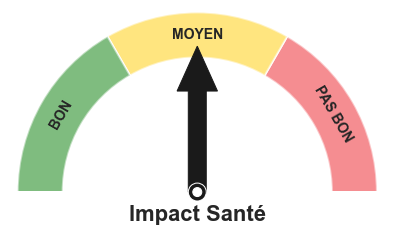

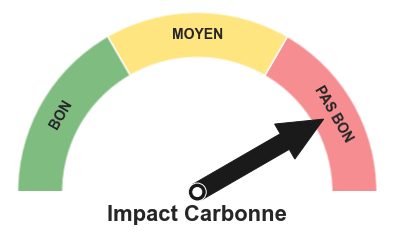

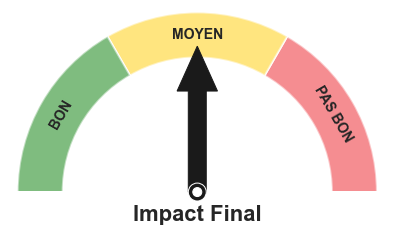

In [187]:
results()

In [188]:
results()

Quel est le code de votre produit?0000000000001
Dommage on ne connaît pas encore ce produit


Quel est le code de votre produit?0000000491228
Entremets Crème Brulée


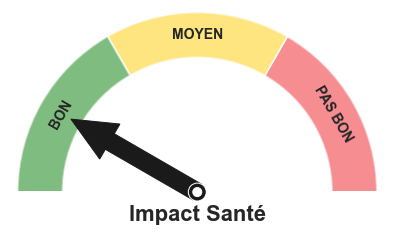

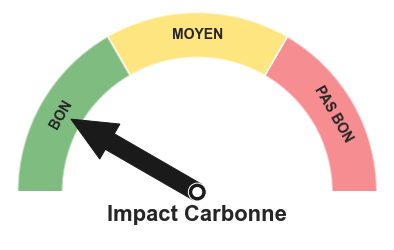

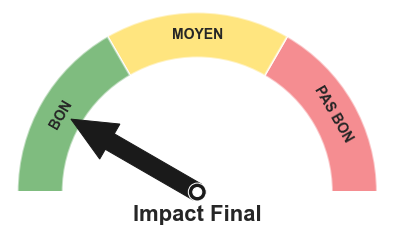

In [189]:
results()